# ELVTR Data Science Main Project

## Deliverables

01 Git Repository

Include all project code with a README file containing a high-level project description.

Example README guide: [Make a README](link-to-readme-guide)

Report

* Methodology, approach, and model selection rationale.
* Advantages and limitations of the chosen model.
* Architecture of the final solution.
* Considerations on deployment and scalability of the solution - i.e., how will the model be used in BAU by the business?
* Estimated impact/ROI of the project.

# Data Science in Finance: Lending Club Loan Analysis

## Project Overview

Lending Club has tasked us with preparing a loan application dataset for analysis and predictive modeling. 

The key tasks include data cleaning, exploratory data analysis, and building a predictive model for loan classification. An optional component involves building a real-time scoring application.

**Project Objectives**:
- Clean and preprocess the data.
- Perform exploratory data analysis (EDA) to gain insights.
- Develop a predictive model for loan application approval.
- (Optional) Build a real-time scoring application.

**Dataset Description**:
The dataset consists of loan application records, including various financial metrics and the application status. The data dictionary is provided for understanding the attributes.

**Dataset Path**:
- CSV: `data/1-raw/lending-club-2007-2020Q3/Loan_status_2007-2020Q3-100ksample.csv`
- Data Dictionary: `data/1-raw/lending-club-2007-2020Q3/LCDataDictionary.xlsx`

# Loan Default Prediction Project
This project aims to predict loan default status using Lending Club data. The workflow includes data cleaning, preprocessing, exploratory data analysis (EDA), feature selection, modeling, hyperparameter tuning, and model interpretation. Below is the improved code with detailed commentary for each step.

## 1. Data Cleaning and Preprocessing
### Import Necessary Libraries
We start by importing all the necessary libraries for data manipulation, visualization, modeling, and evaluation.

In [70]:
# Essential libraries for data manipulation, statistics, and visualization
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import normaltest, shapiro, anderson, kstest, skew

# Visualization libraries
import matplotlib.pyplot as plt  # For standard plotting
import seaborn as sns  # For static plots with themes
import plotly.express as px  # For interactive plots
import missingno as msno  # For missing data visualization

# Machine Learning libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split, cross_val_score  # Data splitting and cross-validation
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestClassifier, RandomForestRegressor,
    GradientBoostingClassifier, GradientBoostingRegressor
)
from sklearn.svm import SVC, SVR  # Support Vector Machines for classification and regression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB  # Naive Bayes Classifier
from sklearn.cluster import KMeans  # K-Means clustering
from sklearn.decomposition import PCA  # Dimensionality reduction
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.feature_selection import RFE  # Recursive Feature Elimination

# Additional machine learning models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve, average_precision_score
)

# Utility libraries
from tqdm import tqdm
import joblib

# Pandas display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Plot settings for consistent figure size (A4 landscape top half)
FIG_WIDTH = 11.69  # Width
FIG_HEIGHT = 4.14  # Height

# Set the theme for Seaborn plots
sns.set_theme(style='whitegrid')

### Load the Dataset
We load the dataset into a pandas DataFrame for analysis.

In [71]:
pwd

'c:\\Users\\kiera\\OneDrive\\Documents\\GitHub\\dsif-git-main-project\\elvtr_main_project\\notebooks'

In [72]:
# Load the dataset
df = pd.read_csv("c:/Users/kiera/OneDrive/Documents/GitHub/dsif-git-main-project/elvtr_main_project/data/1-raw/lending-club-2007-2020Q3/Loan_status_2007-2020Q3-100ksample.csv")

# Clean headers in the existing DataFrame 'df'
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Display cleaned headers
print("Cleaned headers:", df.columns.tolist())

df.shape

Cleaned headers: ['unnamed:_0.1', 'unnamed:_0', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status

(100000, 143)

In [73]:
df.head()

unnamed:_0.1  unnamed:_0         id  loan_amnt  funded_amnt  \
0       1746494       25450  167338079     4000.0       4000.0   
1       2370717       81861   71016917    24000.0      24000.0   
2       2264870      397109   39589826     5000.0       5000.0   
3        595422       15492  134798709    24000.0      24000.0   
4        562657       90591  127097355    14000.0      14000.0   

   funded_amnt_inv        term int_rate  installment grade sub_grade  \
0           4000.0   36 months   13.08%       134.93     B        B5   
1          24000.0   60 months    9.16%       500.07     B        B2   
2           5000.0   36 months   10.49%       162.49     B        B3   
3          24000.0   60 months   11.05%       522.42     B        B4   
4          14000.0   60 months   13.59%       322.79     C        C2   

        emp_title emp_length home_ownership  annual_inc verification_status  \
0         cashier  10+ years       MORTGAGE     48000.0     Source Verified   
1             ABM    6 years           RENT     57000.0     Source Verified   
2          driver  10+ years       MORTGAGE     55000.0        Not Verified   
3             NaN        NaN       MORTGAGE     43500.0        Not Verified   
4  Shipping Clerk  10+ years       MORTGAGE     48000.0     Source Verified   

    issue_d loan_status pymnt_plan  \
0  Mar-2020     Current          n   
1  Feb-2016     Current          n   
2  Jan-2015  Fully Paid          n   
3  Jun-2018     Current          n   
4  Jan-2018  Fully Paid          n   

                                                 url             purpose  \
0  https://lendingclub.com/browse/loanDetail.acti...    home_improvement   
1  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
2  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
3  https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   
4  https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   

                     title zip_code addr_state    dti  delinq_2yrs  \
0         Home improvement    115xx         NY  20.25          1.0   
1  Credit card refinancing    708xx         LA  25.33          0.0   
2  Credit card refinancing    347xx         FL   7.22          0.0   
3       Debt consolidation    443xx         OH  24.55          0.0   
4       Debt consolidation    681xx         NE  24.30          0.0   

  earliest_cr_line  fico_range_low  fico_range_high  inq_last_6mths  \
0         Dec-2004           665.0            669.0             0.0   
1         Jan-2004           680.0            684.0             0.0   
2         Apr-2010           665.0            669.0             0.0   
3         Oct-2005           750.0            754.0             0.0   
4         Apr-2008           735.0            739.0             1.0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                    19.0                   110.0       4.0      1.0   
1                     NaN                     NaN      10.0      0.0   
2                     NaN                    61.0       7.0      1.0   
3                     NaN                     NaN      15.0      0.0   
4                     NaN                     NaN      16.0      0.0   

   revol_bal revol_util  total_acc initial_list_status  out_prncp  \
0     1988.0      82.8%       12.0                   w    3816.34   
1    22697.0      64.5%       24.0                   w    4333.29   
2     6001.0      52.6%        9.0                   f       0.00   
3     6573.0      12.1%       23.0                   w   16317.69   
4    11894.0      27.1%       23.0                   w       0.00   

   out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        3816.34    266.950000           266.95           183.66   
1        4333.29  25496.160000         25496.16         19666.71   
2           0.00   5846.672836          5846.67          5000.00   
3       16317.69  12000.930000         12000

### Initial Data Exploration
Before proceeding, let's explore the data to understand its structure and identify missing values.

In [74]:
# Display the first few rows
df.head()

# Get data types and non-null counts
df.info()

# Check for missing values
missing_percent = df.isnull().mean() * 100
print("Percentage of missing values in each column:")
print(missing_percent[missing_percent > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 143 entries, unnamed:_0.1 to debt_settlement_flag
dtypes: float64(106), int64(3), object(34)
memory usage: 109.1+ MB
Percentage of missing values in each column:
emp_title                                      8.954
emp_length                                     6.950
title                                          0.780
dti                                            0.102
mths_since_last_delinq                        52.814
mths_since_last_record                        85.370
revol_util                                     0.081
last_pymnt_d                                   0.191
next_pymnt_d                                  63.573
last_credit_pull_d                             0.002
collections_12_mths_ex_med                     0.006
mths_since_last_major_derog                   75.398
annual_inc_joint                              92.834
dti_joint                                     92.834
verificati

In [75]:
# Define pre hardship fiels to use as feature set
features = [
    'acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'all_util', 'annual_inc', 
    'annual_inc_joint', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 
    'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'delinq_2yrs', 'delinq_amnt', 
    'dti', 'dti_joint', 'earliest_cr_line', 'emp_length', 'emp_title', 
    'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 
    'home_ownership', 'il_util', 'initial_list_status', 'inq_fi', 'inq_last_12m', 
    'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 
    'max_bal_bc', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 
    'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_delinq', 
    'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 
    'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 
    'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 
    'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 
    'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 
    'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc', 'open_acc_6m', 'open_il_12m', 
    'open_il_24m', 'open_act_il', 'open_rv_12m', 'open_rv_24m', 'out_prncp', 
    'out_prncp_inv', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'policy_code', 'pub_rec', 
    'pub_rec_bankruptcies', 'purpose', 'pymnt_plan', 'revol_bal', 'revol_util', 
    'sub_grade', 'tax_liens', 'term', 'title', 'tot_coll_amt', 'tot_cur_bal', 
    'tot_hi_cred_lim', 'total_acc', 'total_bal_ex_mort', 'total_bal_il', 'total_bc_limit', 
    'total_cu_tl', 'total_il_high_credit_limit', 'total_pymnt', 'total_pymnt_inv', 
    'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'total_rev_hi_lim', 
    'verification_status', 'zip_code'
]

In [76]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 102 entries, acc_now_delinq to zip_code
dtypes: float64(83), object(19)
memory usage: 77.8+ MB


In [77]:
df[features].describe(include=['int', 'float'])

acc_now_delinq  acc_open_past_24mths      all_util    annual_inc  \
count   100000.000000          98222.000000  70343.000000  1.000000e+05   
mean         0.003460              4.512166     56.154116  8.002918e+04   
std          0.063467              3.173066     20.804306  8.722434e+04   
min          0.000000              0.000000      0.000000  0.000000e+00   
25%          0.000000              2.000000     42.000000  4.716050e+04   
50%          0.000000              4.000000     57.000000  6.600000e+04   
75%          0.000000              6.000000     71.000000  9.500000e+04   
max          4.000000             42.000000    175.000000  1.099920e+07   

       annual_inc_joint    avg_cur_bal  bc_open_to_buy       bc_util  \
count      7.166000e+03   97560.000000    97152.000000  97101.000000   
mean       1.295764e+05   13757.234143    12779.260859     55.838138   
std        6.799755e+04   16693.219964    18099.386315     28.842058   
min        1.500000e+04       0.000000        0.000000      0.000000   
25%        8.603411e+04    3128.000000     2000.000000     32.700000   
50%        1.150000e+05    7461.500000     6262.500000     57.300000   
75%        1.550000e+05   19105.000000    16184.250000     81.200000   
max        1.110000e+06  471749.000000   393250.000000    175.000000   

       chargeoff_within_12_mths  collections_12_mths_ex_med   delinq_2yrs  \
count               99994.00000                99994.000000  100000.00000   
mean                    0.00821                    0.017651       0.28473   
std                     0.10229                    0.144291       0.82352   
min                     0.00000                    0.000000       0.00000   
25%                     0.00000                    0.000000       0.00000   
50%                     0.00000                    0.000000       0.00000   
75%                     0.00000                    0.000000       0.00000   
max                     7.00000                    7.000000      18.00000   

         delinq_amnt           dti    dti_joint  fico_range_high  \
count  100000.000000  99898.000000  7166.000000    100000.000000   
mean       10.706750     19.332252    19.408330       704.639440   
std       694.930099     17.278045     7.930092        33.802025   
min         0.000000     -1.000000     0.000000       644.000000   
25%         0.000000     12.060000    13.680000       679.000000   
50%         0.000000     18.100000    18.895000       699.000000   
75%         0.000000     24.870000    25.020000       724.000000   
max    130778.000000    999.000000    46.400000       850.000000   

       fico_range_low    funded_amnt  funded_amnt_inv       il_util  \
count   100000.000000  100000.000000    100000.000000  60315.000000   
mean       700.639200   15328.216250     15313.244829     68.988842   
std         33.800996    9467.415275      9470.918891     23.482027   
min        640.000000     700.000000         0.000000      0.000000   
25%        675.000000    8000.000000      8000.000000     55.000000   
50%        695.000000   13000.000000     13000.000000     72.000000   
75%        720.000000   20000.000000     20000.000000     85.000000   
max        845.000000   40000.000000     40000.000000    364.000000   

             inq_fi  inq_last_12m  inq_last_6mths    installment  \
count  70356.000000  70356.000000   100000.000000  100000.000000   
mean       1.075232      1.998707        0.554310     451.708510   
std        1.496386      2.349284        0.862704     273.022605   
min        0.000000      0.000000        0.000000      22.510000   
25%        0.000000      0.000000        0.000000     253.060000   
50%        1.000000      1.000000        0.000000     380.810000   
75%        2.000000      3.000000        1.000000     602.300000   
max       24.000000     34.000000       25.000000    1719.830000   

           loan_amnt    max_bal_bc  mo_sin_old_il_acct  mo_sin_old_rev_tl_op  \
count  100000.000000  70356.000000        

**Notes**:
- Most features have a count close to 100,000, with some features containing missing values.
- The distribution of values varies widely across features, with features like `annual_inc` and `total_rev_hi_lim` having large maximum values.
- Quartiles (25%, 50%, and 75%) provide insight into the typical ranges, while the standard deviation highlights variability.
- Some features have many values close to 0, which may indicate skewness or the need for normalization.

In [78]:
# Print the shape of the full DataFrame
print("Shape of the full DataFrame df:", df.shape)

# Print the shape of the DataFrame subset with pre_hardship_fields columns
print("Shape of df with only pre_hardship_fields columns:", df[features].shape)

# Print the number of columns in pre_hardship_fields
print("Number of columns in pre_hardship_fields:", len(features))


Shape of the full DataFrame df: (100000, 143)
Shape of df with only pre_hardship_fields columns: (100000, 102)
Number of columns in pre_hardship_fields: 102


### High level analysis

Scrolling from left to right we can make the following observations:

- The Standard deviation for `annual_inc` is > 87k suggesting large disparity in numbers (we'll check this later on when pulling our distribution plots)
- The average `open_acc` is equal to 11 with a high of up to 86. For UK standards this can be considered extremely high. Worth taking this into account as a feature for our deeper analysis.
- Our delinquency fields show that we have a low average in the `delinq_2yrs` column and an average of 35 months since the last delinquency (`mths_since_last_delinq`) these could be a great indicators. 

Althought there are more lets continue our analysis and feature selection for our machine learning excercise.

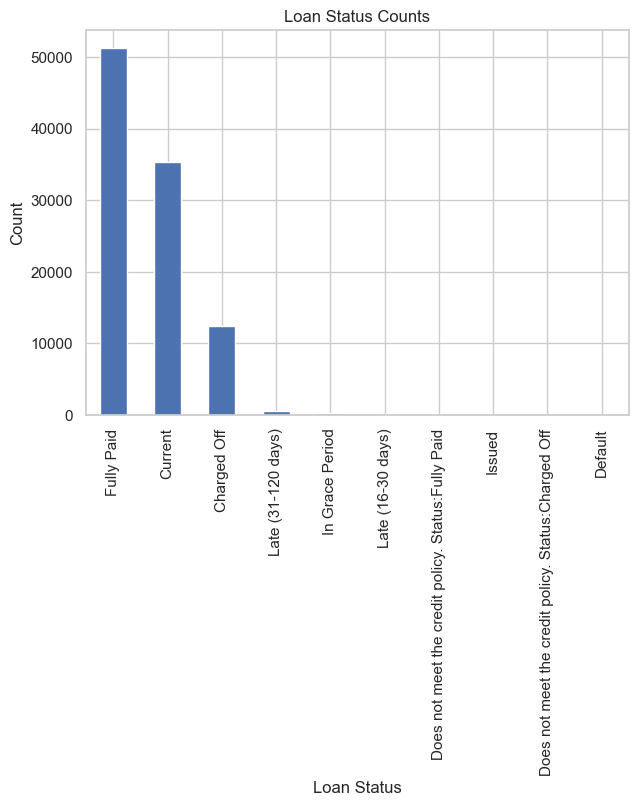

In [79]:
# Calculate the value counts for loan status
loan_status_counts = df['loan_status'].value_counts()

# Plot with matplotlib
plt.figure(figsize=(7, 5))  # width=500/100 and height=350/100 for similar sizing in inches
loan_status_counts.plot(kind='bar')

# Set title and labels
plt.title("Loan Status Counts")
plt.xlabel("Loan Status")
plt.ylabel("Count")

# Show the plot
plt.show()

## Missing Data

### Checking for Missing Values
To ensure data integrity, we check for missing values in the dataset. The `isnull()` function is used to identify null entries, and the results are sorted by the number of missing values per column. This provides insight into the columns with the most missing data, which could impact our analysis and model performance.


In [80]:
# Check for missing values in each column
missing_values = df[features].isnull().sum().sort_values(ascending=False)
print(f"There is a total of: {len(missing_values)} columns that are missing data\n")
# print("\nMissing values in each column:\n") 
# print(missing_values[missing_values > 90000]) # Display only columns with missing values
missing_values

There is a total of: 102 columns that are missing data



dti_joint                         92834
annual_inc_joint                  92834
mths_since_last_record            85370
mths_since_recent_bc_dlq          78057
mths_since_last_major_derog       75398
mths_since_recent_revol_delinq    68342
mths_since_last_delinq            52814
il_util                           39685
mths_since_rcnt_il                31773
all_util                          29657
max_bal_bc                        29644
inq_last_12m                      29644
inq_fi                            29644
total_bal_il                      29644
total_cu_tl                       29644
open_acc_6m                       29644
open_il_12m                       29644
open_il_24m                       29644
open_act_il                       29644
open_rv_24m                       29644
open_rv_12m                       29644
mths_since_recent_inq             12810
emp_title                          8954
emp_length                         6950
num_tl_120dpd_2m                   5512


Next, we'll use the `missingno` library to analyze the missing data. This will help us understand how missing data is distributed across the dataset and the correlation between missing values in different columns.

The `missing_values` variable has been defined earlier in our workflow to quantify the total number of missing entries in each column. 

Now, we'll leverage this list to visualize the missing data using  missingno.

Categorical Data Missing Values



<Axes: >

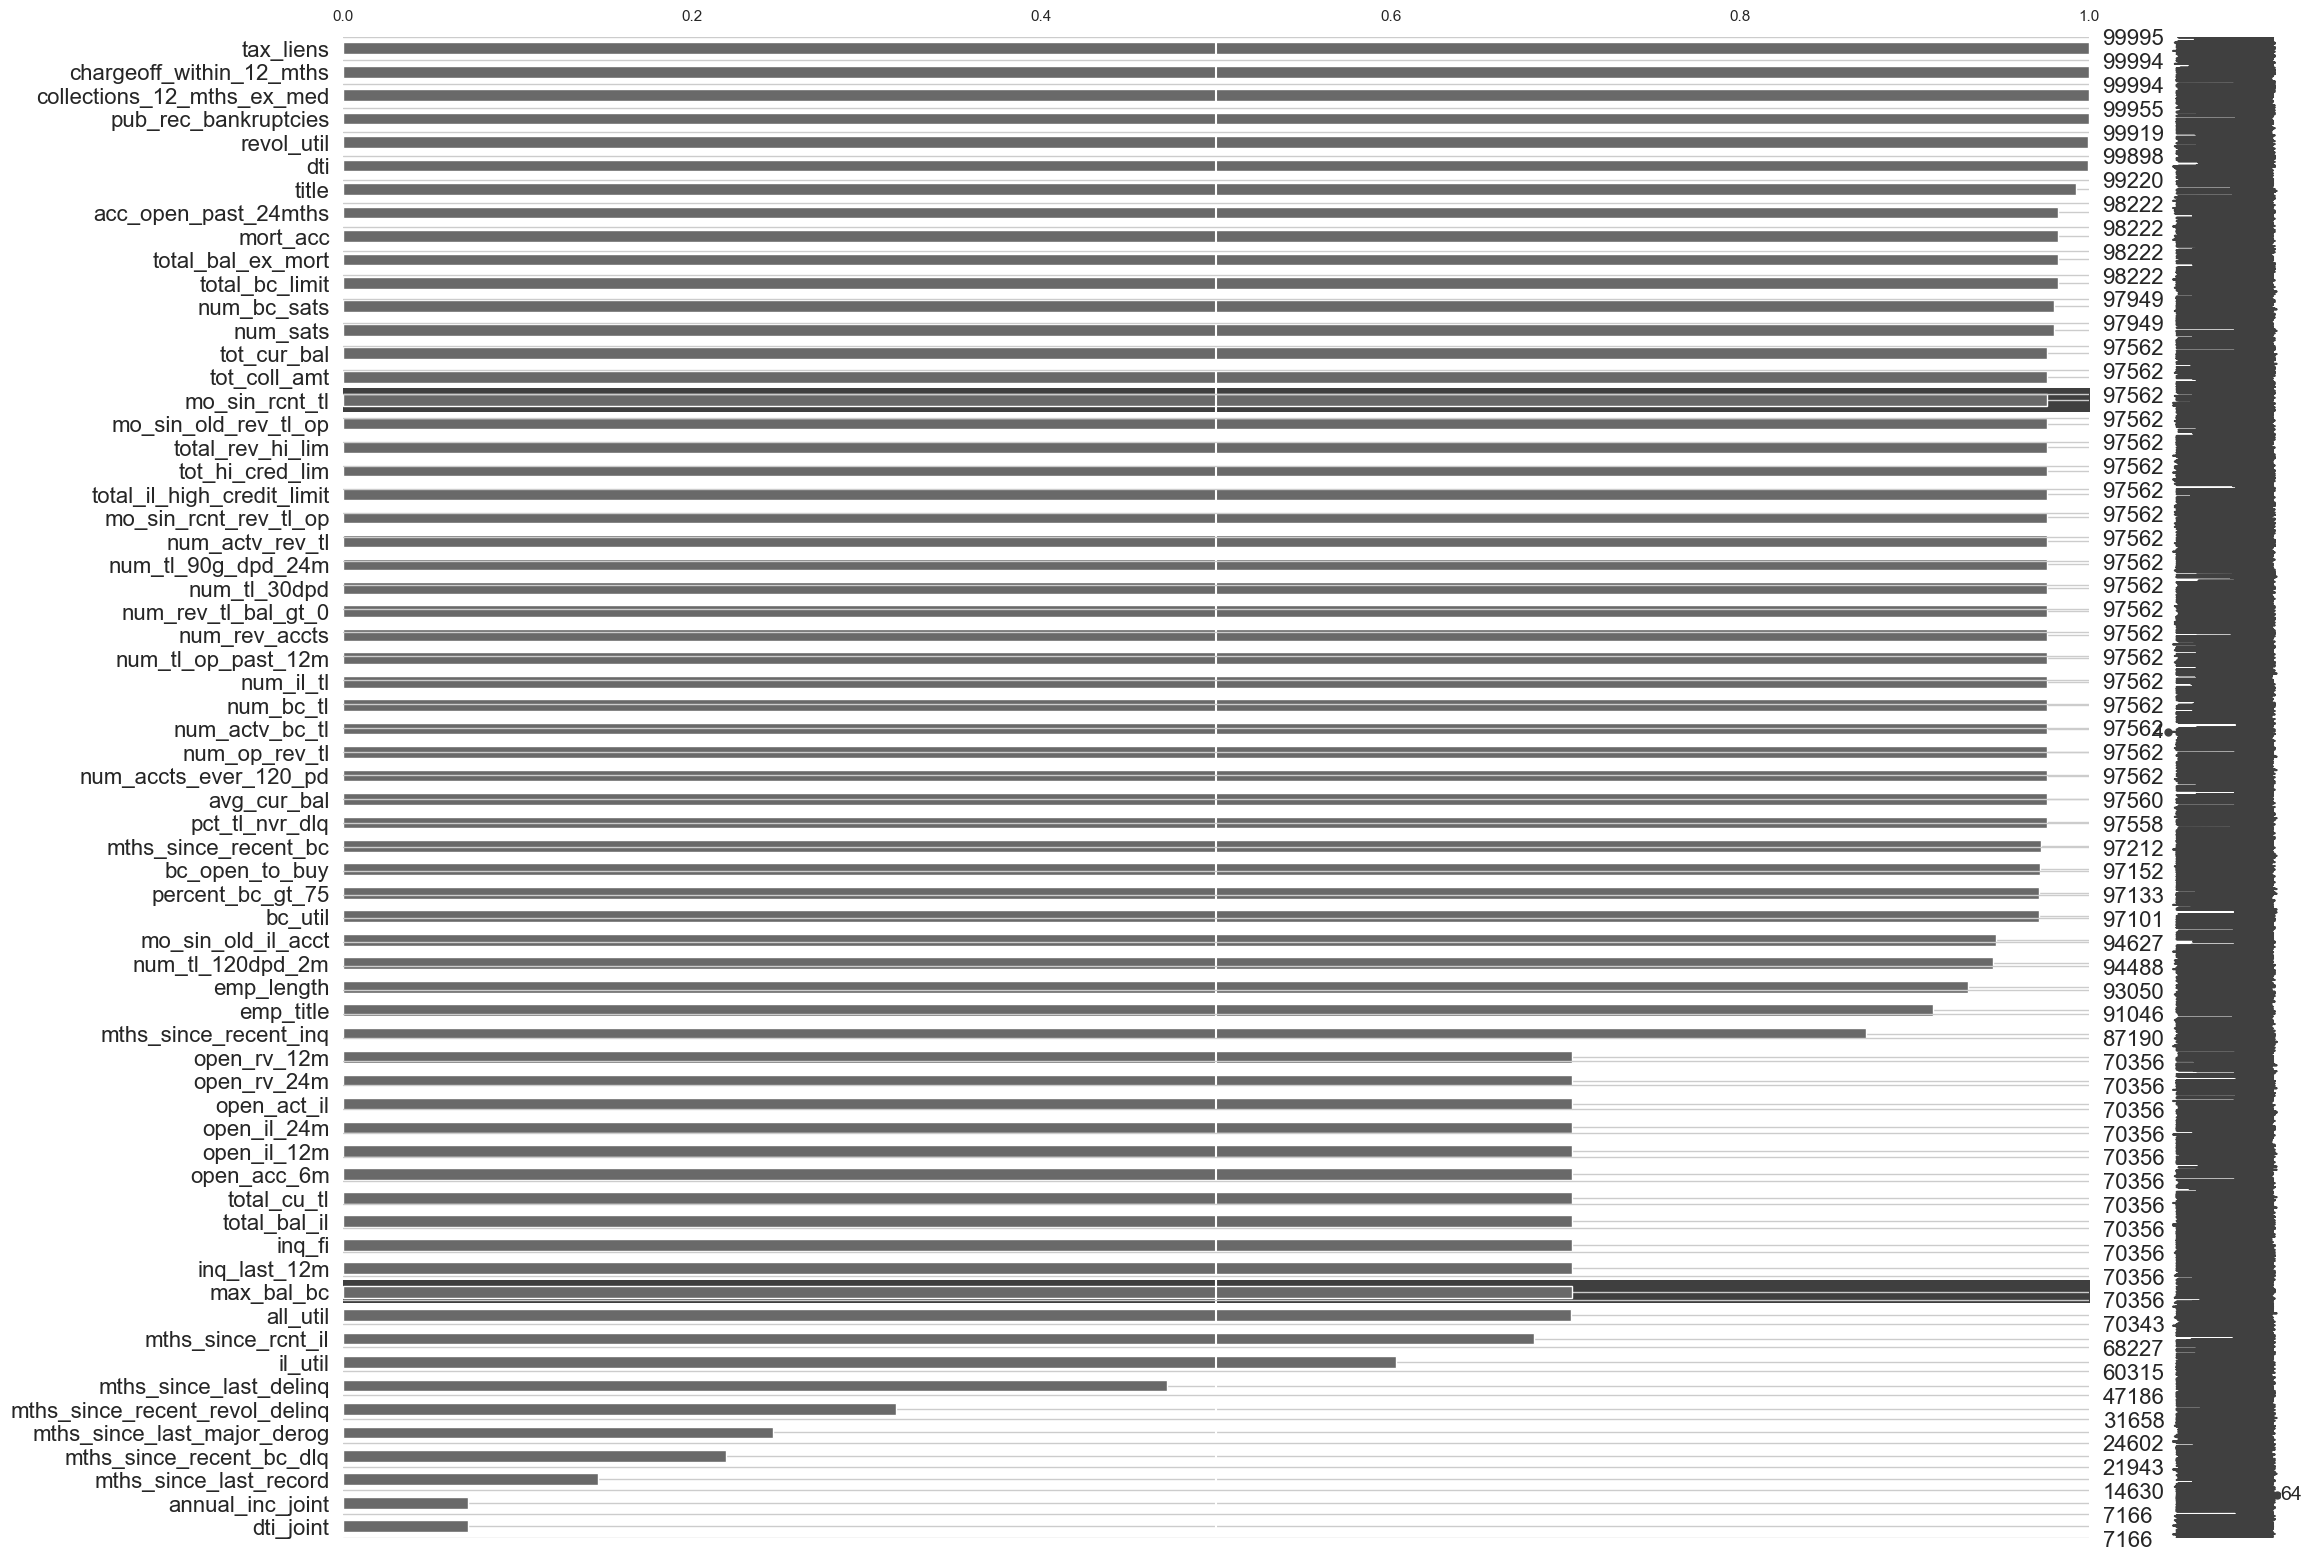

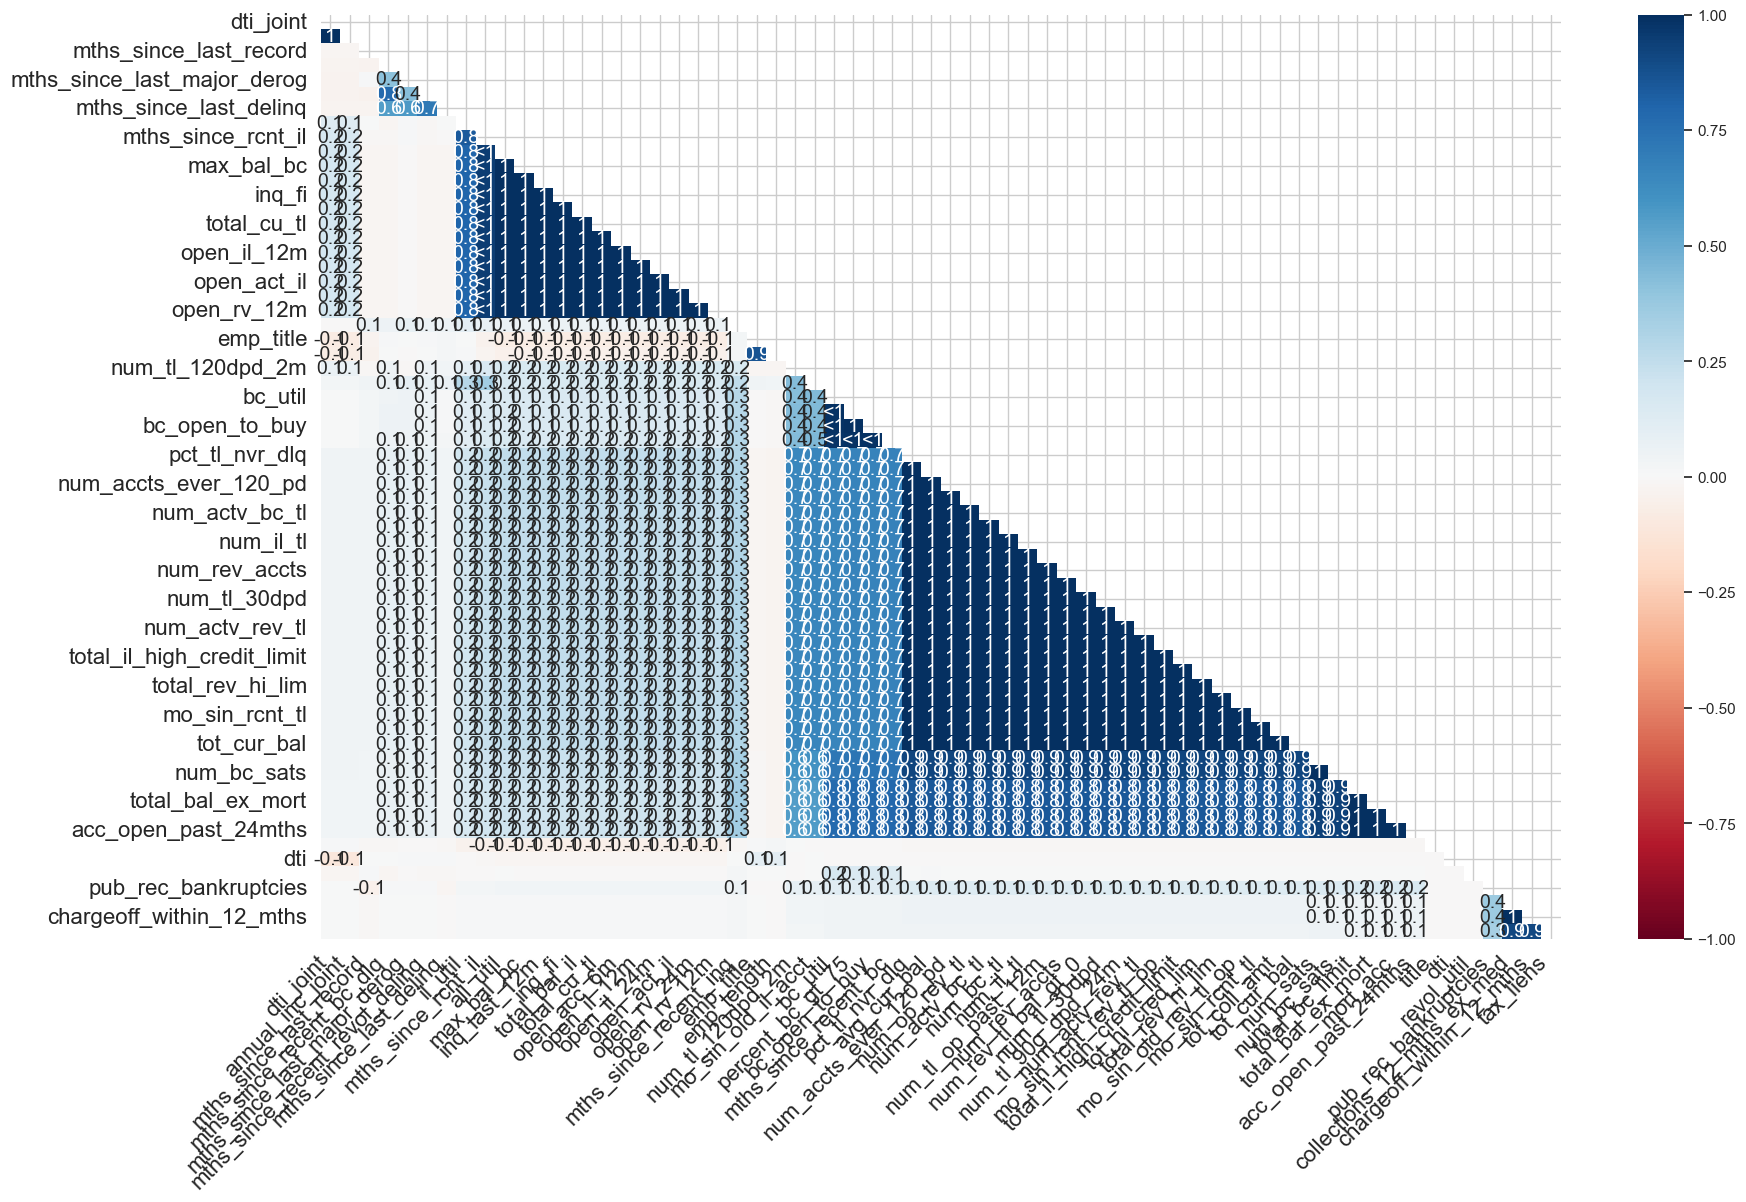

In [81]:
# Filter for columns with missing values greater than 0
missing_values_graph = df[missing_values[missing_values > 0].index]

print("Categorical Data Missing Values\n")

# Visualize the missing data using the missingno library
msno.matrix(missing_values_graph)
msno.bar(missing_values_graph)
msno.heatmap(missing_values_graph)
# msno.dendrogram(missing_values_graph) #removed for the final anlysis to avoid cluttering the document with the same data but a different way to show it

### Summary of our missing data findings

#### 1. Missing Data Matrix Plot:
- The matrix plot visualizes the distribution of missing data across the dataset columns.
- Some columns have no missing data, but a few are significantly affected.
- Several columns have a substantial percentage of missing data, some exceeding 75%.
- Key columns with high missing data include:
  - `hardship_*` related fields, `payment_plan_start_date`, `sec_app_*` fields, etc.

#### 2. Missing Data Heatmap:
- The heatmap shows correlations between columns with missing data.
- Higher intensity colors indicate stronger correlations.
- Examples include `emp_title`, `mths_since_last_major_derog`, and `revol_util` showing linked missingness.
- Strong correlations exist between certain groups of columns, suggesting shared patterns in their missing values.
- We can clearly distinguish 4 groups. The three largest relating to `hardship_`, `sec_`, and `Acc` data.

### Creating Missing Value Indicators

Opposed to solomly removing values and using collected data to predict loan defaults I will create indicator variables that flag whether a value was missing for a given feature. 

This allows us to retain missing values while also capturing information about whether a data point was reported or not, which could enhance our analysis.

Our draft list of features (`draft_features`) now includes 122 columns identified during the analysis of the missing data, and the basic statistics from `df` along with the information within the data dictionary.

Let's expand `df` with new columns to keep a record of the missingness values.

In [82]:
# Empty list to store the new column names
missing_columns = []

# Iterate through each column in the 'features' list to create missing value indicator columns
for col in features:
    if col in missing_values:  # Check if the column is in the missing_value_indicator list
        indicator_col_name = f"{col}_missing_clean_kn"  # Create a new column name for the missing indicator
        df[indicator_col_name] = df[col].isnull().astype(int)  # 1 for missing, 0 for not missing

        # Append the new column name to the list
        missing_columns.append(indicator_col_name)

# Display the list of new column names
print("New missing indicator columns:", missing_columns)
print("Count of New Missing Columns created:", len(missing_columns))


New missing indicator columns: ['acc_now_delinq_missing_clean_kn', 'acc_open_past_24mths_missing_clean_kn', 'addr_state_missing_clean_kn', 'all_util_missing_clean_kn', 'annual_inc_missing_clean_kn', 'annual_inc_joint_missing_clean_kn', 'application_type_missing_clean_kn', 'avg_cur_bal_missing_clean_kn', 'bc_open_to_buy_missing_clean_kn', 'bc_util_missing_clean_kn', 'chargeoff_within_12_mths_missing_clean_kn', 'collections_12_mths_ex_med_missing_clean_kn', 'delinq_2yrs_missing_clean_kn', 'delinq_amnt_missing_clean_kn', 'dti_missing_clean_kn', 'dti_joint_missing_clean_kn', 'earliest_cr_line_missing_clean_kn', 'emp_length_missing_clean_kn', 'emp_title_missing_clean_kn', 'fico_range_high_missing_clean_kn', 'fico_range_low_missing_clean_kn', 'funded_amnt_missing_clean_kn', 'funded_amnt_inv_missing_clean_kn', 'grade_missing_clean_kn', 'home_ownership_missing_clean_kn', 'il_util_missing_clean_kn', 'initial_list_status_missing_clean_kn', 'inq_fi_missing_clean_kn', 'inq_last_12m_missing_clean_k

C:\Users\kiera\AppData\Local\Temp\ipykernel_30384\3638912159.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[indicator_col_name] = df[col].isnull().astype(int)  # 1 for missing, 0 for not missing
C:\Users\kiera\AppData\Local\Temp\ipykernel_30384\3638912159.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[indicator_col_name] = df[col].isnull().astype(int)  # 1 for missing, 0 for not missing
C:\Users\kiera\AppData\Local\Temp\ipykernel_30384\3638912159.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is 

## Y feature transformation

In [83]:
df['loan_status'].value_counts()

loan_status
Fully Paid                                             51189
Current                                                35294
Charged Off                                            12384
Late (31-120 days)                                       535
In Grace Period                                          329
Late (16-30 days)                                         90
Does not meet the credit policy. Status:Fully Paid        69
Issued                                                    63
Does not meet the credit policy. Status:Charged Off       33
Default                                                   14
Name: count, dtype: int64

In [84]:
# Define the logical groupings for 'loan_status'
loan_status_groupings = {
    'Fully Paid': 'Good Loan',
    'Current': 'Good Loan',
    'Charged Off': 'Defaulted Loan',
    'Late (31-120 days)': 'Defaulted Loan',
    'In Grace Period': 'Defaulted Loan',
    'Late (16-30 days)': 'Defaulted Loan',
    'Does not meet the credit policy. Status:Fully Paid': 'Good Loan',
    'Issued': 'Good Loan',
    'Does not meet the credit policy. Status:Charged Off': 'Defaulted Loan',
    'Default': 'Defaulted Loan'
}

# Apply the grouping to the 'loan_status' column
df['loan_status_grouped_kn'] = df['loan_status'].replace(loan_status_groupings)

# Verify the groupings
print(df['loan_status_grouped_kn'].value_counts())

features.append('loan_status_grouped_kn')

loan_status_grouped_kn
Good Loan         86615
Defaulted Loan    13385
Name: count, dtype: int64


C:\Users\kiera\AppData\Local\Temp\ipykernel_30384\3017951417.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['loan_status_grouped_kn'] = df['loan_status'].replace(loan_status_groupings)


## Basic Data Analysis

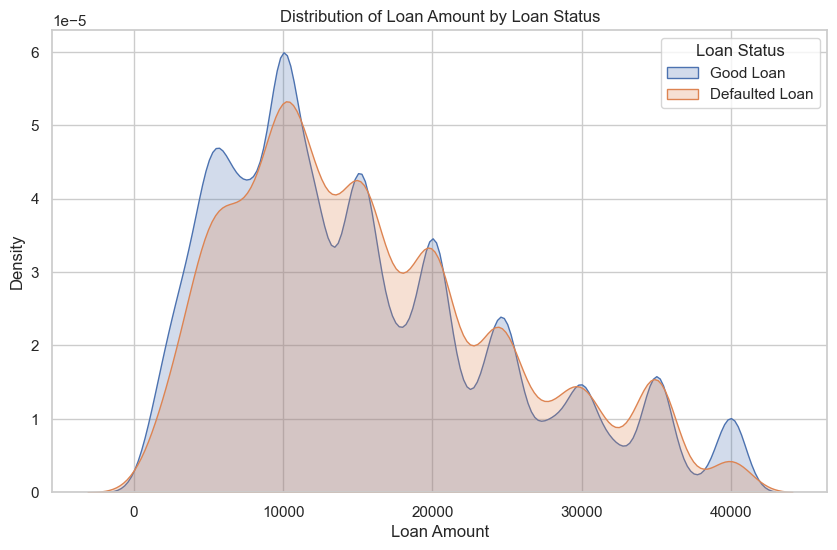

In [85]:
plt.figure(figsize=(10, 6))
for status in df['loan_status_grouped_kn'].unique():
    sns.kdeplot(df[df['loan_status_grouped_kn'] == status]['loan_amnt'], label=status, fill=True)
plt.title('Distribution of Loan Amount by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.legend(title="Loan Status")
plt.show()

The above image tells us that the marjority of loans range between 5-15k. However, we can see that there a majority of small (5k) to mid (10k) sized loans that have a tendancy to default. 

C:\Users\kiera\AppData\Local\Temp\ipykernel_30384\501775034.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['emp_length_cleaned'] = df['emp_length'].replace({
C:\Users\kiera\AppData\Local\Temp\ipykernel_30384\501775034.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['emp_length_cleaned'] = df['emp_length'].replace({


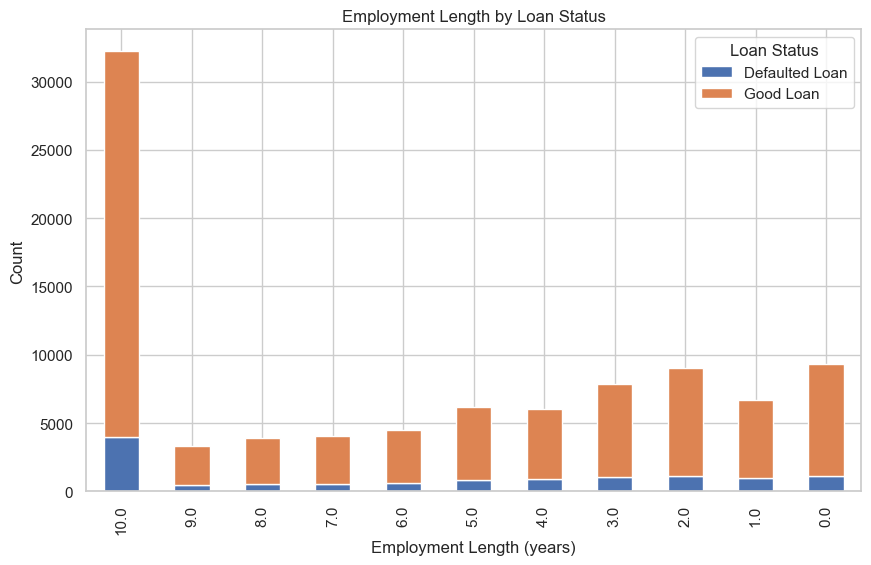

In [86]:
df['emp_length_cleaned'] = df['emp_length'].replace({
    '10+ years': 10.0,
    '9 years': 9.0, '8 years': 8.0, '7 years': 7.0, '6 years': 6.0, '5 years': 5.0,
    '4 years': 4.0, '3 years': 3.0, '2 years': 2.0, '1 year': 1.0, '< 1 year': 0.0,
    'n/a': None  # Assuming 'n/a' represents missing values
})

# Drop any NaN values in emp_length_cleaned if necessary
df = df.dropna(subset=['emp_length_cleaned'])

# Create a crosstab of loan_status_grouped_kn and sorted emp_length
emp_length_counts = pd.crosstab(df['emp_length_cleaned'], df['loan_status_grouped_kn'])

# Sort the index of emp_length_counts in descending order
emp_length_counts = emp_length_counts.sort_index(ascending=False)

# Plot as a stacked bar chart
emp_length_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the plot title and labels
plt.title('Employment Length by Loan Status')
plt.xlabel('Employment Length (years)')
plt.ylabel('Count')
plt.legend(title="Loan Status")
plt.show()

In the above image we can clearly see that 10 year tenure dominates the loan landscape. It would be interesting to see what the ratio per group is across Employment Length. I'd expect to see 1 and 2 years have a greater % of defaulted loans across the entire group.

In [87]:
# Replace NaN values in emp_length with None and convert to numerical values
df['emp_length_cleaned'] = df['emp_length'].replace({
    '10+ years': 10.0,
    '9 years': 9.0, '8 years': 8.0, '7 years': 7.0, '6 years': 6.0, '5 years': 5.0,
    '4 years': 4.0, '3 years': 3.0, '2 years': 2.0, '1 year': 1.0, '< 1 year': 0.0,
    'n/a': None  # Assuming 'n/a' represents missing values
})

# Drop any NaN values in emp_length_cleaned if necessary
df = df.dropna(subset=['emp_length_cleaned'])

# Create a crosstab of loan_status_grouped_kn and emp_length_cleaned
emp_length_counts = pd.crosstab(df['emp_length_cleaned'], df['loan_status_grouped_kn'])

# Calculate the percentage for each loan status within each employment length year
emp_length_percentage = emp_length_counts.div(emp_length_counts.sum(axis=1), axis=0) * 100

# Sort the index of emp_length_percentage in descending order
emp_length_percentage = emp_length_percentage.sort_index(ascending=False)

# Format each value to two decimal places with a % sign
emp_length_percentage = emp_length_percentage.applymap(lambda x: f"{x:.2f} %")

# Display the resulting table
emp_length_percentage


C:\Users\kiera\AppData\Local\Temp\ipykernel_30384\3601271610.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['emp_length_cleaned'] = df['emp_length'].replace({
C:\Users\kiera\AppData\Local\Temp\ipykernel_30384\3601271610.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  emp_length_percentage = emp_length_percentage.applymap(lambda x: f"{x:.2f} %")


loan_status_grouped_kn Defaulted Loan Good Loan
emp_length_cleaned                             
10.0                          12.26 %   87.74 %
9.0                           14.88 %   85.12 %
8.0                           14.44 %   85.56 %
7.0                           13.58 %   86.42 %
6.0                           14.28 %   85.72 %
5.0                           13.51 %   86.49 %
4.0                           14.54 %   85.46 %
3.0                           13.36 %   86.64 %
2.0                           12.86 %   87.14 %
1.0                           14.09 %   85.91 %
0.0                           12.44 %   87.56 %

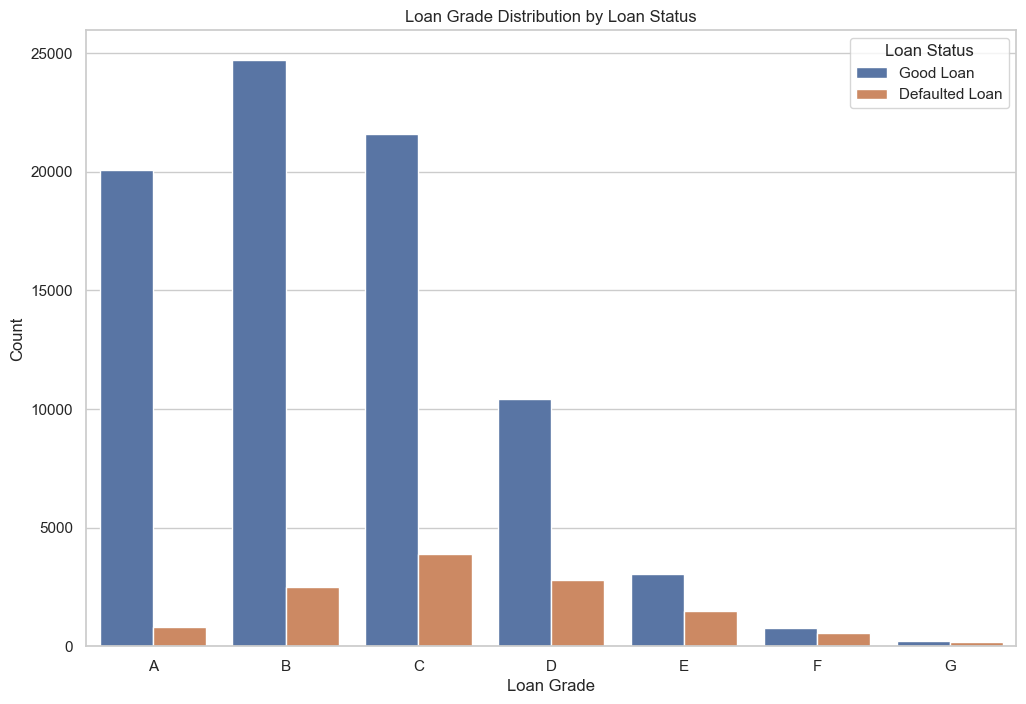

In [88]:
plt.figure(figsize=(12, 8))
sns.countplot(x='grade', hue='loan_status_grouped_kn', data=df, order=sorted(df['grade'].unique()))
plt.title('Loan Grade Distribution by Loan Status')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.legend(title="Loan Status")
plt.show()


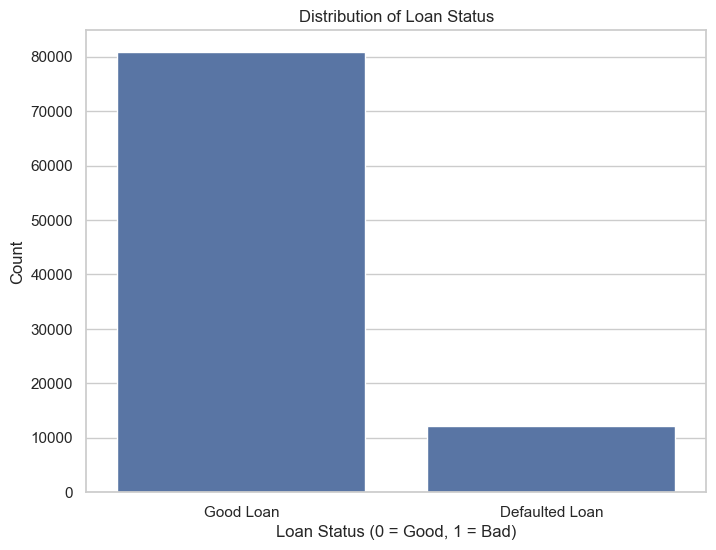

In [89]:
# Visualize distribution of loan status
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status_grouped_kn', data=df)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status (0 = Good, 1 = Bad)')
plt.ylabel('Count')
plt.show()


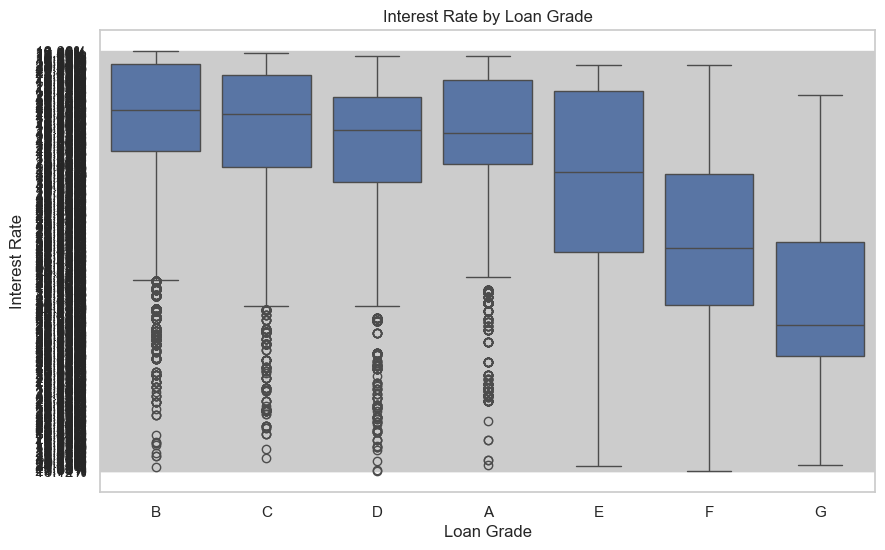

In [90]:
# Box plot of interest rate by loan grade
plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='int_rate', data=df)
plt.title('Interest Rate by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate')
plt.show()


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\kiera\AppData\Local\Temp\ipykernel_30384\3631212987.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['emp_length_num'] = df['emp_length'].str.extract('(\d+)').astype(float)
C:\Users\kiera\AppData\Local\Temp\ipykernel_30384\3631212987.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['emp_length_num'].fillna(0, inplace=True)  # Handle '< 1 year' and 'n/a'


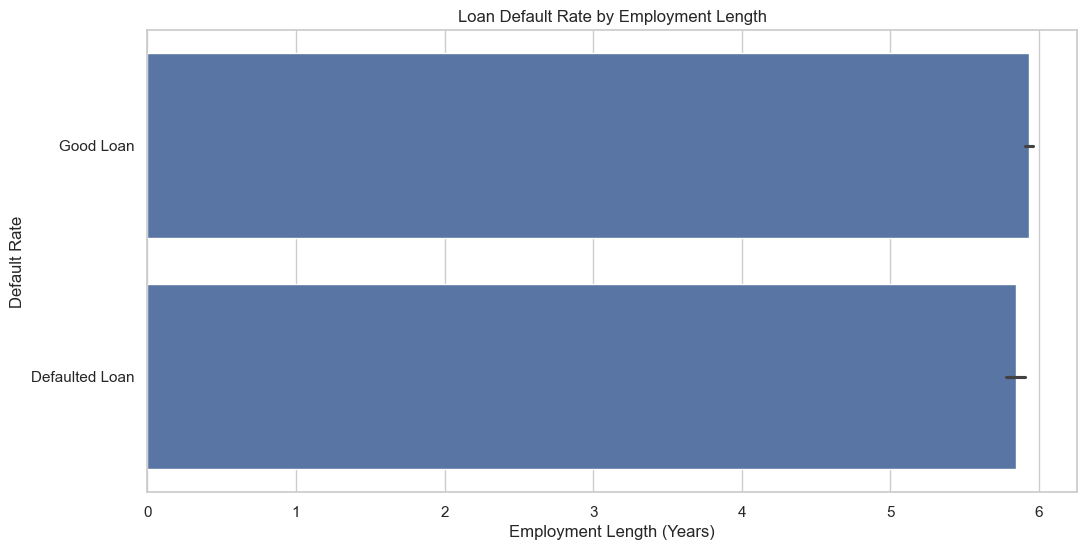

In [91]:
# Extract numeric value from 'emp_length'
df['emp_length_num'] = df['emp_length'].str.extract('(\d+)').astype(float)
df['emp_length_num'].fillna(0, inplace=True)  # Handle '< 1 year' and 'n/a'

# Bar plot of loan status by employment length
plt.figure(figsize=(12, 6))
sns.barplot(x='emp_length_num', y='loan_status_grouped_kn', data=df)
plt.title('Loan Default Rate by Employment Length')
plt.xlabel('Employment Length (Years)')
plt.ylabel('Default Rate')
plt.show()


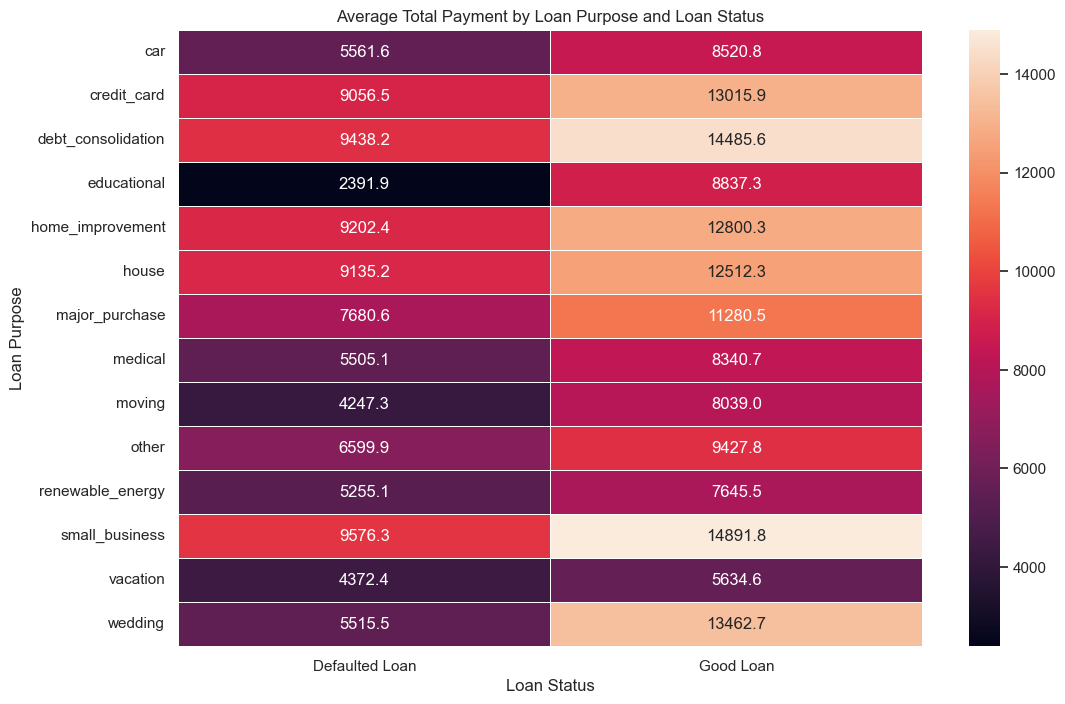

In [92]:
# Pivot table for heatmap
loan_purpose_pymnt = df.pivot_table(values='total_pymnt', index='purpose', columns='loan_status_grouped_kn', aggfunc="mean")

plt.figure(figsize=(12, 8))
sns.heatmap(loan_purpose_pymnt, annot=True, fmt=".1f", linewidths=.5)
plt.title('Average Total Payment by Loan Purpose and Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Purpose')
plt.show()


### Exploratory Data Analysis (EDA) on Missing Values

To understand the impact of missing values on our target variable (`loan_status`), we perform an exploratory analysis. 

This compares the distribution of loan status between rows where key variables are missing and where they are not. By doing this, we hope to detect which missing data is associated with loan outcomes. 

This helps us understand how big a influence on the target variable.


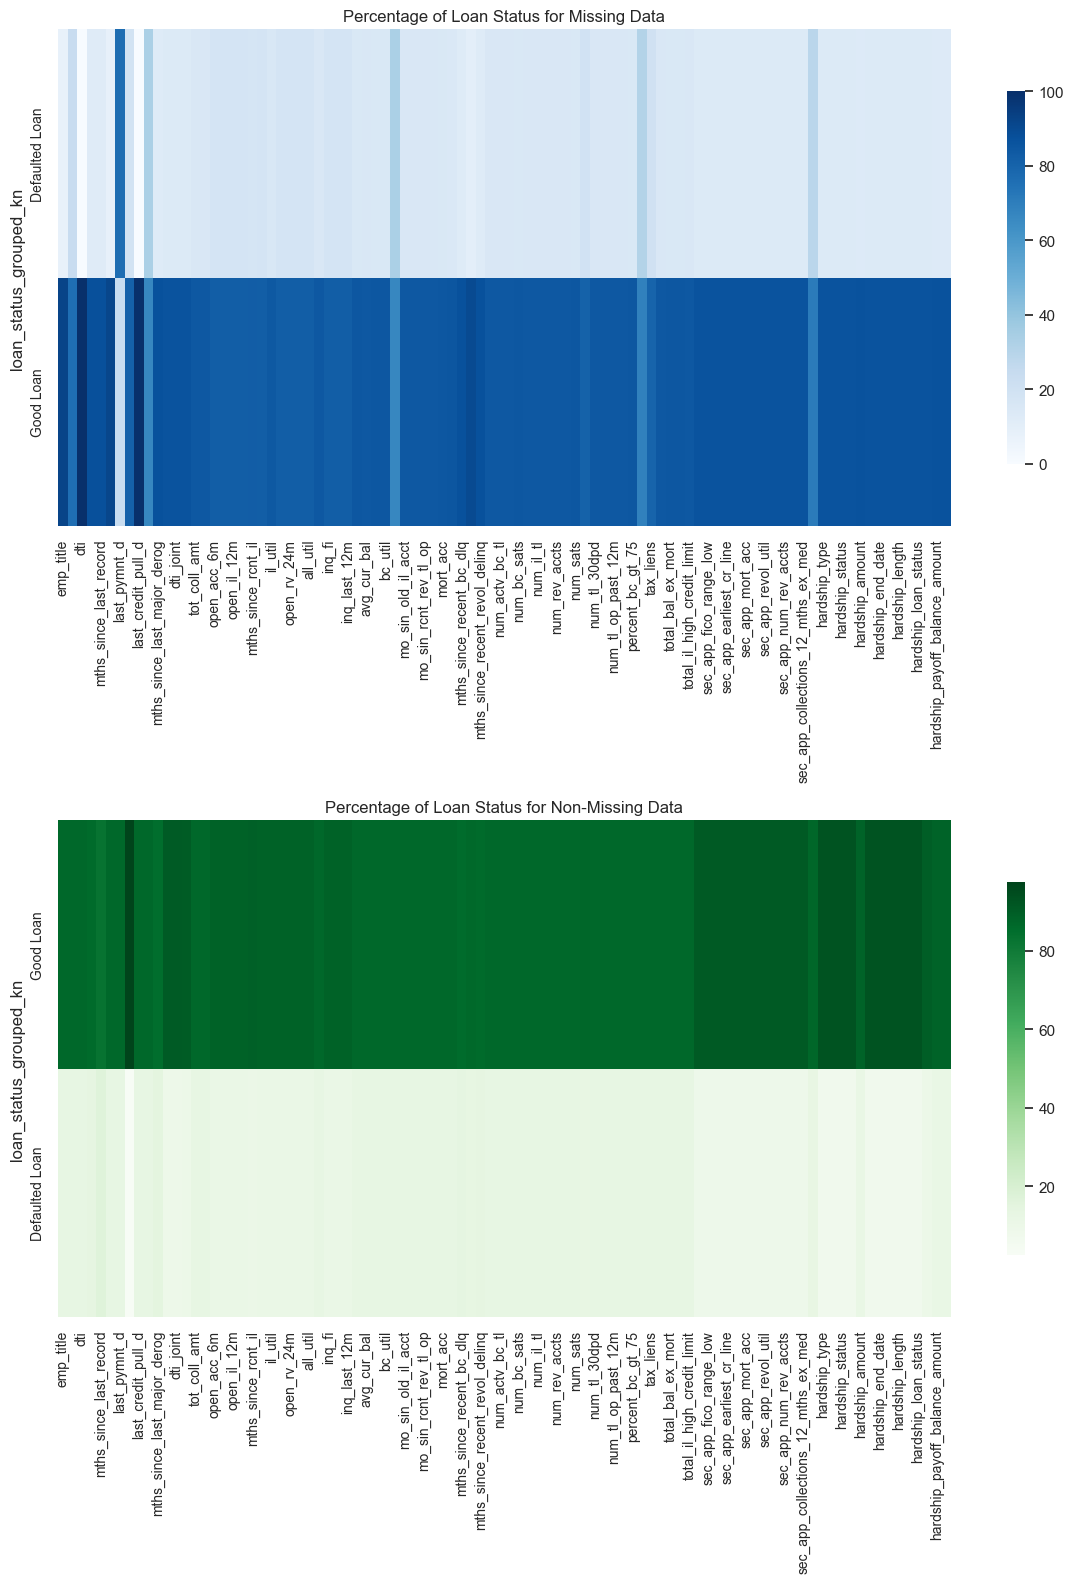

In [93]:
# Select columns that have missing values in df
missing_cols = df.columns[df.isnull().any()]

# Store results for plotting
missing_dict = {}
not_missing_dict = {}

# Function to collect percentages for missing and non-missing data
def missing_value_analysis(column, target_column='loan_status_grouped_kn'):
    missing = df[df[column].isnull()][target_column].value_counts(normalize=True) * 100
    not_missing = df[df[column].notnull()][target_column].value_counts(normalize=True) * 100
    missing_dict[column] = missing
    not_missing_dict[column] = not_missing

# Apply the function for all columns with missing data
for col in missing_cols:
    missing_value_analysis(col)

# Create DataFrames for heatmaps
missing_df = pd.DataFrame(missing_dict).fillna(0)  # Fill NaN with 0 to ensure proper heatmap display
not_missing_df = pd.DataFrame(not_missing_dict).fillna(0)

# Plotting heatmaps one below the other
fig, ax = plt.subplots(2, 1, figsize=(12, 16), gridspec_kw={'height_ratios': [1, 1]})  # Adjust aspect ratio

# Heatmap for missing data
sns.heatmap(missing_df, annot=False, cmap="Blues", ax=ax[0], cbar_kws={"shrink": .75})
ax[0].set_title('Percentage of Loan Status for Missing Data')
ax[0].tick_params(axis='x', rotation=90, labelsize=10)  # Rotate x-axis labels for readability
ax[0].tick_params(axis='y', labelsize=10)  # Adjust y-axis label size

# Heatmap for non-missing data
sns.heatmap(not_missing_df, annot=False, cmap="Greens", ax=ax[1], cbar_kws={"shrink": .75})
ax[1].set_title('Percentage of Loan Status for Non-Missing Data')
ax[1].tick_params(axis='x', rotation=90, labelsize=10)  # Rotate x-axis labels for readability
ax[1].tick_params(axis='y', labelsize=10)  # Adjust y-axis label size

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [94]:
# Correct references to 'completed' to 'complete' in the 'hardship_status' column
df['hardship_status_clean_kn'] = df['hardship_status'].replace('COMPLETED', 'COMPLETE')

features.append('hardship_status_clean_kn')

In [95]:
groups = {
    "Credit History": [
        'earliest_cr_line', 'fico_range_high', 'fico_range_low', 'last_fico_range_high',
        'last_fico_range_low', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'num_accts_ever_120_pd',
        'num_tl_120dpd_2m', 'pub_rec', 'pub_rec_bankruptcies'
    ],
    "Current Debt and Payment Behaviors": [
        'acc_now_delinq', 'all_util', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
        'collections_12_mths_ex_med', 'delinq_2yrs', 'delinq_amnt', 'max_bal_bc', 'mths_since_last_delinq',
        'num_rev_accts', 'num_rev_tl_bal_gt_0', 'percent_bc_gt_75', 'revol_bal', 'revol_util',
        'tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit'
    ],
    "Employment": [
        'emp_length', 'emp_title', 'annual_inc', 'annual_inc_joint'
    ],
    "Credit Inquiries": [
        'inq_fi', 'inq_last_12m', 'inq_last_6mths', 'num_tl_op_past_12m'
    ],
    "Loan Application Information": [
        'loan_amnt', 'term', 'int_rate', 'application_type', 'grade', 'sub_grade', 'purpose',
        'issue_d', 'home_ownership', 'zip_code', 'addr_state', 'title', 'desc', 'url'
    ],
    "Hardship and Settlement Information": [
        'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'hardship_start_date',
        'hardship_end_date', 'hardship_amount', 'hardship_length', 'settlement_status', 'settlement_date',
        'settlement_amount', 'settlement_percentage', 'settlement_term'
    ],
    "Co-Borrower Information": [
        'annual_inc_joint', 'dti_joint', 'verified_status_joint', 'revol_bal_joint',
        'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line',
        'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util'
    ],
    "Loan Performance": [
        'funded_amnt', 'funded_amnt_inv', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
        'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'recoveries',
        'collection_recovery_fee', 'last_pymnt_amnt', 'last_pymnt_d', 'next_pymnt_d'
    ]
}

In [96]:
# Define selected groups to include in missing value indicators
selected_groups = ["Credit History", "Employment", "Credit Inquiries"]  # Groups based on the data dictionary

# Dynamically create missing_value_indicator from selected groups
missing_value_indicator = sum([groups[group] for group in selected_groups], [])

# Initialize list to keep track of new indicator columns
new_missing_columns = []

# Iterate through each column to create individual missing indicators
for col in missing_value_indicator:
    indicator_col_name = f"{col}_missing_clean_kn"  # New column name for the missing indicator
    df[indicator_col_name] = df[col].isnull().astype(int)  # 1 for missing, 0 for not missing
    
    # Ensure each new column is a Series (1-dimensional)
    df[indicator_col_name] = df[indicator_col_name].squeeze()
    
    # Track new column names and add to features
    new_missing_columns.append(indicator_col_name)
    features.append(indicator_col_name)

# Remove original columns from features if they exist
features = [col for col in features if col not in missing_value_indicator]

# Display results
print("New missing indicator columns added to features:", new_missing_columns)
print("Count of New Missing Columns created:", len(new_missing_columns))


New missing indicator columns added to features: ['earliest_cr_line_missing_clean_kn', 'fico_range_high_missing_clean_kn', 'fico_range_low_missing_clean_kn', 'last_fico_range_high_missing_clean_kn', 'last_fico_range_low_missing_clean_kn', 'mo_sin_old_il_acct_missing_clean_kn', 'mo_sin_old_rev_tl_op_missing_clean_kn', 'num_accts_ever_120_pd_missing_clean_kn', 'num_tl_120dpd_2m_missing_clean_kn', 'pub_rec_missing_clean_kn', 'pub_rec_bankruptcies_missing_clean_kn', 'emp_length_missing_clean_kn', 'emp_title_missing_clean_kn', 'annual_inc_missing_clean_kn', 'annual_inc_joint_missing_clean_kn', 'inq_fi_missing_clean_kn', 'inq_last_12m_missing_clean_kn', 'inq_last_6mths_missing_clean_kn', 'num_tl_op_past_12m_missing_clean_kn']
Count of New Missing Columns created: 19


### Summary of Missing and Non-Missing Data by Loan Status

#### 1. Percentage of Missing Data (First Image)
- **Paid Loan**: Shows a high percentage of missing data across numerous columns, particularly towards the end of the list (indicated by darker shades of blue).
- **Active Loan** and **Late Loan**: Generally have less missing data, though some specific columns still contain notable missing values.
- **Defaulted Loan**: Contains fewer missing values compared to `Paid Loan`, but some columns still show missing data.

#### 2. Percentage of Non-Missing Data (Second Image)
- **Paid Loan**: Displays lower percentages of non-missing data across various columns, aligning with the missing data heatmap (darker greens represent more missing data).
- **Active Loan** and **Late Loan**: Feature higher percentages of non-missing data in most columns, shown by lighter green shades, suggesting more complete data.
- **Defaulted Loan**: Generally has a higher percentage of non-missing data than `Paid Loan`, but less than `Active Loan` and `Late Loan`.

# Exploratory Data Analysis

## List split

Let's take our list of features we'd like to review for machine learning and split them into 3 seperate lists (boolean, numerical, and categorical) for further analysis.

In this next phase I want to explore the feature selection for multicollinearity and distribution.

In [97]:
def split_data_frame(new_features, df):
    """
    Splits the provided DataFrame into three lists containing Boolean, Numerical, and Categorical column names.
    Converts floats with trailing zeros into integers and replaces NaN values with 0 for integers, 0.00 for floats.

    Parameters:
    features_list (list): List of column names to be checked.
    df (pd.DataFrame): The input DataFrame to split.

    Returns:
    tuple: A tuple containing three lists (boolean_cols, numerical_cols, categorical_cols).
    """
    boolean_cols = []
    numerical_cols = []
    categorical_cols = []

    # Define acceptable boolean values
    acceptable_boolean_values = {0, 1, True, False, 0.0, 1.0}

    for col in features:
        # Treat each column explicitly as a Series
        column_series = df[col]

        # Handle cases where columns might be interpreted incorrectly
        if pd.api.types.is_bool_dtype(column_series) or all(column_series.dropna().isin(acceptable_boolean_values)):
            boolean_cols.append(col)
        elif pd.api.types.is_numeric_dtype(column_series):
            # Check for floats with trailing zeros
            if column_series.dtype == 'float64':
                # Check if all float values are equivalent to integers
                if all(column_series.dropna() == column_series.dropna().astype(int)):
                    df[col] = column_series.fillna(0).astype(int)  # Replace NaNs with 0 and convert to int
                else:
                    df[col] = column_series.fillna(0.00)  # Replace NaNs with 0.00 for floats
                numerical_cols.append(col)
            else:
                df[col] = column_series.fillna(0)  # Replace NaNs with 0 for integers
                numerical_cols.append(col)
        else:
            categorical_cols.append(col)
    
    # Print a summary of the count of columns in each list
    print(f"Summary of column counts:")
    print(f"boolean_list contains {len(boolean_cols)} value(s)")
    print(f"numerical_list contains {len(numerical_cols)} value(s)")
    print(f"categorical_list contains {len(categorical_cols)} value(s)")
    print(f"The feature list we'll be working with contains {df[new_features].shape} rows and columns.")

    return boolean_cols, numerical_cols, categorical_cols

# Instructions:
# this calls the split_data_frame function above create three lists to capture the sorting outputs in. 
# These will later be used to pull some graphs to evaluate the data and what possible transformations we've missed.
# boolean_list, numerical_list, categorical_list = split_data_frame(new_features, df)


In [98]:
# Check which columns are in df
missing_columns = [col for col in features if col not in df.columns]

print("Missing columns:", missing_columns)

Missing columns: []


In [99]:
# this calls the split_data_frame function above create three lists to capture the sorting outputs in. 
# These will later be used to pull some graphs to evaluate the data and what possible transformations we've missed.
# Our function parameters are list and the latest version of our data frame in this caes new_features and df accordingly.
boolean_list, numerical_list, categorical_list = split_data_frame(features, df)

Summary of column counts:
boolean_list contains 20 value(s)
numerical_list contains 68 value(s)
categorical_list contains 18 value(s)
The feature list we'll be working with contains (93050, 106) rows and columns.


In [100]:
df[categorical_list].head()

addr_state application_type grade home_ownership initial_list_status  \
0         NY       Individual     B       MORTGAGE                   w   
1         LA       Individual     B           RENT                   w   
2         FL       Individual     B       MORTGAGE                   f   
4         NE       Individual     C       MORTGAGE                   w   
5         CA       Individual     B           RENT                   w   

  int_rate   issue_d  loan_status             purpose pymnt_plan revol_util  \
0   13.08%  Mar-2020      Current    home_improvement          n      82.8%   
1    9.16%  Feb-2016      Current         credit_card          n      64.5%   
2   10.49%  Jan-2015   Fully Paid         credit_card          n      52.6%   
4   13.59%  Jan-2018   Fully Paid  debt_consolidation          n      27.1%   
5   11.49%  Nov-2015  Charged Off              moving          n      38.7%   

  sub_grade        term                    title verification_status zip_code  \
0        B5   36 months         Home improvement     Source Verified    115xx   
1        B2   60 months  Credit card refinancing     Source Verified    708xx   
2        B3   36 months  Credit card refinancing        Not Verified    347xx   
4        C2   60 months       Debt consolidation     Source Verified    681xx   
5        B5   36 months    Moving and relocation            Verified    940xx   

  loan_status_grouped_kn hardship_status_clean_kn  
0              Good Loan                      NaN  
1              Good Loan                      NaN  
2              Good Loan                      NaN  
4              Good Loan                      NaN  
5         Defaulted Loan                      NaN

In [101]:
df[numerical_list].head()

acc_now_delinq  acc_open_past_24mths  all_util  avg_cur_bal  \
0               0                     1        59        64756   
1               0                     4        67         6182   
2               0                     4         0        22733   
4               0                     5        43         5641   
5               0                     1         0         4212   

   bc_open_to_buy  bc_util  chargeoff_within_12_mths  \
0               0      0.0                         0   
1            7741     40.5                         0   
2            4521     54.8                         0   
4           17318     39.9                         0   
5            4381     43.1                         0   

   collections_12_mths_ex_med  delinq_2yrs  delinq_amnt    dti  dti_joint  \
0                           1            1            0  20.25        0.0   
1                           0            0            0  25.33        0.0   
2                           0            0            0   7.22        0.0   
4                           0            0            0  24.30        0.0   
5                           0            0            0  11.56        0.0   

   funded_amnt  funded_amnt_inv  il_util  installment  loan_amnt  max_bal_bc  \
0         4000           4000.0       56       134.93       4000           0   
1        24000          24000.0       72       500.07      24000        2137   
2         5000           5000.0        0       162.49       5000           0   
4        14000          14000.0       60       322.79      14000        3907   
5         4000           4000.0        0       131.89       4000           0   

   mo_sin_rcnt_rev_tl_op  mo_sin_rcnt_tl  mort_acc  mths_since_last_delinq  \
0                     38              16         2                      19   
1                      7               7         0                       0   
2                     14               9         1                       0   
4                      6               6         2                       0   
5                     13              13         0                       0   

   mths_since_last_major_derog  mths_since_last_record  mths_since_rcnt_il  \
0                            0                     110                  16   
1                            0                       0                  14   
2                            0                      61                   0   
4                            0                       0                   7   
5                            0                      97                   0   

   mths_since_recent_bc  mths_since_recent_bc_dlq  mths_since_recent_inq  \
0                     0                        19                     16   
1                     7                         0                     24   
2                    14                         0                      1   
4                     6                         0                      5   
5                    13                         0                     13   

   mths_since_recent_revol_delinq  num_actv_bc_tl  num_actv_rev_tl  \
0                              19               0                2   
1                               0               3                5   
2                               0               3                5   
4                               0               4                5   
5                               0               2                3   

   num_bc_sats  num_bc_tl  num_il_tl  num_op_rev_tl  num_rev_accts  \
0            0          1          5              2              5   
1            5          6         15              7              9   
2            3          3          2              5              6   
4            5          6          5             13             16   
5            2          4          2              3              5   

   num_rev_tl_bal_gt_0  num_sats  num_tl_30dpd  num_tl_90g_dpd_24m  open_acc  \
0       

In [102]:
df[boolean_list].head()

policy_code  earliest_cr_line_missing_clean_kn  \
0          1.0                                  0   
1          1.0                                  0   
2          1.0                                  0   
4          1.0                                  0   
5          1.0                                  0   

   fico_range_high_missing_clean_kn  fico_range_low_missing_clean_kn  \
0                                 0                                0   
1                                 0                                0   
2                                 0                                0   
4                                 0                                0   
5                                 0                                0   

   last_fico_range_high_missing_clean_kn  \
0                                      0   
1                                      0   
2                                      0   
4                                      0   
5                                      0   

   last_fico_range_low_missing_clean_kn  mo_sin_old_il_acct_missing_clean_kn  \
0                                     0                                    0   
1                                     0                                    0   
2                                     0                                    0   
4                                     0                                    0   
5                                     0                                    0   

   mo_sin_old_rev_tl_op_missing_clean_kn  \
0                                      0   
1                                      0   
2                                      0   
4                                      0   
5                                      0   

   num_accts_ever_120_pd_missing_clean_kn  num_tl_120dpd_2m_missing_clean_kn  \
0                                       0                                  0   
1                                       0                                  0   
2                                       0                                  0   
4                                       0                                  0   
5                                       0                                  0   

   pub_rec_missing_clean_kn  pub_rec_bankruptcies_missing_clean_kn  \
0                         0                                      0   
1                         0                                      0   
2                         0                                      0   
4                         0                                      0   
5                         0                                      0   

   emp_length_missing_clean_kn  emp_title_missing_clean_kn  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
4                            0                           0   
5                            0                           0   

   annual_inc_missing_clean_kn  annual_inc_joint_missing_clean_kn  \
0                            0                                  1   
1                            0                                  1   
2                            0                                  1   
4                            0                                  1   
5                            0                                  1   

   inq_fi_missing_clean_kn  inq_last_12m_missing_clean_kn  \
0                        0                              0   
1                        0                              0   
2                        1                              1   
4                        0                              0   
5                        1                              1   

   inq_last_6mths_missing_clean_kn  num_tl_op_past_12m_missing_clean_kn  
0                                0                                    0  
1                                0 

The following sections are the code snippets we'll use to analyse our data (Numerical, Boolean, Categorical)

#### Numerical Processing

The below code creates a distribution plot and box plot for outlier detection along with the most common statistical analysis for normality and outlier (ztest and IQR). The function loops through the aforementioend numerical lists.

In [103]:
def analyze_numeric_columns(numeric_cols, dataframe):
    """
    Analyze and visualize numeric columns in a DataFrame.

    Parameters:
    numeric_cols (list): List of numeric column names to analyze.
    dataframe (pd.DataFrame): The DataFrame containing the data.
    """
    for column in numeric_cols:
        print(f"\nSummary Statistics and Analysis for Numeric Column: {column}")

        # Check if the column exists in the DataFrame
        if column not in dataframe.columns:
            print(f" '{column}' is not found in the DataFrame. Skipping...")
            continue

        # Ensure the column is converted to numeric
        dataframe.loc[:, column] = pd.to_numeric(dataframe[column], errors='coerce')

        # Drop NaN values to ensure we have numeric data for analysis
        numeric_data = dataframe[column].dropna()

        if numeric_data.empty:
            print(f"No valid numeric data available for column: {column}. Skipping...")
            continue  # Skip the column if there's no valid data

        # Calculate z-scores
        z_scores = (numeric_data - numeric_data.mean()) / numeric_data.std()

        # Calculate IQR
        Q1 = numeric_data.quantile(0.25)
        Q3 = numeric_data.quantile(0.75)
        IQR = Q3 - Q1

        # Identify outliers based on z-scores (z > 3 or z < -3)
        outliers_z = numeric_data[(z_scores > 3) | (z_scores < -3)]

        # Identify outliers based on IQR
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_iqr = numeric_data[(numeric_data < lower_bound) | (numeric_data > upper_bound)]

        # Create a figure for the distribution and box plot
        fig, axs = plt.subplots(1, 2, figsize=(FIG_WIDTH, FIG_HEIGHT))

        # Distribution plot (histogram)
        sns.histplot(numeric_data, kde=True, bins=10, ax=axs[0])
        axs[0].set_title(f'Distribution of {column}')
        axs[0].set_xlabel(column)
        axs[0].set_ylabel('Frequency')

        # Box plot for outlier detection
        sns.boxplot(x=numeric_data, ax=axs[1])
        axs[1].set_title(f'Box Plot for {column} (Outlier Detection)')
        axs[1].set_xlabel(column)

        # Adjust layout to prevent overlap
        plt.tight_layout()
        plt.show()

        # Summary Statistics
        print(f"\nSummary Statistics for Numeric  '{column}':")
        print(numeric_data.describe())

        # Interquartile Range (IQR)
        print(f"\nInterquartile Range (IQR): {IQR:.4f}")
        print(f"Lower Bound for Outliers (IQR method): {lower_bound:.4f}")
        print(f"Upper Bound for Outliers (IQR method): {upper_bound:.4f}")
        print(f"Number of Outliers (IQR method): {len(outliers_iqr)}")

        # Display outliers based on IQR
        #if not outliers_iqr.empty:
        #    print("\nOutliers detected using the IQR method:")
        #    print(outliers_iqr)
        #else:
        #    print("\nNo outliers detected using the IQR method.")

        # Z-scores
        print("\nZ-score Summary:")
        print(z_scores.describe())

        print(f"\nNumber of Outliers (Z-score method): {len(outliers_z)}")

        # Display outliers based on Z-scores
        #if not outliers_z.empty:
        #    print("\nOutliers detected using the Z-score method:")
        #    print(outliers_z)
        #else:
        #    print("\nNo outliers detected using the Z-score method.")

        # Skewness
        skewness_value = skew(numeric_data)
        print(f"\nSkewness: {skewness_value:.4f}")

        # Normality Tests
        print("\nNormality Tests:")
        # D'Agostino's K^2 Test
        k2_stat, k2_p = normaltest(numeric_data)
        print(f"D'Agostino's K^2 Test: Statistic={k2_stat:.4f}, p-value={k2_p:.4f}")

        # Shapiro-Wilk Test
        shapiro_stat, shapiro_p = shapiro(numeric_data)
        print(f"Shapiro-Wilk Test: Statistic={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")

        # Anderson-Darling Test
        anderson_result = anderson(numeric_data)
        print(f"Anderson-Darling Test: Statistic={anderson_result.statistic:.4f}")
        #for i in range(len(anderson_result.critical_values)):
        #    sl, cv = anderson_result.significance_level[i], anderson_result.critical_values[i]
        #    if anderson_result.statistic < cv:
        #        result = "Accept"
        #    else:
        #        result = "Reject"
        #    print(f"At {sl}% significance level, critical value: {cv:.4f}, {result} the null hypothesis of normality")

        # Kolmogorov-Smirnov Test against normal distribution
        # ks_stat, ks_p = kstest(numeric_data, 'norm', args=(numeric_data.mean(), numeric_data.std()))
        # print(f"Kolmogorov-Smirnov Test: Statistic={ks_stat:.4f}, p-value={ks_p:.4f}")

        

### Boolean Processing

Similar to the numerical processing function this function loops through the boolean list and produces a bar chart and a pie chart along with value counts and descriptive information.

In [104]:
def analyze_boolean_columns(boolean_cols, dataframe):
    """
    Analyze and visualize boolean columns in a DataFrame.

    Parameters:
    boolean_cols (list): List of boolean column names to analyze.
    dataframe (pd.DataFrame): The DataFrame containing the data.
    """
    for column in boolean_cols:
        print(f"\nSummary Statistics and Analysis for Boolean Column: {column}")

        # Check if the column exists in the DataFrame
        if column not in dataframe.columns:
            print(f"'{column}' is not found in the DataFrame. Skipping...")
            continue

        # Cast the column to boolean in case it contains 1/0 or other non-boolean values
        dataframe[column] = dataframe[column].astype(bool)

        # Prepare boolean counts
        boolean_counts = dataframe[column].value_counts()

        # Create a figure with two subplots
        fig, axs = plt.subplots(1, 2, figsize=(FIG_WIDTH, FIG_HEIGHT)) # Configured at the beginning of the file for image consistancy

        # Bar plot using 'x' parameter
        sns.countplot(
            x=column,
            data=dataframe,
            ax=axs[0]
        )
        axs[0].set_title(f'Boolean Distribution for {column}')
        axs[0].set_xlabel(column)
        axs[0].set_ylabel('Count')

        # Rotate x-axis labels
        plt.xticks(rotation=90)

        # Pie chart on the right subplot
        boolean_counts.plot.pie(
            autopct='%1.1f%%',
            ax=axs[1],
            startangle=90
        )
        axs[1].set_title(f'Proportion of True/False for {column}')
        axs[1].set_ylabel('')

        # Adjust layout to prevent overlap
        plt.tight_layout()
        plt.show()

        # Display summary statistics for boolean data
        print(f"\nSummary for Boolean '{column}':")
        true_count = boolean_counts.get(True, 0)
        false_count = boolean_counts.get(False, 0)
        total_count = true_count + false_count
        true_percentage = (true_count / total_count) * 100 if total_count > 0 else 0

        print(f"Count of True: {true_count}")
        print(f"Count of False: {false_count}")
        print(f"Percentage of True: {true_percentage:.2f}%")


### Categorical Processing

This last function review the categorical features within our data set and compares in a similar fashion as the boolean function does. We will see a bar and pie chart display for each value as they are lopped through by the function.

In [105]:
def analyze_categorical_columns(categorical_cols, dataframe):
    """
    Analyze and visualize categorical columns in a DataFrame.

    Parameters:
    categorical_cols (list): List of categorical column names to analyze.
    dataframe (pd.DataFrame): The DataFrame containing the data.
    """
    for column in categorical_cols:
        print(f"\nSummary Statistics and Analysis for Categorical Column: {column}")

        # Check if the column exists in the DataFrame
        if column not in dataframe.columns:
            print(f" '{column}' is not found in the DataFrame. Skipping...")
            continue

        # Prepare category counts and percentages
        category_counts = dataframe[column].value_counts()
        category_percentages = dataframe[column].value_counts(normalize=True) * 100

        # Display bar plot and pie chart
        fig, axs = plt.subplots(1, 2, figsize=(FIG_WIDTH, FIG_HEIGHT))

        # Bar plot using 'x' parameter
        sns.countplot(
            x=column,
            data=dataframe,
            ax=axs[0]
        )
        axs[0].set_title(f'Frequency Distribution for {column} (Categorical Data)')
        axs[0].set_xlabel(column)
        axs[0].set_ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')

        # Pie chart on the right subplot
        category_counts.plot.pie(
            autopct='%1.1f%%',
            ax=axs[1],
            title=f'Proportion of Categories for {column}',
            startangle=90
        )
        axs[1].set_ylabel('')

        # Adjust layout to prevent overlap
        plt.tight_layout()
        plt.show()

        print(f"\nFrequency Table for '{column}':")
        freq_table = pd.DataFrame({'Count': category_counts, 'Percentage': category_percentages})
        print(freq_table)


In [106]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_unique_values(df, columns, data_type):
    """
    Analyzes the number of unique values in specified columns and
    helps identify suitable candidates for visualization based on data type.

    Args:
        df: The Pandas DataFrame.
        columns: A list of column names to analyze.
        data_type: Type of columns being analyzed (e.g., categorical, boolean, numerical).

    Returns:
        A dictionary where keys are column names and values are 
        the number of unique values in each column. Also, 
        prints a summary to assist visualizing the results via bar graphs.
    """
    uniqueness_counts = {}
    for col in columns:
        unique_count = df[col].nunique()  # Count unique values directly
        uniqueness_counts[col] = unique_count

    # Sort the dictionary by unique counts in descending order
    sorted_uniqueness_counts = dict(sorted(uniqueness_counts.items(), key=lambda item: item[1], reverse=True))

    # Print sorted output with unique counts
    print(f"Sorted Unique Value Counts ({data_type}):")
    for col, unique_count in sorted_uniqueness_counts.items():
        print(f"Number of unique values in '{col}': {unique_count}")

    # Create a bar graph to visualize the number of unique values, sorted from high to low
    plt.figure(figsize=(12, 6))
    plt.bar(sorted_uniqueness_counts.keys(), sorted_uniqueness_counts.values())
    plt.xlabel(f"{data_type.capitalize()} Columns", fontsize=14)
    plt.ylabel("Number of Unique Values", fontsize=14)
    plt.title(f"Unique Value Counts per {data_type.capitalize()} Column (Sorted)", fontsize=16)
    plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotate x-axis labels for readability
    plt.tight_layout()  # Adjust subplot parameters for a tight layout
    plt.show()

    return sorted_uniqueness_counts

# Loop through each list and analyze unique values
#for data_type, columns_list in [('categorical', categorical_list),
#                                ('boolean', boolean_list),
#                                ('numerical', numerical_list)]:
#    analyze_unique_values(df, columns_list, data_type)


Sorted Unique Value Counts (categorical):
Number of unique values in 'title': 3355
Number of unique values in 'revol_util': 1087
Number of unique values in 'zip_code': 878
Number of unique values in 'int_rate': 584
Number of unique values in 'issue_d': 159
Number of unique values in 'addr_state': 51
Number of unique values in 'sub_grade': 35
Number of unique values in 'purpose': 14
Number of unique values in 'loan_status': 10
Number of unique values in 'grade': 7
Number of unique values in 'home_ownership': 6
Number of unique values in 'verification_status': 3
Number of unique values in 'hardship_status_clean_kn': 3
Number of unique values in 'application_type': 2
Number of unique values in 'initial_list_status': 2
Number of unique values in 'term': 2
Number of unique values in 'loan_status_grouped_kn': 2
Number of unique values in 'pymnt_plan': 1


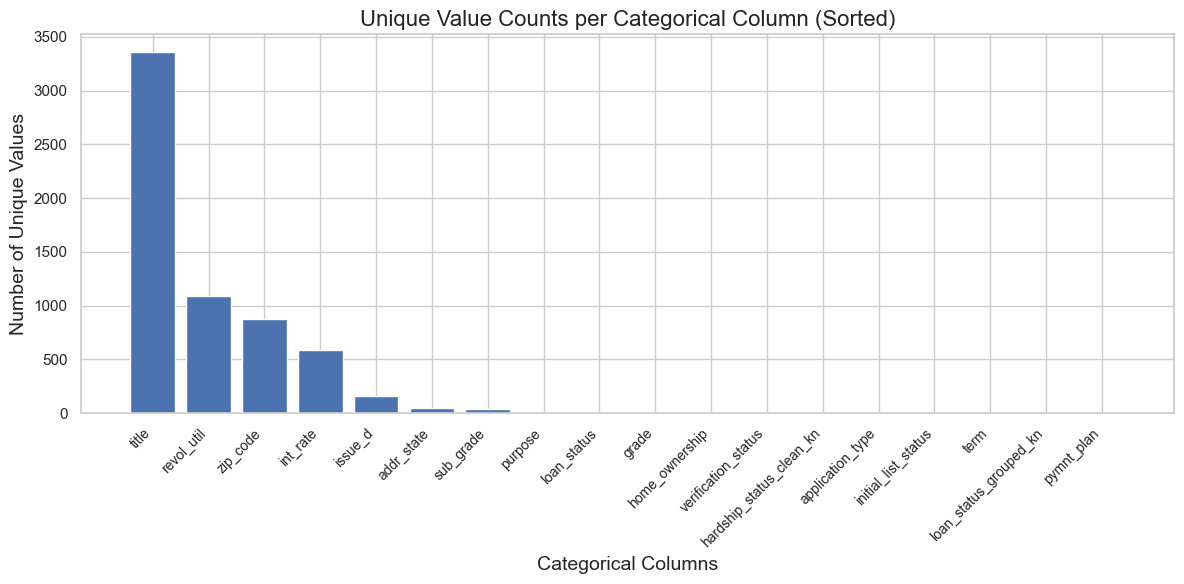

Sorted Unique Value Counts (numerical):
Number of unique values in 'total_pymnt': 87668
Number of unique values in 'total_pymnt_inv': 85958
Number of unique values in 'total_rec_int': 81587
Number of unique values in 'tot_cur_bal': 76776
Number of unique values in 'tot_hi_cred_lim': 73045
Number of unique values in 'total_bal_ex_mort': 62437
Number of unique values in 'total_il_high_credit_limit': 53149
Number of unique values in 'total_bal_il': 42622
Number of unique values in 'total_rec_prncp': 41587
Number of unique values in 'revol_bal': 36640
Number of unique values in 'avg_cur_bal': 34079
Number of unique values in 'bc_open_to_buy': 32055
Number of unique values in 'out_prncp_inv': 29873
Number of unique values in 'out_prncp': 29793
Number of unique values in 'installment': 27415
Number of unique values in 'max_bal_bc': 17217
Number of unique values in 'dti': 5100
Number of unique values in 'total_rev_hi_lim': 4060
Number of unique values in 'tot_coll_amt': 3508
Number of unique 

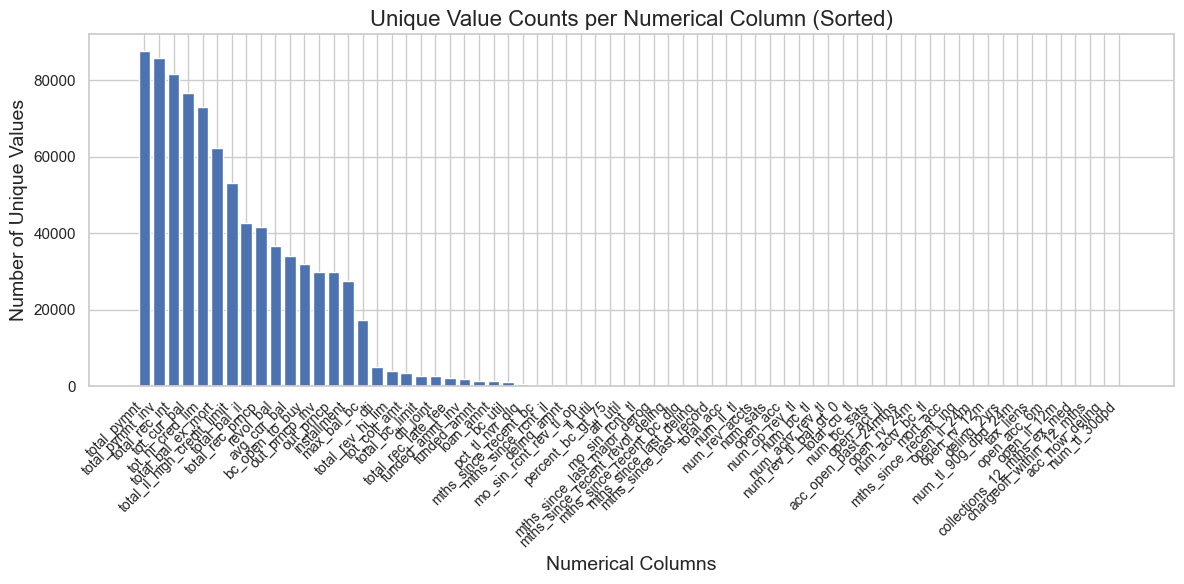

In [107]:
# Loop through each list and analyze unique values
for data_type, columns_list in [('categorical', categorical_list), ('numerical', numerical_list)]: analyze_unique_values(df, columns_list, data_type)


Summary Statistics and Analysis for Categorical Column: addr_state


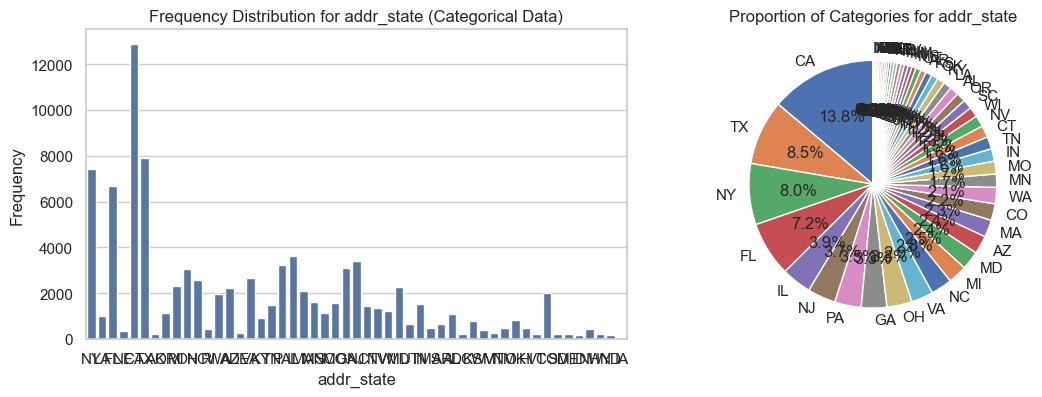


Frequency Table for 'addr_state':
            Count  Percentage
addr_state                   
CA          12874   13.835572
TX           7891    8.480387
NY           7427    7.981730
FL           6661    7.158517
IL           3634    3.905427
NJ           3420    3.675443
PA           3222    3.462654
GA           3101    3.332617
OH           3057    3.285330
VA           2675    2.874798
NC           2573    2.765180
MI           2305    2.477163
MD           2260    2.428802
AZ           2214    2.379366
MA           2100    2.256851
CO           2010    2.160129
WA           1985    2.133262
MN           1611    1.731327
MO           1563    1.679742
IN           1519    1.632456
TN           1482    1.592692
CT           1448    1.556153
NV           1368    1.470177
WI           1211    1.301451
SC           1152    1.238044
OR           1127    1.211177
AL           1094    1.175712
LA            984    1.057496
KY            918    0.986566
OK            836    0.898442
KS   

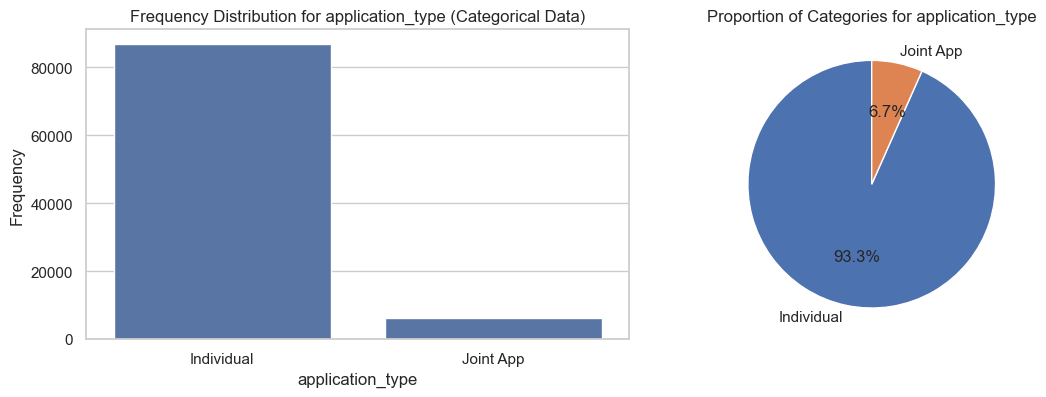


Frequency Table for 'application_type':
                  Count  Percentage
application_type                   
Individual        86858   93.345513
Joint App          6192    6.654487

Summary Statistics and Analysis for Categorical Column: grade


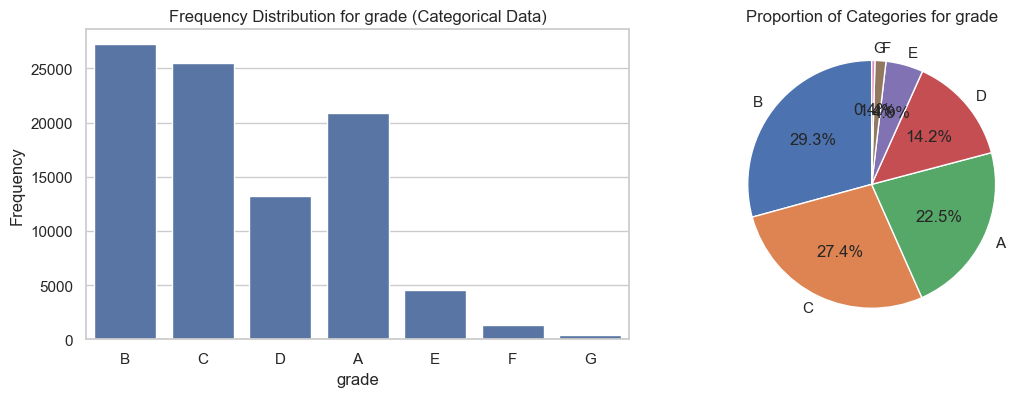


Frequency Table for 'grade':
       Count  Percentage
grade                   
B      27233   29.267061
C      25470   27.372380
A      20912   22.473939
D      13177   14.161204
E       4533    4.871574
F       1331    1.430414
G        394    0.423428

Summary Statistics and Analysis for Categorical Column: home_ownership


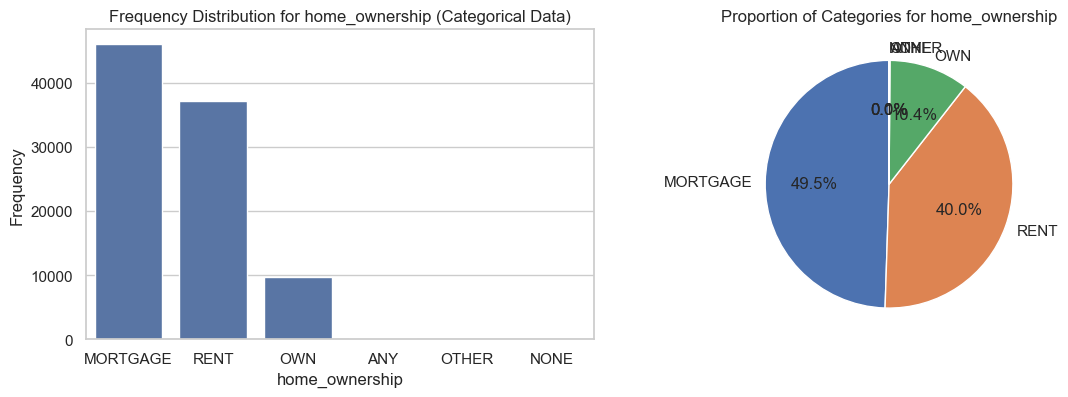


Frequency Table for 'home_ownership':
                Count  Percentage
home_ownership                   
MORTGAGE        46049   49.488447
RENT            37178   39.954863
OWN              9712   10.437399
ANY                95    0.102096
OTHER              12    0.012896
NONE                4    0.004299

Summary Statistics and Analysis for Categorical Column: initial_list_status


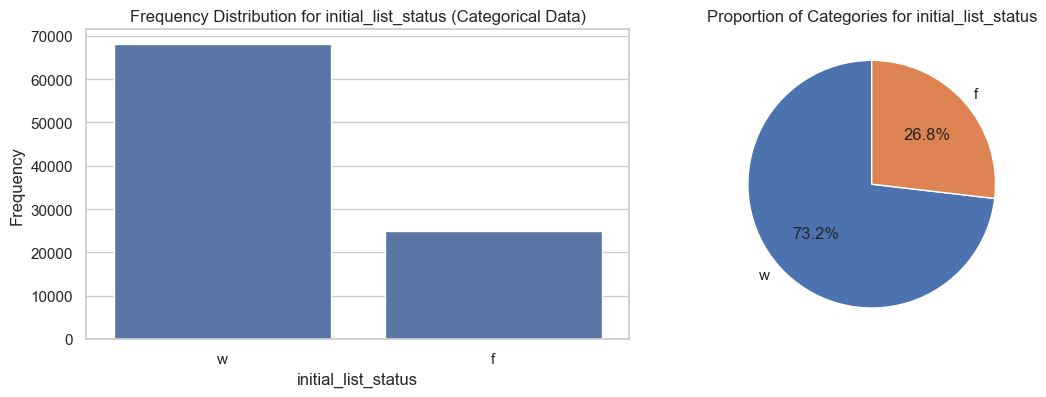


Frequency Table for 'initial_list_status':
                     Count  Percentage
initial_list_status                   
w                    68074   73.158517
f                    24976   26.841483

Summary Statistics and Analysis for Categorical Column: loan_status


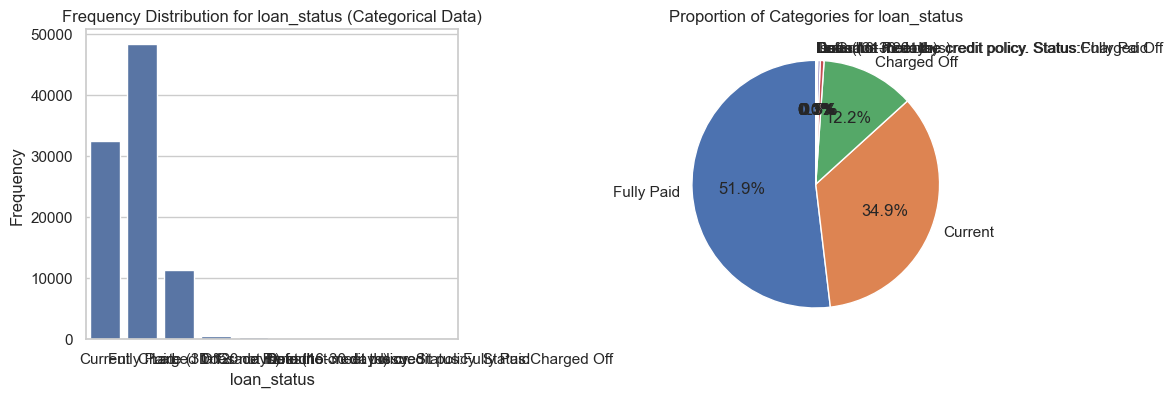


Frequency Table for 'loan_status':
                                                    Count  Percentage
loan_status                                                          
Fully Paid                                          48278   51.883933
Current                                             32428   34.850081
Charged Off                                         11344   12.191295
Late (31-120 days)                                    463    0.497582
In Grace Period                                       296    0.318109
Late (16-30 days)                                      74    0.079527
Does not meet the credit policy. Status:Fully Paid     69    0.074154
Issued                                                 56    0.060183
Does not meet the credit policy. Status:Charged...     30    0.032241
Default                                                12    0.012896

Summary Statistics and Analysis for Categorical Column: purpose


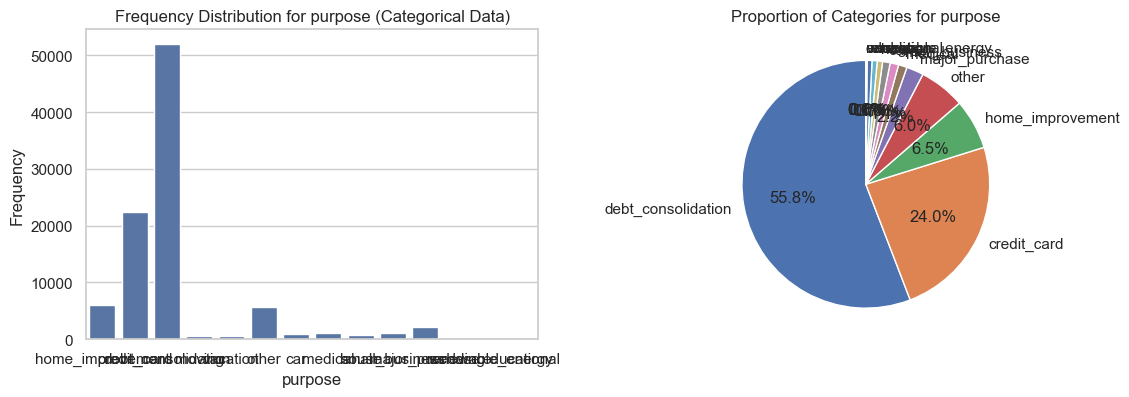


Frequency Table for 'purpose':
                    Count  Percentage
purpose                              
debt_consolidation  51952   55.832348
credit_card         22321   23.988178
home_improvement     6092    6.547018
other                5597    6.015046
major_purchase       2081    2.236432
medical              1046    1.124127
small_business       1027    1.103708
car                   918    0.986566
house                 646    0.694250
vacation              626    0.672757
moving                590    0.634068
wedding                84    0.090274
renewable_energy       54    0.058033
educational            16    0.017195

Summary Statistics and Analysis for Categorical Column: pymnt_plan


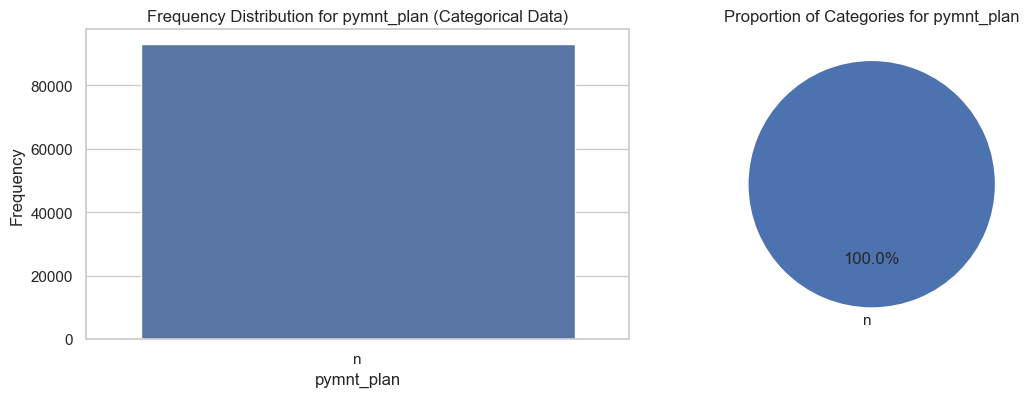


Frequency Table for 'pymnt_plan':
            Count  Percentage
pymnt_plan                   
n           93050       100.0

Summary Statistics and Analysis for Categorical Column: sub_grade


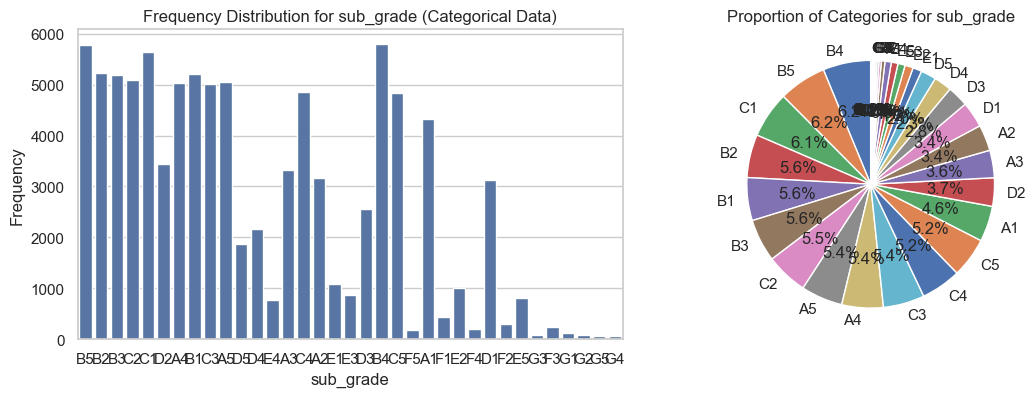


Frequency Table for 'sub_grade':
           Count  Percentage
sub_grade                   
B4          5799    6.232133
B5          5790    6.222461
C1          5637    6.058033
B2          5235    5.626008
B1          5215    5.604514
B3          5194    5.581945
C2          5103    5.484148
A5          5061    5.439011
A4          5031    5.406771
C3          5019    5.393874
C4          4863    5.226222
C5          4848    5.210102
A1          4325    4.648039
D2          3451    3.708759
A3          3331    3.579796
A2          3164    3.400322
D1          3132    3.365932
D3          2563    2.754433
D4          2167    2.328855
D5          1864    2.003224
E1          1083    1.163890
E2          1003    1.077915
E3           871    0.936056
E5           810    0.870500
E4           766    0.823213
F1           439    0.471789
F2           291    0.312735
F3           228    0.245030
F4           200    0.214938
F5           173    0.185922
G1           122    0.131112
G3       

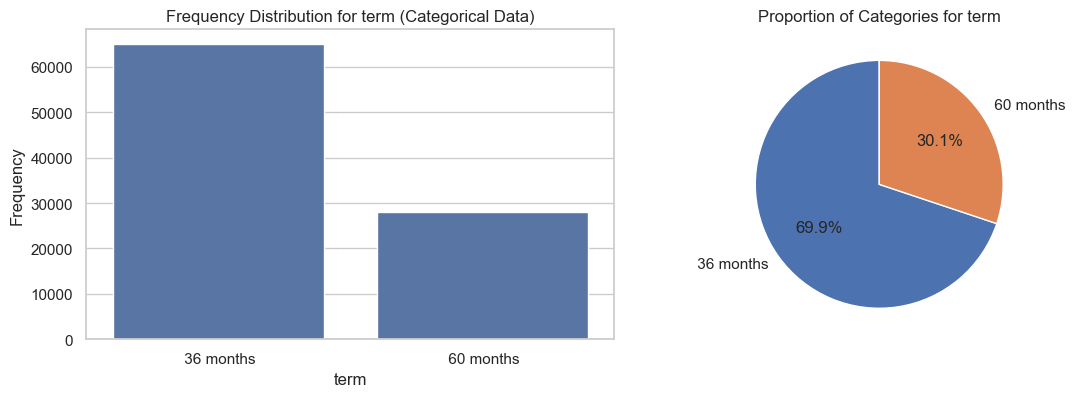


Frequency Table for 'term':
           Count  Percentage
term                        
36 months  65011   69.866738
60 months  28039   30.133262

Summary Statistics and Analysis for Categorical Column: verification_status


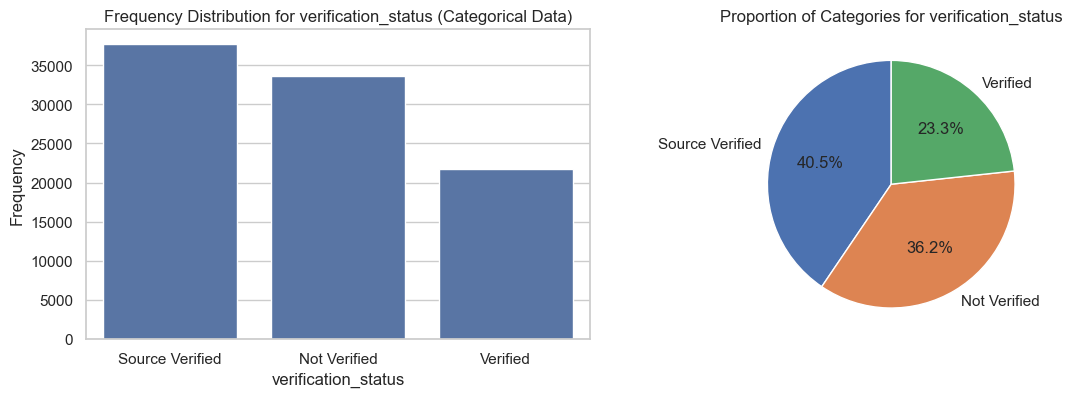


Frequency Table for 'verification_status':
                     Count  Percentage
verification_status                   
Source Verified      37701   40.516926
Not Verified         33669   36.183772
Verified             21680   23.299301

Summary Statistics and Analysis for Categorical Column: loan_status_grouped_kn


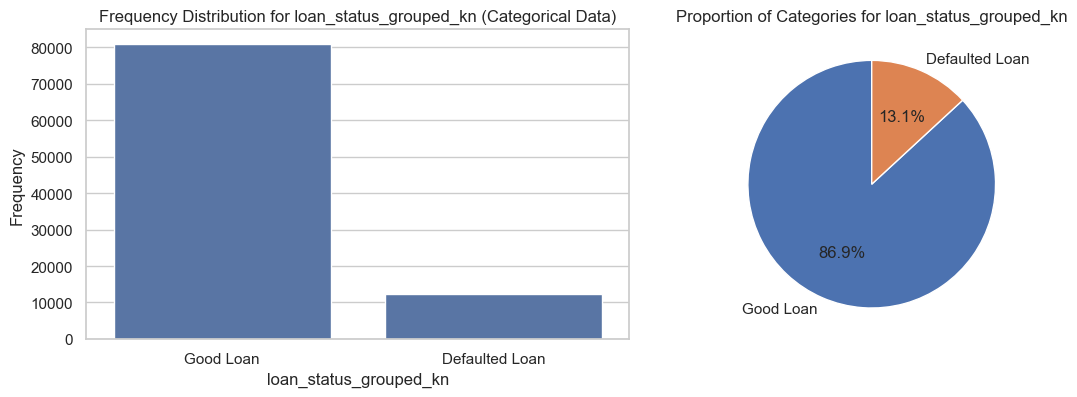


Frequency Table for 'loan_status_grouped_kn':
                        Count  Percentage
loan_status_grouped_kn                   
Good Loan               80831    86.86835
Defaulted Loan          12219    13.13165

Summary Statistics and Analysis for Categorical Column: hardship_status_clean_kn


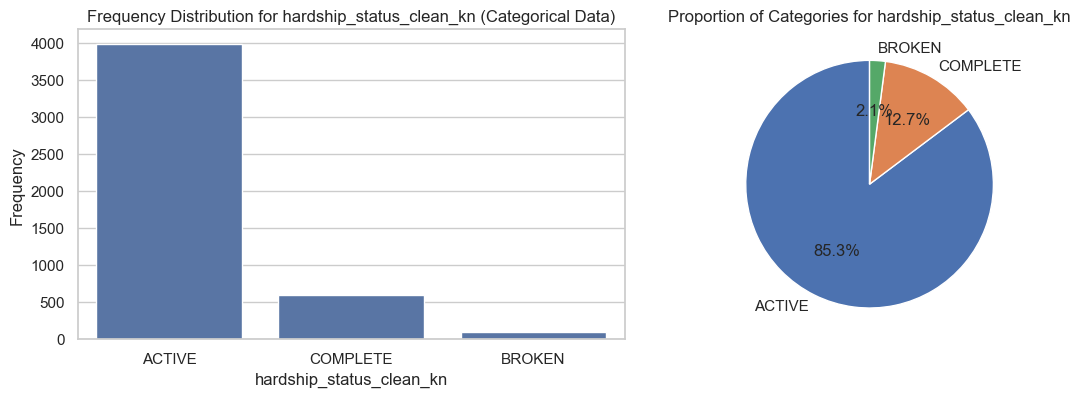


Frequency Table for 'hardship_status_clean_kn':
                          Count  Percentage
hardship_status_clean_kn                   
ACTIVE                     3983   85.270820
COMPLETE                    592   12.673946
BROKEN                       96    2.055234


In [108]:
exclude_list = ['int_rate', 'zip_code', 'emp_title', 'issue_d', 'title', 'revol_util', 'last_pymnt_d', 'earliest_cr_line', 'sec_app_earliest_cr_line', 'last_credit_pull_d']

# Filter the categorical columns to exclude specified ones
filtered_categorical_columns = [col for col in categorical_list if col not in exclude_list]

# Analyze the filtered categorical columns
analyze_categorical_columns(filtered_categorical_columns, df)

### Handling Object and Float Features

We have identified the following columns that require conversion or encoding:

#### Actions Post-Analysis

##### Convert String to Integer
- **term**: Extract numerical part and convert to integer (keep `36` and `60`).
- **emp_length**: Extract numerical years and convert to integer.

##### Convert String to Float
- **int_rate**: Convert to float after removing any non-numeric characters.
- **revol_util**: Convert to float after removing the "%" symbol.

##### Encode Categorical Values
- **sub_grade**: Use as is or encode if necessary; consider dropping **grade** if redundant.
- **loan_status**: Group or encode based on loan status levels.
- **hardship_loan_status**: Analyze and group similar hardship statuses if logical.

##### Convert to Date/Time Format
- **issue_d**: Convert to date/time for chronological analysis.
- **earliest_cr_line**: Convert to date/time to track the earliest credit history.
- **last_pymnt_d**: Convert to date/time; create separate year and month columns.
- **next_pymnt_d**: Convert to date/time; add year and month columns.
- **last_credit_pull_d**: Convert to date/time for recent credit activity insights.
- **sec_app_earliest_cr_line**: Convert to date/time for secondary applicants’ credit history.
- **hardship_start_date**: Convert to date/time; add year and month columns.
- **hardship_end_date**: Convert to date/time; add year and month columns.
- **payment_plan_start_date**: Convert to date/time; add year and month columns.

##### Remove Non-Analytical or Irrelevant Columns
- **emp_title**: Not relevant for numerical analysis; remove.
- **url**: Non-analytical; remove as it doesn’t contribute to analysis.

##### Evaluate for Categorical Consistency
- **zip_code**: Analyze the first few digits if relevant to extract location-based insights.


### Data Preparation and Cleaning

Perform thorough data cleaning on the provided dataset, including but not limited to the following steps:

* Handling missing values (imputation or removal)
* Converting data types to appropriate formats
* Removing duplicate records
* Detecting and handling outliers
* Encoding categorical variables

In [109]:
# Cross table of data types in df
dtype_crosstab = df.dtypes.value_counts().reset_index()
dtype_crosstab.columns = ['Data Type', 'Count']

# Display the cross table
dtype_crosstab

Data Type  Count
0     int32    158
1   float64     54
2    object     36
3     int64      3

### Convert Data Types
Ensure that all data types are correct and consistent.

### Converting string to integer

In [110]:
import re  # Ensure re is imported for regex operations

# Columns that need to be converted from string to integer
string_columns_to_convert_int = ['term', 'emp_length']  # features to replace with int values

# Convert each specified column to an integer in a new column
for column in string_columns_to_convert_int:
    # Extract numerical part and convert to integer
    df[f"{column}_kn"] = df[column].apply(lambda x: int(re.search(r'\d+', str(x)).group()) if pd.notnull(x) else None)

# List of columns to remove
columns_to_remove = ['term', 'emp_length']

# Remove specified columns from features if they exist
removed_columns = [col for col in features if col in columns_to_remove]
features = [col for col in features if col not in columns_to_remove]

# Add the new converted columns to features
added_columns = [f"{col}_kn" for col in string_columns_to_convert_int]
features.extend(added_columns)

# Check if the specified columns are in features
columns_to_check = added_columns
missing_columns = [col for col in columns_to_check if col not in features]

# Display results
print("Summary of Changes:")
if removed_columns:
    print(f"Removed columns from features: {removed_columns}")
else:
    print("No columns were removed.")

if added_columns:
    print(f"Added converted columns to features: {added_columns}")
else:
    print("No new columns were added.")

if not missing_columns:
    print("All converted columns are successfully included in features.")
else:
    print(f"The following columns are missing from features: {missing_columns}")


C:\Users\kiera\AppData\Local\Temp\ipykernel_30384\2248996971.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{column}_kn"] = df[column].apply(lambda x: int(re.search(r'\d+', str(x)).group()) if pd.notnull(x) else None)


Summary of Changes:
Removed columns from features: ['term']
Added converted columns to features: ['term_kn', 'emp_length_kn']
All converted columns are successfully included in features.


C:\Users\kiera\AppData\Local\Temp\ipykernel_30384\2248996971.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{column}_kn"] = df[column].apply(lambda x: int(re.search(r'\d+', str(x)).group()) if pd.notnull(x) else None)


### Convert String to Float

In [111]:
import re  # Ensure re is imported for regex operations

# Define the columns that need to be converted from string to float
string_columns_to_convert_float = ['int_rate', 'revol_util']  # features to replace with float values

# Convert each specified column to a float in a new column as a percentage (e.g., 80% becomes 0.80)
for column in string_columns_to_convert_float:
    # Extract numerical part, convert to float, and divide by 100
    df[f"{column}_kn"] = df[column].apply(
        lambda x: float(re.search(r'\d+', str(x)).group()) / 100 if pd.notnull(x) else None
    )

# List of columns to remove
columns_to_remove = ['int_rate', 'revol_util']

# Remove specified columns from features if they exist
removed_columns = [col for col in features if col in columns_to_remove]
features = [col for col in features if col not in columns_to_remove]

# Add the new converted columns to features
added_columns = [f"{col}_kn" for col in string_columns_to_convert_float]
features.extend(added_columns)

# Check if the specified columns are in features
columns_to_check = added_columns
missing_columns = [col for col in columns_to_check if col not in features]

# Display results
print("Summary of Changes:")
if removed_columns:
    print(f"Removed columns from features: {removed_columns}")
else:
    print("No columns were removed.")

if added_columns:
    print(f"Added converted columns to features: {added_columns}")
else:
    print("No new columns were added.")

if not missing_columns:
    print("All converted columns are successfully included in features.")
else:
    print(f"The following columns are missing from features: {missing_columns}")


Summary of Changes:
Removed columns from features: ['int_rate', 'revol_util']
Added converted columns to features: ['int_rate_kn', 'revol_util_kn']
All converted columns are successfully included in features.


C:\Users\kiera\AppData\Local\Temp\ipykernel_30384\1016575006.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{column}_kn"] = df[column].apply(
C:\Users\kiera\AppData\Local\Temp\ipykernel_30384\1016575006.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{column}_kn"] = df[column].apply(


### Data conversions

In [112]:
# List of date columns to convert
date_columns = ['issue_d', 'earliest_cr_line']

# Convert the columns to datetime format and extract year and month features
for col in date_columns:
    # Convert to datetime using the format '%b-%y', with errors coerced to NaT
    df[col] = pd.to_datetime(df[col], format='%b-%y', errors='coerce')
    
    # Define new column names for year and month
    year_col = f'{col}_year_kn'
    month_col = f'{col}_month_kn'
    
    # Extract year and month, handling NaNs by filling with 0
    df[year_col] = df[col].dt.year.fillna(0).astype('Int64')  # Extract year
    df[month_col] = df[col].dt.month.fillna(0).astype('Int64')  # Extract month
    
    # Add the new columns to the features list
    features.extend([year_col, month_col])
    
    # Print the names of the newly created columns
    print(f"New columns created: {year_col}, {month_col}")

# Remove original date columns from features if they exist
columns_to_remove = date_columns
features = [col for col in features if col not in columns_to_remove]

# Verify if the new columns are in features
new_columns = [f"{col}_year_kn" for col in date_columns] + [f"{col}_month_kn" for col in date_columns]
missing_columns = [col for col in new_columns if col not in features]

# Display results
print("\nSummary of Changes:")
if missing_columns:
    print(f"The following columns are missing from features: {missing_columns}")
else:
    print("All new columns are successfully included in features.")


New columns created: issue_d_year_kn, issue_d_month_kn
New columns created: earliest_cr_line_year_kn, earliest_cr_line_month_kn

Summary of Changes:
All new columns are successfully included in features.


C:\Users\kiera\AppData\Local\Temp\ipykernel_30384\3897592960.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[year_col] = df[col].dt.year.fillna(0).astype('Int64')  # Extract year
C:\Users\kiera\AppData\Local\Temp\ipykernel_30384\3897592960.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[month_col] = df[col].dt.month.fillna(0).astype('Int64')  # Extract month
C:\Users\kiera\AppData\Local\Temp\ipykernel_30384\3897592960.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

#### Creating logical groups 

- **hardship_reason**: Analyse and group to simplify analysis (import from df)

In [113]:
# Define the logical groupings for 'hardship_reason'
hardship_reason_groupings = {
    'INCOMECURT': 'Income Loss',
    'UNEMPLOYED': 'Income Loss',
    'UNEMPLOYMENT': 'Income Loss',
    'INCOME_CURTAILMENT': 'Income Loss',
    'REDCDHOURS': 'Income Loss',
    'REDUCED_HOURS': 'Income Loss',
    'FURLOUGH': 'Income Loss',
    'MEDICAL': 'Health Issues',
    'DISABILITY': 'Health Issues',
    'NATURAL_DISASTER': 'External Events',
    'NATDISAST': 'External Events',
    'FINANCIAL': 'Financial Strain',
    'EXCESSIVE_OBLIGATIONS': 'Financial Strain',
    'EXCESSOBLI': 'Financial Strain',
    'DIVORCE': 'Family Circumstances',
    'FAMILY_DEATH': 'Family Circumstances',
    'DEATH': 'Family Circumstances'
}

# Apply the grouping to the 'hardship_reason' column
df['hardship_reason_grouped_kn'] = df['hardship_reason'].replace(hardship_reason_groupings)

# Remove the original 'hardship_reason' column from features if it exists
features = [col for col in features if col != 'hardship_reason']

# Add the new grouped column to features
features.append('hardship_reason_grouped_kn')

# Verify the groupings
print("Updated counts for 'hardship_reason_grouped_kn':")
print(df['hardship_reason_grouped_kn'].value_counts())

Updated counts for 'hardship_reason_grouped_kn':
hardship_reason_grouped_kn
Income Loss             4304
Financial Strain         148
External Events          100
Health Issues             99
Family Circumstances      20
Name: count, dtype: int64


C:\Users\kiera\AppData\Local\Temp\ipykernel_30384\3153850100.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['hardship_reason_grouped_kn'] = df['hardship_reason'].replace(hardship_reason_groupings)


In [114]:
# Replace 'Any', 'Other', and 'none' with a unified value 'Other'
df['home_ownership_grouped_kn'] = df['home_ownership'].replace(['ANY', 'OTHER', 'NONE'], 'OTHER')

# Remove the original 'home_ownership' column from features if it exists
features = [col for col in features if col != 'home_ownership']

# Add the new grouped column to features
features.append('home_ownership_grouped_kn')

# Display the updated DataFrame to verify
print("Updated counts for 'home_ownership_grouped_kn':")
print(df['home_ownership_grouped_kn'].value_counts())


Updated counts for 'home_ownership_grouped_kn':
home_ownership_grouped_kn
MORTGAGE    46049
RENT        37178
OWN          9712
OTHER         111
Name: count, dtype: int64


C:\Users\kiera\AppData\Local\Temp\ipykernel_30384\3350148220.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['home_ownership_grouped_kn'] = df['home_ownership'].replace(['ANY', 'OTHER', 'NONE'], 'OTHER')


## Boolean EDA


Summary Statistics and Analysis for Boolean Column: policy_code


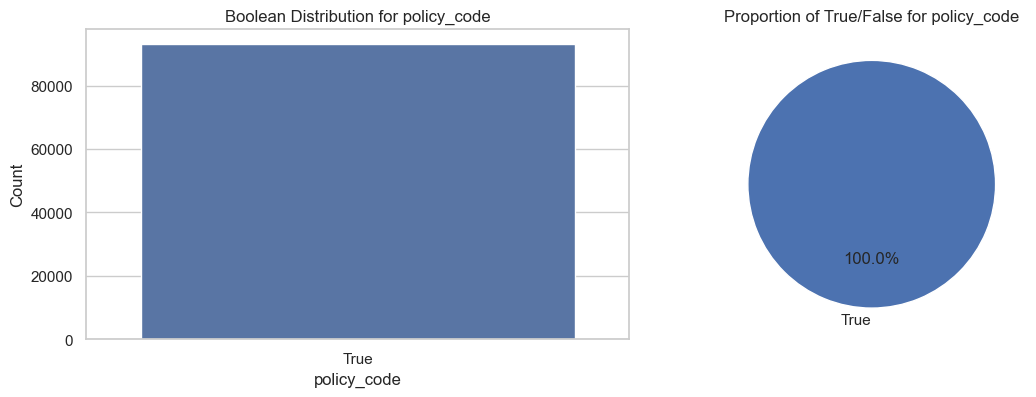


Summary for Boolean 'policy_code':
Count of True: 93050
Count of False: 0
Percentage of True: 100.00%

Summary Statistics and Analysis for Boolean Column: earliest_cr_line_missing_clean_kn


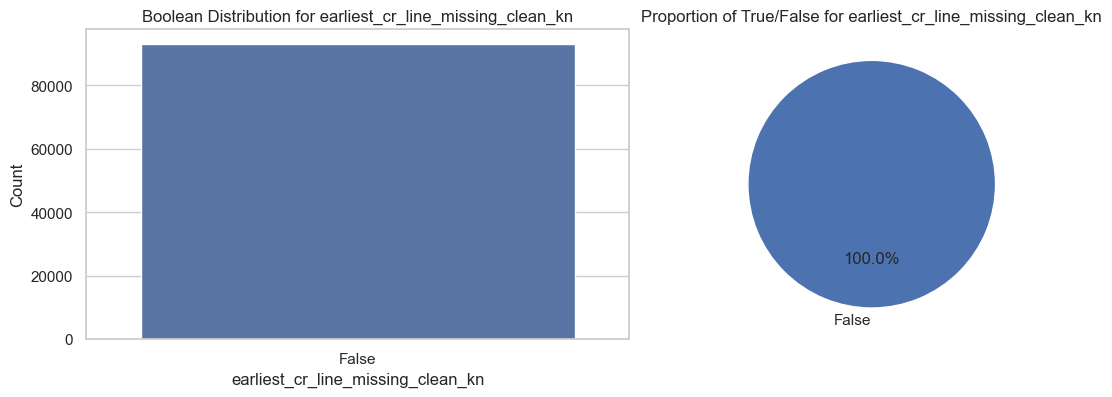


Summary for Boolean 'earliest_cr_line_missing_clean_kn':
Count of True: 0
Count of False: 93050
Percentage of True: 0.00%

Summary Statistics and Analysis for Boolean Column: fico_range_high_missing_clean_kn


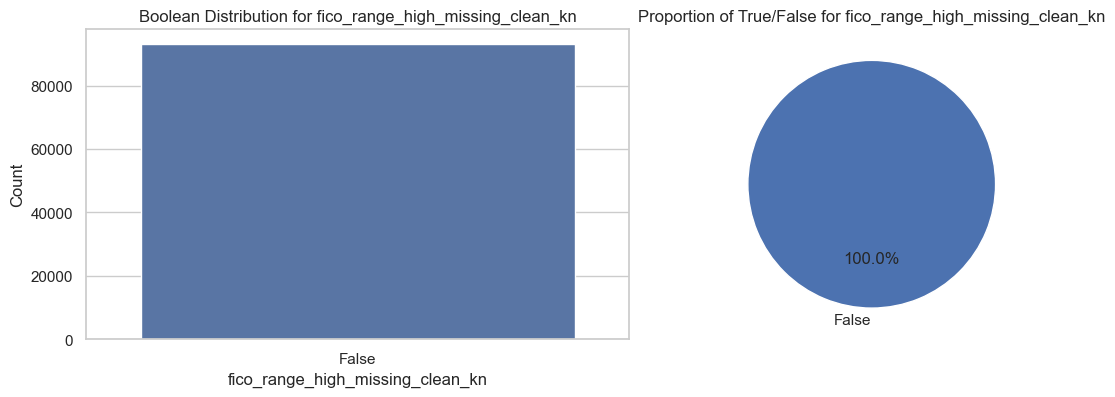


Summary for Boolean 'fico_range_high_missing_clean_kn':
Count of True: 0
Count of False: 93050
Percentage of True: 0.00%

Summary Statistics and Analysis for Boolean Column: fico_range_low_missing_clean_kn


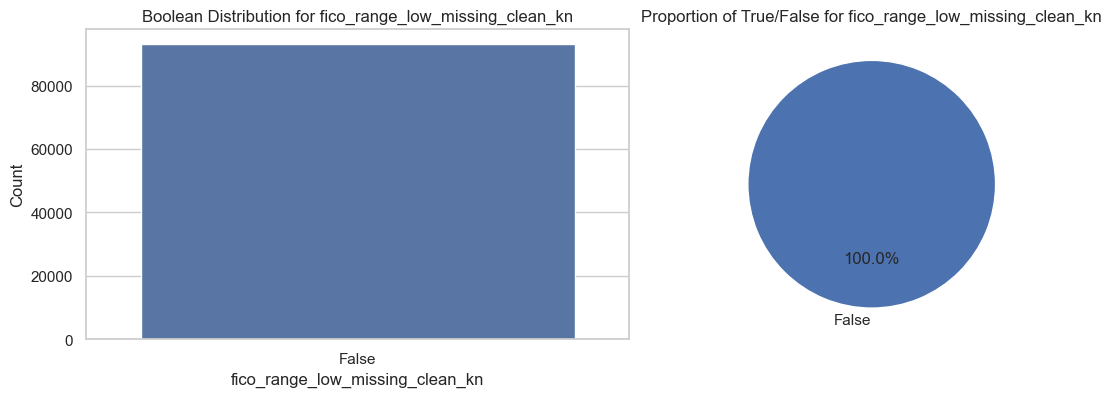


Summary for Boolean 'fico_range_low_missing_clean_kn':
Count of True: 0
Count of False: 93050
Percentage of True: 0.00%

Summary Statistics and Analysis for Boolean Column: last_fico_range_high_missing_clean_kn


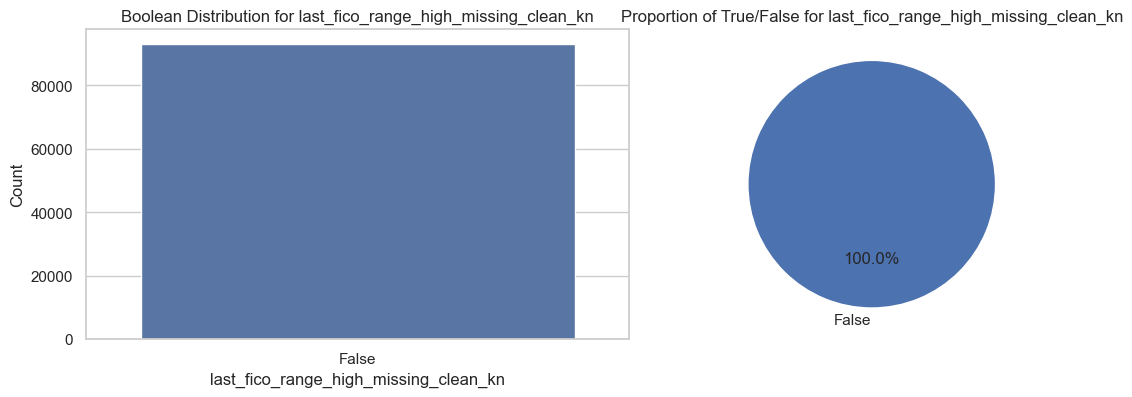


Summary for Boolean 'last_fico_range_high_missing_clean_kn':
Count of True: 0
Count of False: 93050
Percentage of True: 0.00%

Summary Statistics and Analysis for Boolean Column: last_fico_range_low_missing_clean_kn


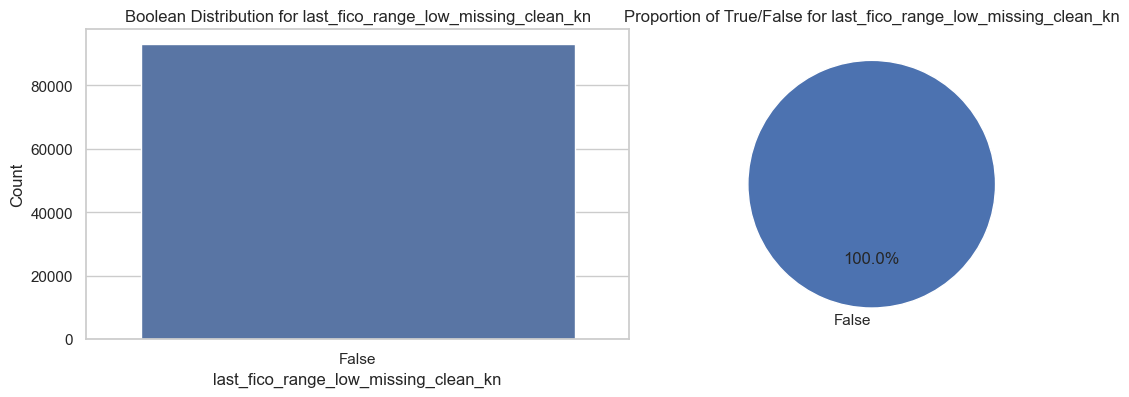


Summary for Boolean 'last_fico_range_low_missing_clean_kn':
Count of True: 0
Count of False: 93050
Percentage of True: 0.00%

Summary Statistics and Analysis for Boolean Column: mo_sin_old_il_acct_missing_clean_kn


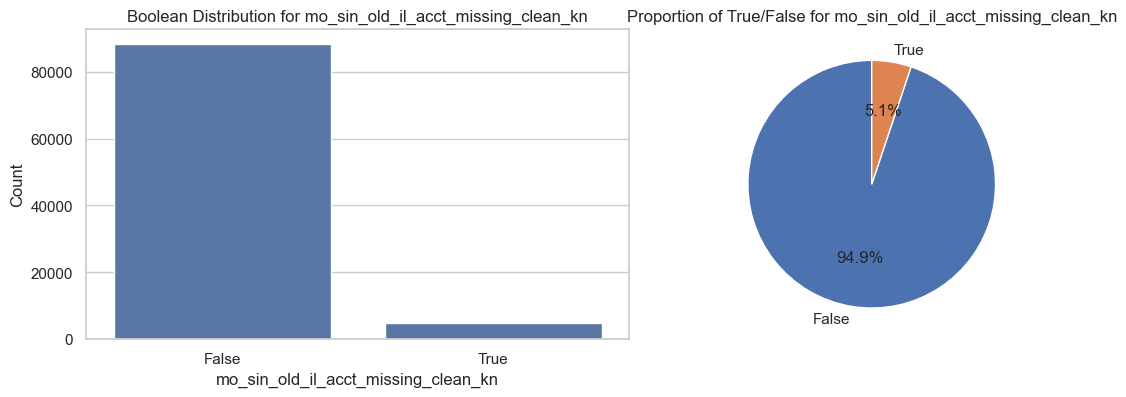


Summary for Boolean 'mo_sin_old_il_acct_missing_clean_kn':
Count of True: 4792
Count of False: 88258
Percentage of True: 5.15%

Summary Statistics and Analysis for Boolean Column: mo_sin_old_rev_tl_op_missing_clean_kn


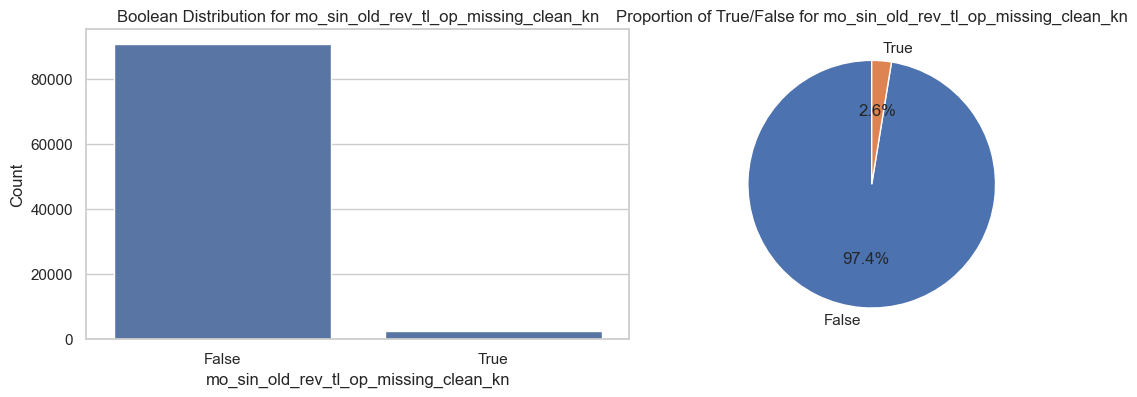


Summary for Boolean 'mo_sin_old_rev_tl_op_missing_clean_kn':
Count of True: 2380
Count of False: 90670
Percentage of True: 2.56%

Summary Statistics and Analysis for Boolean Column: num_accts_ever_120_pd_missing_clean_kn


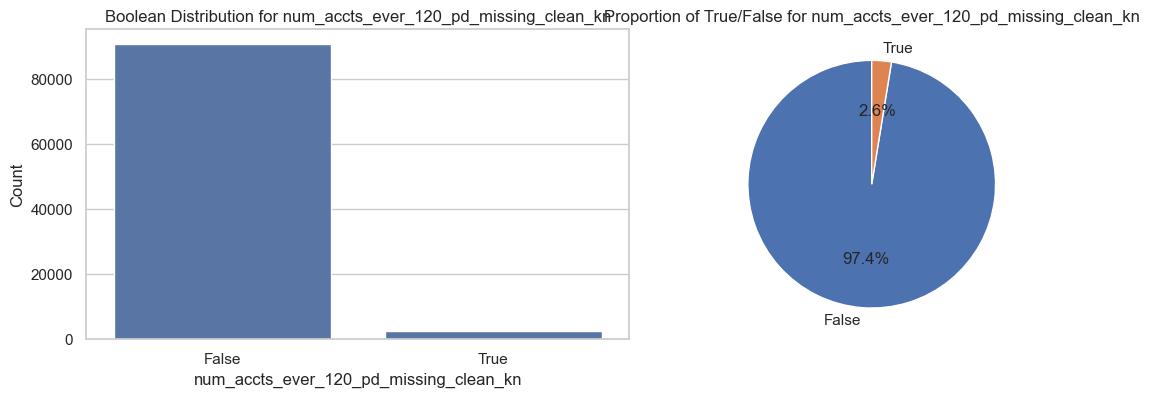


Summary for Boolean 'num_accts_ever_120_pd_missing_clean_kn':
Count of True: 2380
Count of False: 90670
Percentage of True: 2.56%

Summary Statistics and Analysis for Boolean Column: num_tl_120dpd_2m_missing_clean_kn


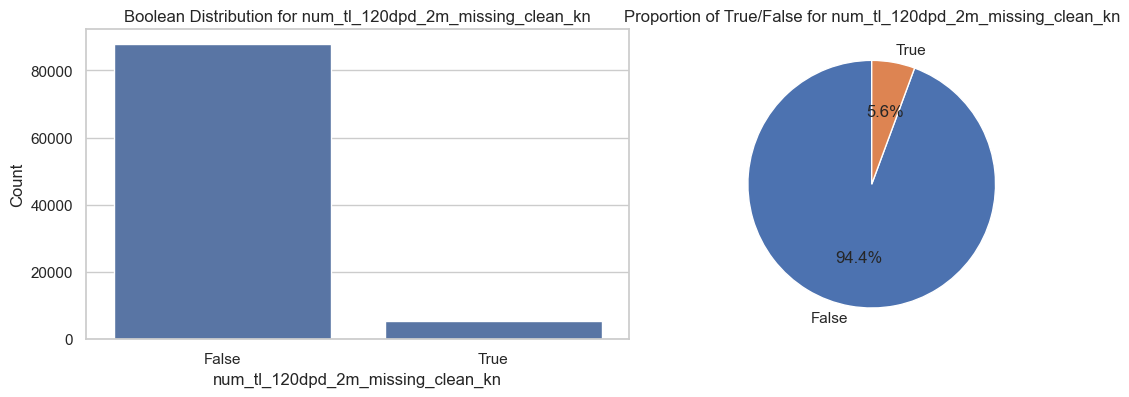


Summary for Boolean 'num_tl_120dpd_2m_missing_clean_kn':
Count of True: 5237
Count of False: 87813
Percentage of True: 5.63%

Summary Statistics and Analysis for Boolean Column: pub_rec_missing_clean_kn


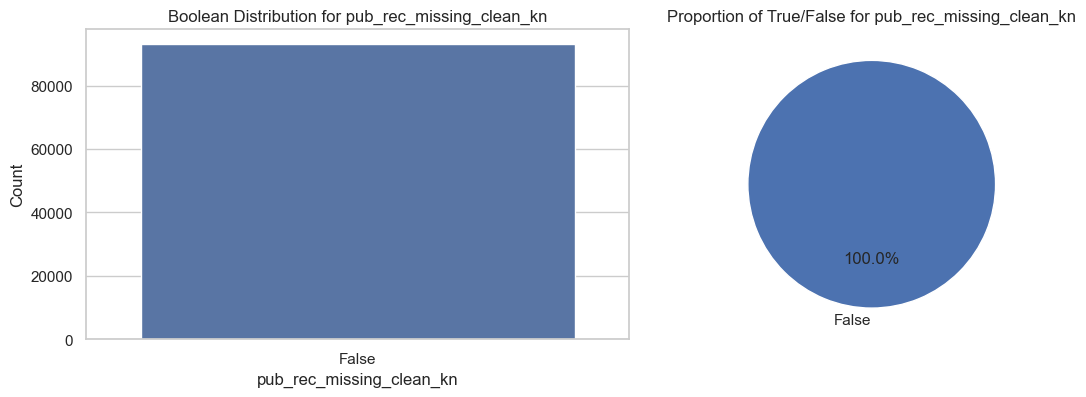


Summary for Boolean 'pub_rec_missing_clean_kn':
Count of True: 0
Count of False: 93050
Percentage of True: 0.00%

Summary Statistics and Analysis for Boolean Column: pub_rec_bankruptcies_missing_clean_kn


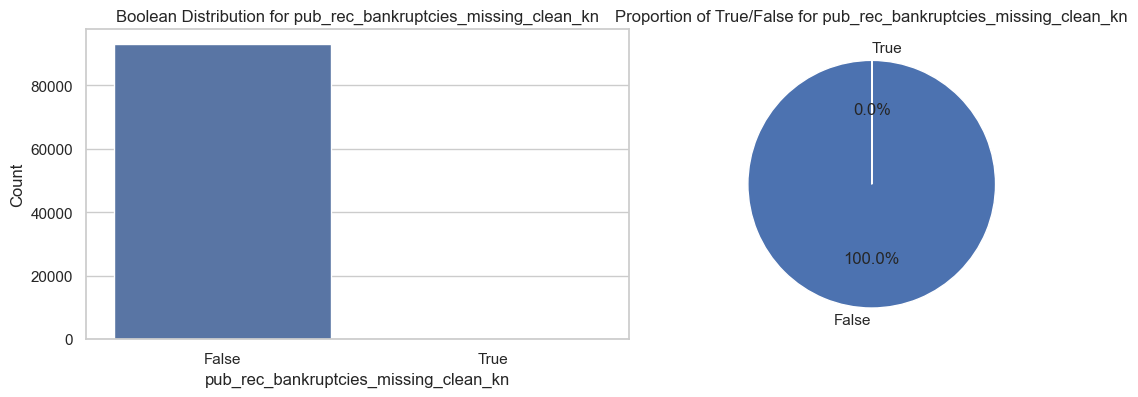


Summary for Boolean 'pub_rec_bankruptcies_missing_clean_kn':
Count of True: 45
Count of False: 93005
Percentage of True: 0.05%

Summary Statistics and Analysis for Boolean Column: emp_length_missing_clean_kn


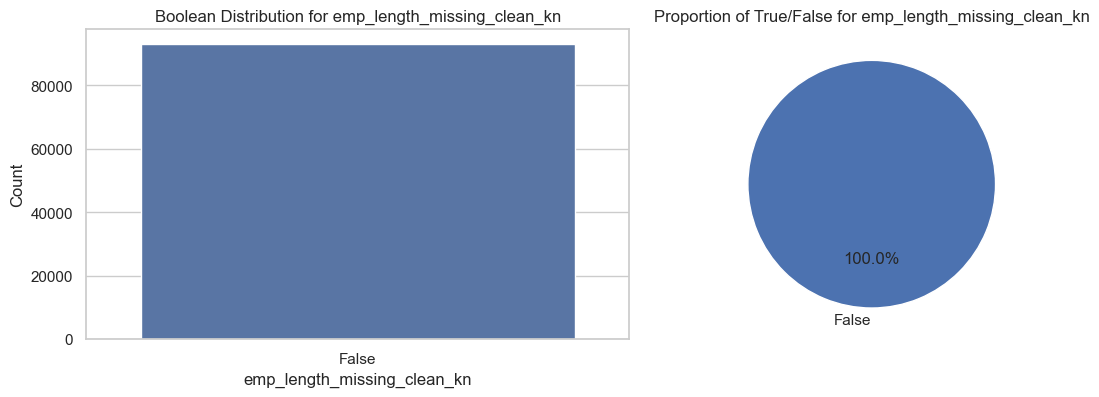


Summary for Boolean 'emp_length_missing_clean_kn':
Count of True: 0
Count of False: 93050
Percentage of True: 0.00%

Summary Statistics and Analysis for Boolean Column: emp_title_missing_clean_kn


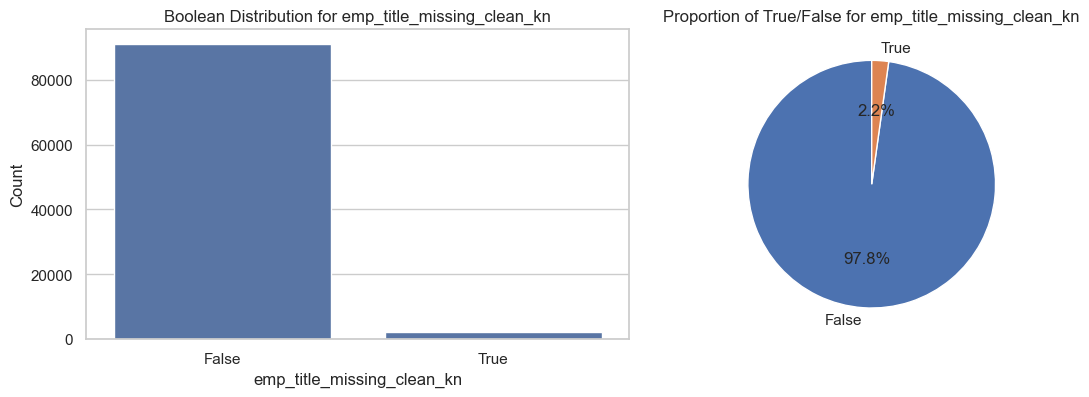


Summary for Boolean 'emp_title_missing_clean_kn':
Count of True: 2045
Count of False: 91005
Percentage of True: 2.20%

Summary Statistics and Analysis for Boolean Column: annual_inc_missing_clean_kn


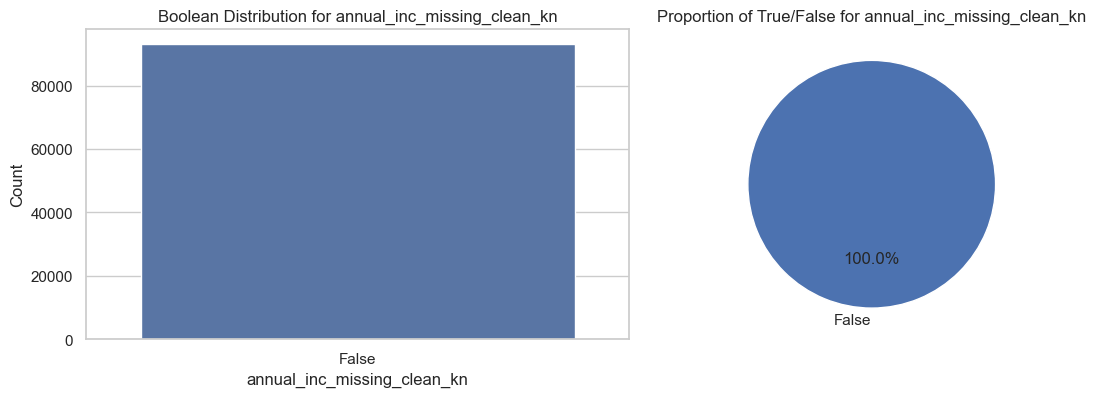


Summary for Boolean 'annual_inc_missing_clean_kn':
Count of True: 0
Count of False: 93050
Percentage of True: 0.00%

Summary Statistics and Analysis for Boolean Column: annual_inc_joint_missing_clean_kn


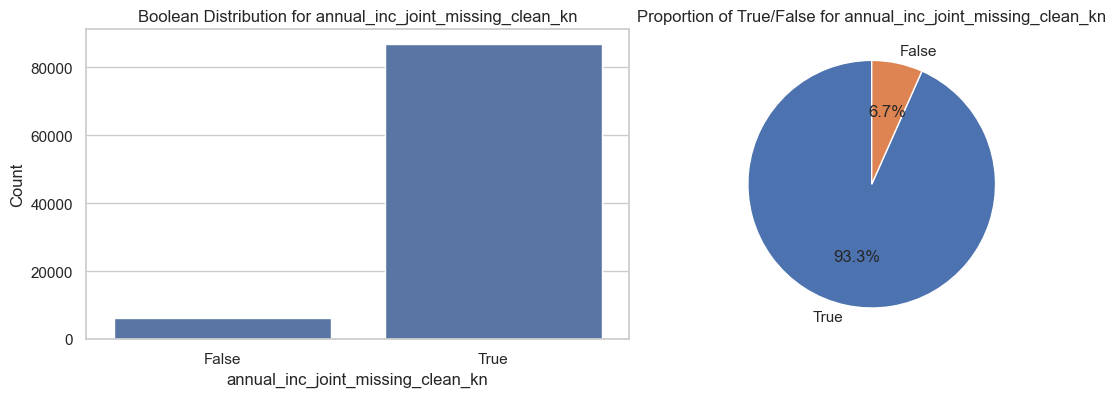


Summary for Boolean 'annual_inc_joint_missing_clean_kn':
Count of True: 86858
Count of False: 6192
Percentage of True: 93.35%

Summary Statistics and Analysis for Boolean Column: inq_fi_missing_clean_kn


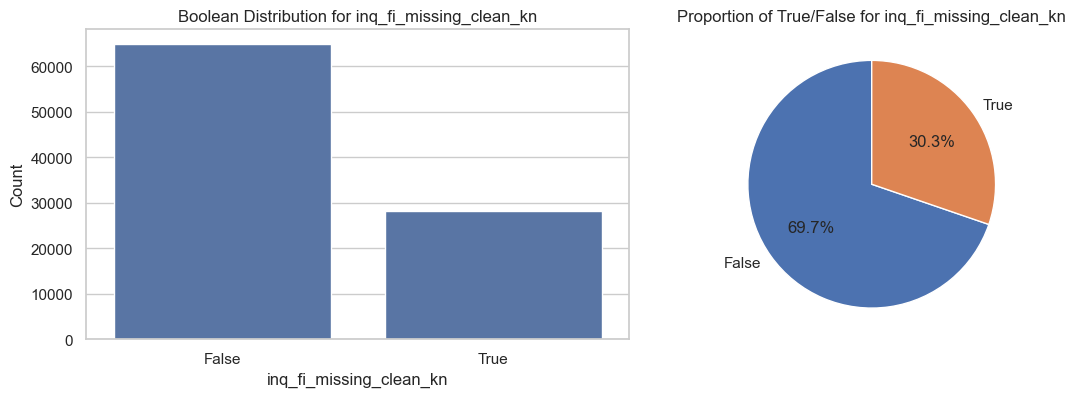


Summary for Boolean 'inq_fi_missing_clean_kn':
Count of True: 28161
Count of False: 64889
Percentage of True: 30.26%

Summary Statistics and Analysis for Boolean Column: inq_last_12m_missing_clean_kn


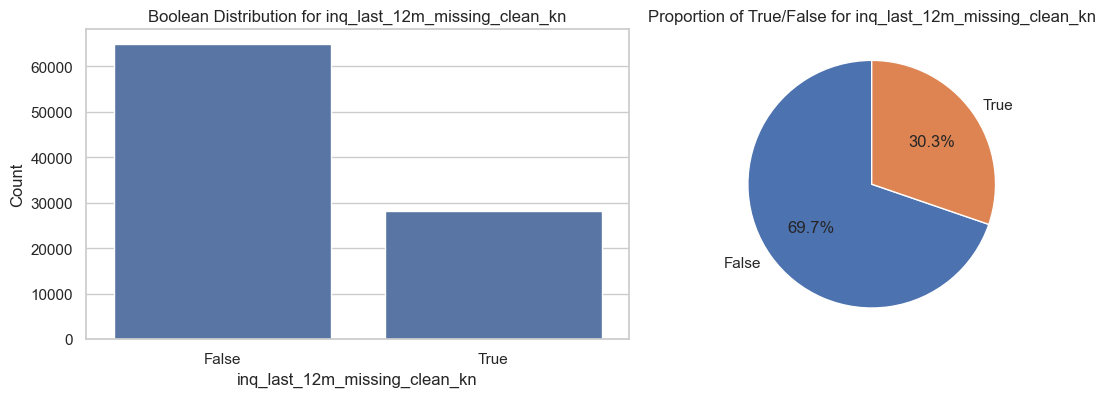


Summary for Boolean 'inq_last_12m_missing_clean_kn':
Count of True: 28161
Count of False: 64889
Percentage of True: 30.26%

Summary Statistics and Analysis for Boolean Column: inq_last_6mths_missing_clean_kn


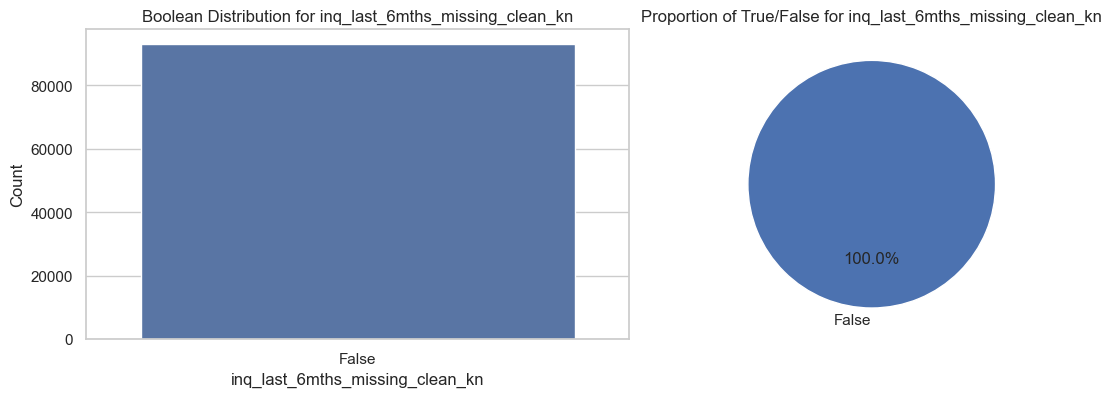


Summary for Boolean 'inq_last_6mths_missing_clean_kn':
Count of True: 0
Count of False: 93050
Percentage of True: 0.00%

Summary Statistics and Analysis for Boolean Column: num_tl_op_past_12m_missing_clean_kn


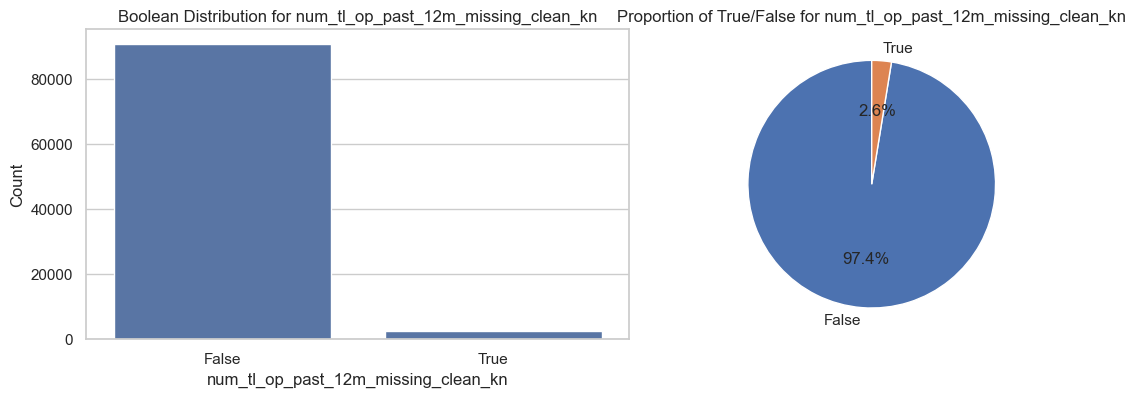


Summary for Boolean 'num_tl_op_past_12m_missing_clean_kn':
Count of True: 2380
Count of False: 90670
Percentage of True: 2.56%


In [115]:
analyze_boolean_columns(boolean_list, df)

In [116]:
# List of columns to check for missing values
columns_to_check = [
    'earliest_cr_line', 'fico_range_high', 
    'fico_range_low', 'last_fico_range_high', 
    'last_fico_range_low', 'pub_rec', 
    'pub_rec_bankruptcies', 'annual_inc', 
    'inq_last_6mths'
]

# Check for missing values in each specified column and display the count
for column in columns_to_check:
    missing_count = df[column].isnull().sum() # checking against original data if 0 we can remove these from our ML feature list
    print(f"Missing values in '{column}': {missing_count}")

Missing values in 'earliest_cr_line': 93050
Missing values in 'fico_range_high': 0
Missing values in 'fico_range_low': 0
Missing values in 'last_fico_range_high': 0
Missing values in 'last_fico_range_low': 0
Missing values in 'pub_rec': 0
Missing values in 'pub_rec_bankruptcies': 45
Missing values in 'annual_inc': 0
Missing values in 'inq_last_6mths': 0


In [117]:
# Original list of columns to remove
columns_to_remove = [
    'earliest_cr_line_missing_clean_kn', 'fico_range_high_missing_clean_kn', 
    'fico_range_low_missing_clean_kn', 'last_fico_range_high_missing_clean_kn', 
    'last_fico_range_low_missing_clean_kn', 'pub_rec_missing_clean_kn', 
    'annual_inc_missing_clean_kn', 'inq_last_6mths_missing_clean_kn'
]

# Create a new list by excluding the columns in columns_to_remove
features = [col for col in features if col not in columns_to_remove]

Let's take a look at our numerical data. We've reduced our list to analyse with a focus on the numerical features with the most varience.

Here we're trying to determine how to handle the numerical values.

**Capping**: Replace all values above the upper IQR value with the upper IQR value.

**Transformation**: Transform the data data using Test log and square root transformations.

**Removal**: Data removal being careful to ensure the total feature size still represents the overall feature set.


Summary Statistics and Analysis for Numeric Column: total_pymnt


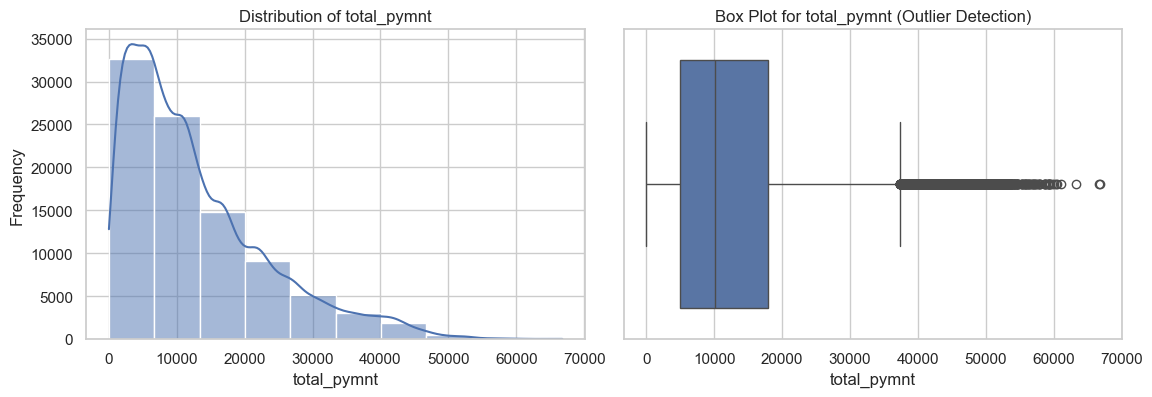


Summary Statistics for Numeric  'total_pymnt':
count    93050.000000
mean     12813.112966
std      10425.272783
min          0.000000
25%       4917.920000
50%      10075.445842
75%      17914.119999
max      66775.524270
Name: total_pymnt, dtype: float64

Interquartile Range (IQR): 12996.2000
Lower Bound for Outliers (IQR method): -14576.3800
Upper Bound for Outliers (IQR method): 37408.4200
Number of Outliers (IQR method): 3492

Z-score Summary:
count    9.305000e+04
mean     8.323392e-18
std      1.000000e+00
min     -1.229043e+00
25%     -7.573128e-01
50%     -2.625991e-01
75%      4.892924e-01
max      5.176115e+00
Name: total_pymnt, dtype: float64

Number of Outliers (Z-score method): 995

Skewness: 1.2134

Normality Tests:
D'Agostino's K^2 Test: Statistic=16716.0012, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.8910, p-value=0.0000
Anderson-Darling Test: Statistic=2889.0713

Summary Statistics and Analysis for Numeric Column: total_pymnt_inv


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 93050.
  res = hypotest_fun_out(*samples, **kwds)


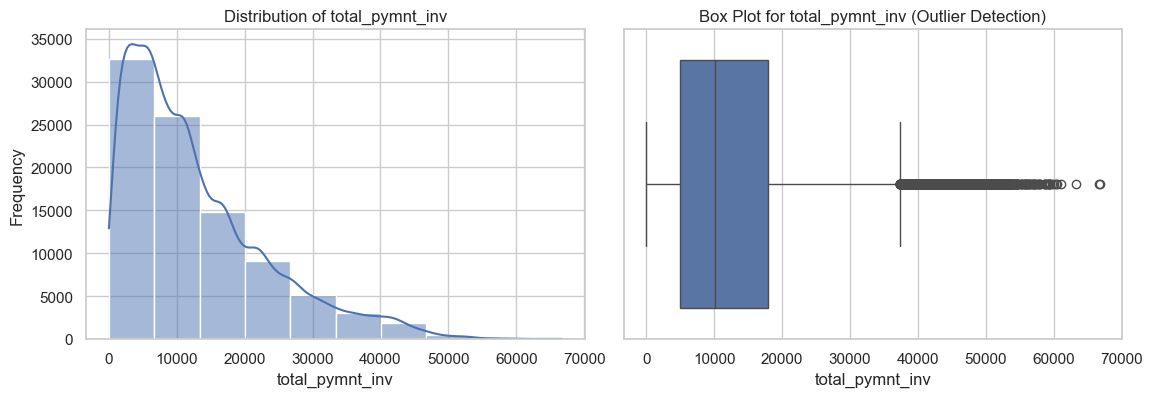


Summary Statistics for Numeric  'total_pymnt_inv':
count    93050.000000
mean     12797.377679
std      10421.800586
min          0.000000
25%       4906.232500
50%      10058.340000
75%      17891.295000
max      66775.520000
Name: total_pymnt_inv, dtype: float64

Interquartile Range (IQR): 12985.0625
Lower Bound for Outliers (IQR method): -14571.3613
Upper Bound for Outliers (IQR method): 37368.8888
Number of Outliers (IQR method): 3500

Z-score Summary:
count    9.305000e+04
mean     5.024579e-17
std      1.000000e+00
min     -1.227943e+00
25%     -7.571768e-01
50%     -2.628181e-01
75%      4.887752e-01
max      5.179349e+00
Name: total_pymnt_inv, dtype: float64

Number of Outliers (Z-score method): 999

Skewness: 1.2139

Normality Tests:
D'Agostino's K^2 Test: Statistic=16727.7552, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.8909, p-value=0.0000
Anderson-Darling Test: Statistic=2892.7410

Summary Statistics and Analysis for Numeric Column: total_rec_int


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 93050.
  res = hypotest_fun_out(*samples, **kwds)


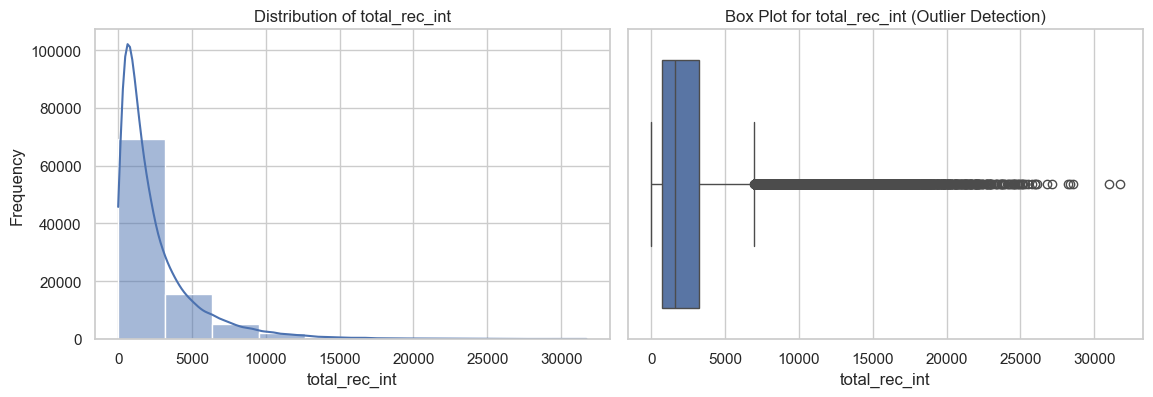


Summary Statistics for Numeric  'total_rec_int':
count    93050.000000
mean      2523.049209
std       2793.784500
min          0.000000
25%        742.042500
50%       1573.635000
75%       3240.890000
max      31714.370000
Name: total_rec_int, dtype: float64

Interquartile Range (IQR): 2498.8475
Lower Bound for Outliers (IQR method): -3006.2288
Upper Bound for Outliers (IQR method): 6989.1613
Number of Outliers (IQR method): 6732

Z-score Summary:
count    9.305000e+04
mean    -4.123515e-17
std      1.000000e+00
min     -9.030937e-01
25%     -6.374889e-01
50%     -3.398309e-01
75%      2.569421e-01
max      1.044867e+01
Name: total_rec_int, dtype: float64

Number of Outliers (Z-score method): 1990

Skewness: 2.5411

Normality Tests:
D'Agostino's K^2 Test: Statistic=50950.3488, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.7450, p-value=0.0000
Anderson-Darling Test: Statistic=6411.4077

Summary Statistics and Analysis for Numeric Column: tot_cur_bal


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 93050.
  res = hypotest_fun_out(*samples, **kwds)


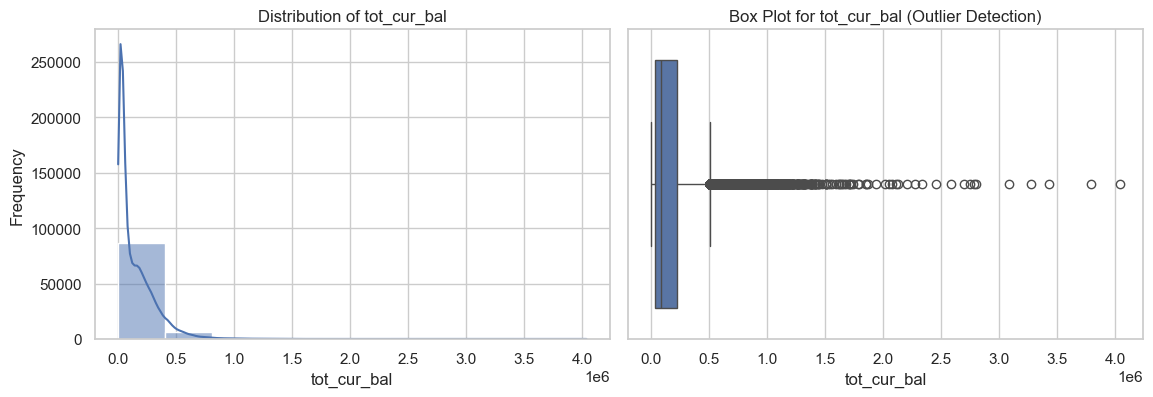


Summary Statistics for Numeric  'tot_cur_bal':
count    9.305000e+04
mean     1.459164e+05
std      1.660746e+05
min      0.000000e+00
25%      2.910175e+04
50%      7.985600e+04
75%      2.190978e+05
max      4.035706e+06
Name: tot_cur_bal, dtype: float64

Interquartile Range (IQR): 189996.0000
Lower Bound for Outliers (IQR method): -255892.2500
Upper Bound for Outliers (IQR method): 504091.7500
Number of Outliers (IQR method): 3394

Z-score Summary:
count    9.305000e+04
mean    -3.909703e-17
std      1.000000e+00
min     -8.786197e-01
25%     -7.033867e-01
50%     -3.977756e-01
75%      4.406533e-01
max      2.342194e+01
Name: tot_cur_bal, dtype: float64

Number of Outliers (Z-score method): 1357

Skewness: 2.7909

Normality Tests:
D'Agostino's K^2 Test: Statistic=62334.6218, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.7686, p-value=0.0000
Anderson-Darling Test: Statistic=5254.2252

Summary Statistics and Analysis for Numeric Column: tot_hi_cred_lim


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 93050.
  res = hypotest_fun_out(*samples, **kwds)


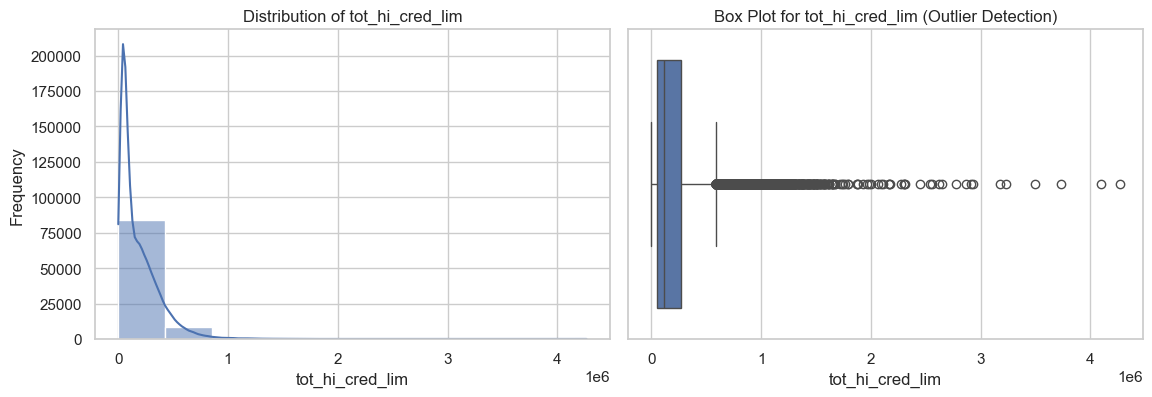


Summary Statistics for Numeric  'tot_hi_cred_lim':
count    9.305000e+04
mean     1.831823e+05
std      1.862234e+05
min      0.000000e+00
25%      5.154925e+04
50%      1.169145e+05
75%      2.665970e+05
max      4.265968e+06
Name: tot_hi_cred_lim, dtype: float64

Interquartile Range (IQR): 215047.7500
Lower Bound for Outliers (IQR method): -271022.3750
Upper Bound for Outliers (IQR method): 589168.6250
Number of Outliers (IQR method): 3268

Z-score Summary:
count    9.305000e+04
mean     1.832673e-18
std      1.000000e+00
min     -9.836697e-01
25%     -7.068557e-01
50%     -3.558511e-01
75%      4.479282e-01
max      2.192413e+01
Name: tot_hi_cred_lim, dtype: float64

Number of Outliers (Z-score method): 1344

Skewness: 2.6456

Normality Tests:
D'Agostino's K^2 Test: Statistic=59076.0140, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.7922, p-value=0.0000
Anderson-Darling Test: Statistic=4427.6032

Summary Statistics and Analysis for Numeric Column: total_bal_ex_mort


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 93050.
  res = hypotest_fun_out(*samples, **kwds)


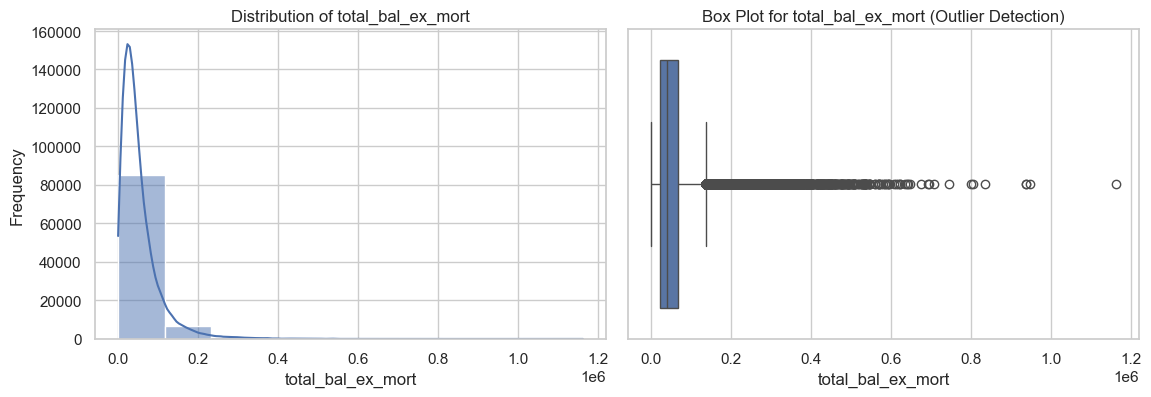


Summary Statistics for Numeric  'total_bal_ex_mort':
count    9.305000e+04
mean     5.335442e+04
std      5.252777e+04
min      0.000000e+00
25%      2.154900e+04
50%      3.950300e+04
75%      6.760150e+04
max      1.162942e+06
Name: total_bal_ex_mort, dtype: float64

Interquartile Range (IQR): 46052.5000
Lower Bound for Outliers (IQR method): -47529.7500
Upper Bound for Outliers (IQR method): 136680.2500
Number of Outliers (IQR method): 5537

Z-score Summary:
count    9.305000e+04
mean     3.997519e-17
std      1.000000e+00
min     -1.015737e+00
25%     -6.054973e-01
50%     -2.636972e-01
75%      2.712294e-01
max      2.112383e+01
Name: total_bal_ex_mort, dtype: float64

Number of Outliers (Z-score method): 1745

Skewness: 3.3594

Normality Tests:
D'Agostino's K^2 Test: Statistic=70042.7021, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.7346, p-value=0.0000
Anderson-Darling Test: Statistic=5198.0200

Summary Statistics and Analysis for Numeric Column: total_il_high_credit_limit


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 93050.
  res = hypotest_fun_out(*samples, **kwds)


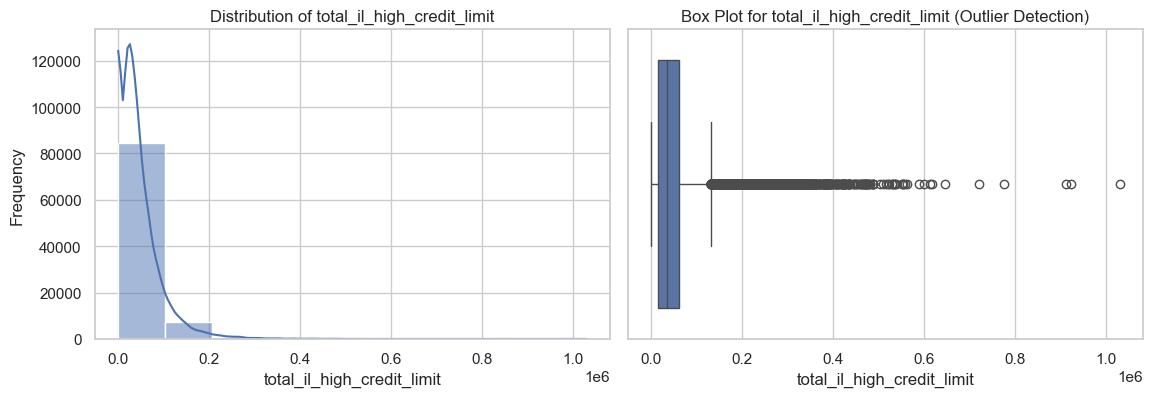


Summary Statistics for Numeric  'total_il_high_credit_limit':
count    9.305000e+04
mean     4.592567e+04
std      4.749694e+04
min      0.000000e+00
25%      1.534725e+04
50%      3.443600e+04
75%      6.194475e+04
max      1.029490e+06
Name: total_il_high_credit_limit, dtype: float64

Interquartile Range (IQR): 46597.5000
Lower Bound for Outliers (IQR method): -54549.0000
Upper Bound for Outliers (IQR method): 131841.0000
Number of Outliers (IQR method): 4703

Z-score Summary:
count    9.305000e+04
mean    -4.272420e-17
std      1.000000e+00
min     -9.669185e-01
25%     -6.437977e-01
50%     -2.419034e-01
75%      3.372655e-01
max      2.070795e+01
Name: total_il_high_credit_limit, dtype: float64

Number of Outliers (Z-score method): 1682

Skewness: 2.8422

Normality Tests:
D'Agostino's K^2 Test: Statistic=61053.5756, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.7808, p-value=0.0000
Anderson-Darling Test: Statistic=4006.9074

Summary Statistics and Analysis for Numeric Column: tot

c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 93050.
  res = hypotest_fun_out(*samples, **kwds)


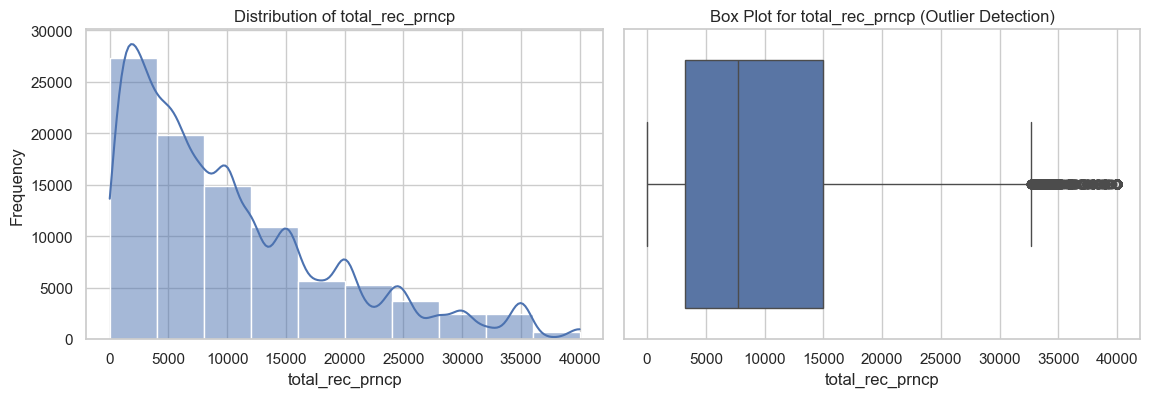


Summary Statistics for Numeric  'total_rec_prncp':
count    93050.000000
mean     10120.240489
std       8749.655564
min          0.000000
25%       3234.077500
50%       7746.495000
75%      15000.000000
max      40000.000000
Name: total_rec_prncp, dtype: float64

Interquartile Range (IQR): 11765.9225
Lower Bound for Outliers (IQR method): -14414.8063
Upper Bound for Outliers (IQR method): 32648.8838
Number of Outliers (IQR method): 2779

Z-score Summary:
count    9.305000e+04
mean     4.299146e-17
std      1.000000e+00
min     -1.156644e+00
25%     -7.870210e-01
50%     -2.712959e-01
75%      5.577088e-01
max      3.414964e+00
Name: total_rec_prncp, dtype: float64

Number of Outliers (Z-score method): 589

Skewness: 1.1937

Normality Tests:
D'Agostino's K^2 Test: Statistic=15814.7802, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.8819, p-value=0.0000
Anderson-Darling Test: Statistic=3202.2871

Summary Statistics and Analysis for Numeric Column: total_bal_il


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 93050.
  res = hypotest_fun_out(*samples, **kwds)


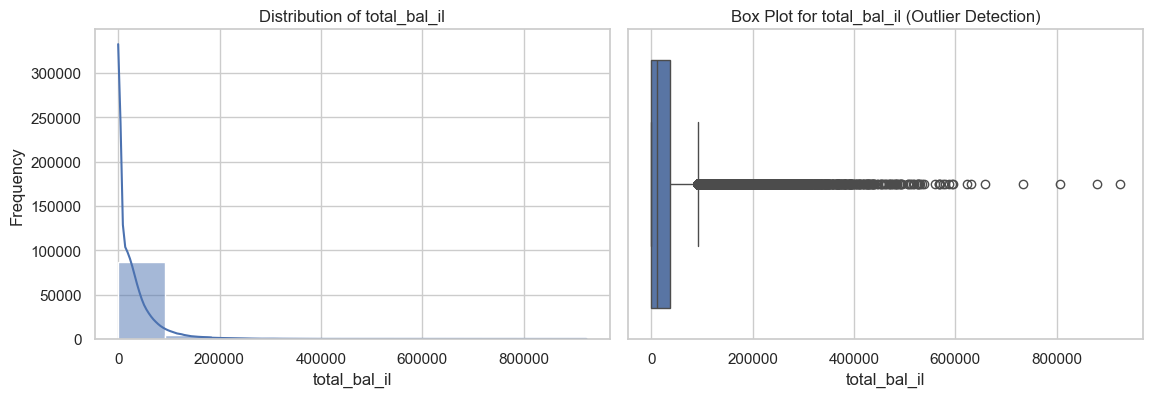


Summary Statistics for Numeric  'total_bal_il':
count     93050.000000
mean      26781.115583
std       42978.201499
min           0.000000
25%           0.000000
50%       12010.500000
75%       36617.500000
max      924163.000000
Name: total_bal_il, dtype: float64

Interquartile Range (IQR): 36617.5000
Lower Bound for Outliers (IQR method): -54926.2500
Upper Bound for Outliers (IQR method): 91543.7500
Number of Outliers (IQR method): 5851

Z-score Summary:
count    9.305000e+04
mean     2.962822e-17
std      1.000000e+00
min     -6.231325e-01
25%     -6.231325e-01
50%     -3.436769e-01
75%      2.288691e-01
max      2.087993e+01
Name: total_bal_il, dtype: float64

Number of Outliers (Z-score method): 1790

Skewness: 3.9262

Normality Tests:
D'Agostino's K^2 Test: Statistic=79200.3531, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.6325, p-value=0.0000
Anderson-Darling Test: Statistic=8632.0226

Summary Statistics and Analysis for Numeric Column: revol_bal


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 93050.
  res = hypotest_fun_out(*samples, **kwds)


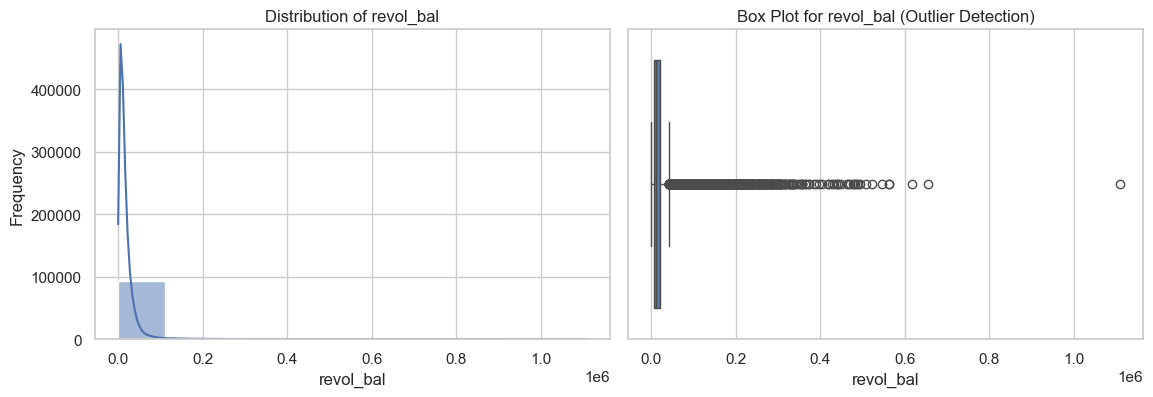


Summary Statistics for Numeric  'revol_bal':
count    9.305000e+04
mean     1.717603e+04
std      2.268340e+04
min      0.000000e+00
25%      6.114000e+03
50%      1.168500e+04
75%      2.086475e+04
max      1.107809e+06
Name: revol_bal, dtype: float64

Interquartile Range (IQR): 14750.7500
Lower Bound for Outliers (IQR method): -16012.1250
Upper Bound for Outliers (IQR method): 42990.8750
Number of Outliers (IQR method): 5721

Z-score Summary:
count    9.305000e+04
mean     2.229753e-17
std      1.000000e+00
min     -7.572068e-01
25%     -4.876706e-01
50%     -2.420725e-01
75%      1.626176e-01
max      4.808066e+01
Name: revol_bal, dtype: float64

Number of Outliers (Z-score method): 1292

Skewness: 8.2194

Normality Tests:
D'Agostino's K^2 Test: Statistic=132553.6370, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.5256, p-value=0.0000
Anderson-Darling Test: Statistic=8757.7155

Summary Statistics and Analysis for Numeric Column: avg_cur_bal


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 93050.
  res = hypotest_fun_out(*samples, **kwds)


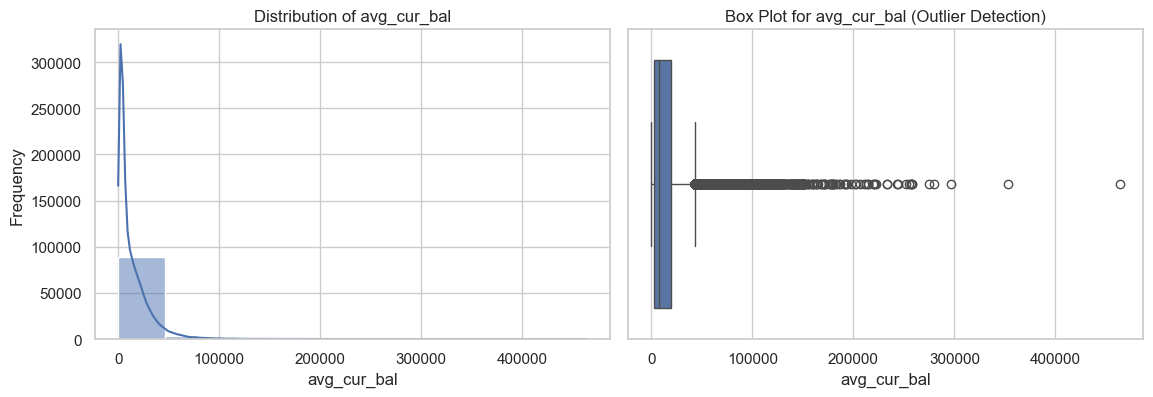


Summary Statistics for Numeric  'avg_cur_bal':
count     93050.000000
mean      13650.596980
std       16662.977032
min           0.000000
25%        3041.000000
50%        7328.000000
75%       19047.000000
max      463534.000000
Name: avg_cur_bal, dtype: float64

Interquartile Range (IQR): 16006.0000
Lower Bound for Outliers (IQR method): -20968.0000
Upper Bound for Outliers (IQR method): 43056.0000
Number of Outliers (IQR method): 5007

Z-score Summary:
count    9.305000e+04
mean    -1.252327e-17
std      1.000000e+00
min     -8.192172e-01
25%     -6.367168e-01
50%     -3.794398e-01
75%      3.238559e-01
max      2.699898e+01
Name: avg_cur_bal, dtype: float64

Number of Outliers (Z-score method): 1619

Skewness: 3.4513

Normality Tests:
D'Agostino's K^2 Test: Statistic=73177.7718, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.7089, p-value=0.0000
Anderson-Darling Test: Statistic=6544.0725

Summary Statistics and Analysis for Numeric Column: bc_open_to_buy


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 93050.
  res = hypotest_fun_out(*samples, **kwds)


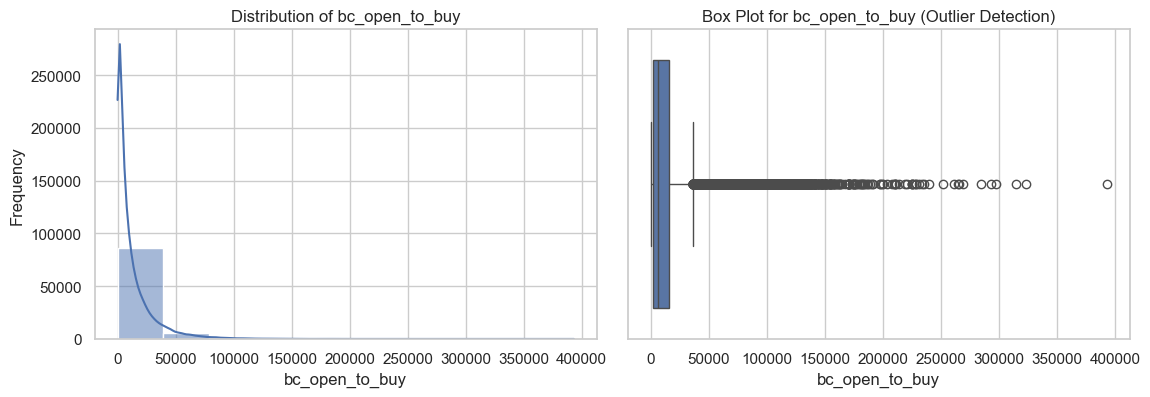


Summary Statistics for Numeric  'bc_open_to_buy':
count     93050.000000
mean      12405.510618
std       17898.572048
min           0.000000
25%        1750.000000
50%        5961.000000
75%       15730.000000
max      393250.000000
Name: bc_open_to_buy, dtype: float64

Interquartile Range (IQR): 13980.0000
Lower Bound for Outliers (IQR method): -19220.0000
Upper Bound for Outliers (IQR method): 36700.0000
Number of Outliers (IQR method): 7459

Z-score Summary:
count    9.305000e+04
mean    -1.091968e-17
std      1.000000e+00
min     -6.931006e-01
25%     -5.953274e-01
50%     -3.600572e-01
75%      1.857405e-01
max      2.127793e+01
Name: bc_open_to_buy, dtype: float64

Number of Outliers (Z-score method): 1969

Skewness: 3.6031

Normality Tests:
D'Agostino's K^2 Test: Statistic=73822.1070, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.6564, p-value=0.0000
Anderson-Darling Test: Statistic=8548.1201

Summary Statistics and Analysis for Numeric Column: out_prncp_inv


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 93050.
  res = hypotest_fun_out(*samples, **kwds)


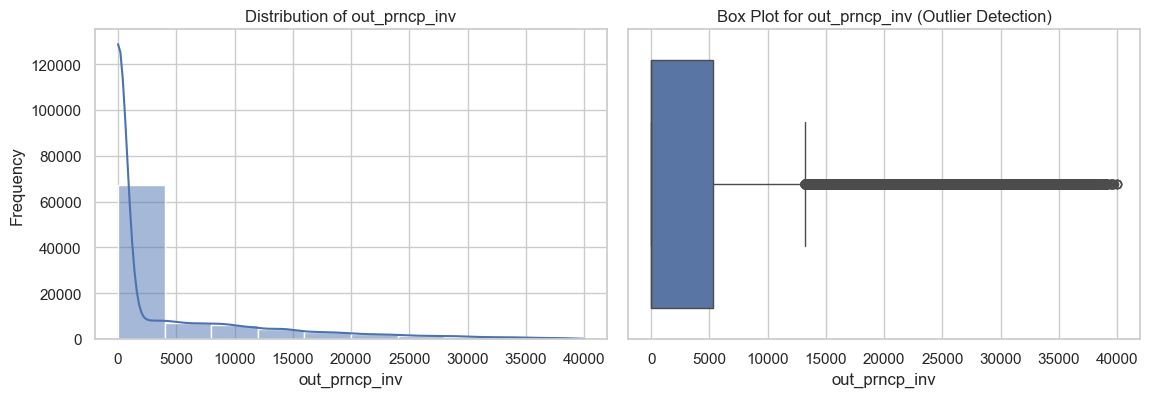


Summary Statistics for Numeric  'out_prncp_inv':
count    93050.000000
mean      4036.742925
std       7506.857826
min          0.000000
25%          0.000000
50%          0.000000
75%       5269.862500
max      40000.000000
Name: out_prncp_inv, dtype: float64

Interquartile Range (IQR): 5269.8625
Lower Bound for Outliers (IQR method): -7904.7938
Upper Bound for Outliers (IQR method): 13174.6562
Number of Outliers (IQR method): 11344

Z-score Summary:
count    9.305000e+04
mean     1.087768e-16
std      1.000000e+00
min     -5.377407e-01
25%     -5.377407e-01
50%     -5.377407e-01
75%      1.642657e-01
max      4.790720e+00
Name: out_prncp_inv, dtype: float64

Number of Outliers (Z-score method): 2495

Skewness: 2.1504

Normality Tests:
D'Agostino's K^2 Test: Statistic=38691.9554, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.6151, p-value=0.0000
Anderson-Darling Test: Statistic=14897.7469

Summary Statistics and Analysis for Numeric Column: out_prncp


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 93050.
  res = hypotest_fun_out(*samples, **kwds)


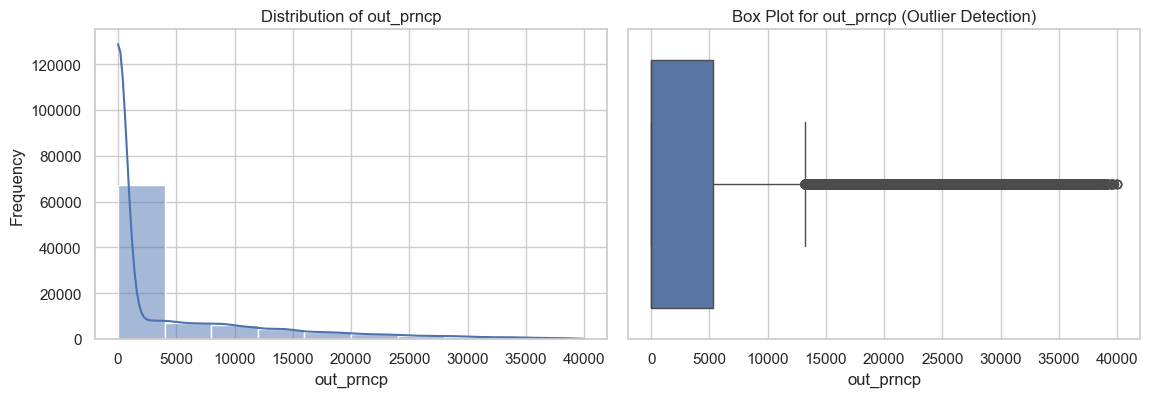


Summary Statistics for Numeric  'out_prncp':
count    93050.000000
mean      4037.320904
std       7507.413480
min          0.000000
25%          0.000000
50%          0.000000
75%       5270.437500
max      40000.000000
Name: out_prncp, dtype: float64

Interquartile Range (IQR): 5270.4375
Lower Bound for Outliers (IQR method): -7905.6562
Upper Bound for Outliers (IQR method): 13176.0938
Number of Outliers (IQR method): 11346

Z-score Summary:
count    9.305000e+04
mean    -2.634468e-17
std      1.000000e+00
min     -5.377779e-01
25%     -5.377779e-01
50%     -5.377779e-01
75%      1.642532e-01
max      4.790289e+00
Name: out_prncp, dtype: float64

Number of Outliers (Z-score method): 2496

Skewness: 2.1502

Normality Tests:
D'Agostino's K^2 Test: Statistic=38686.8371, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.6151, p-value=0.0000
Anderson-Darling Test: Statistic=14896.3216

Summary Statistics and Analysis for Numeric Column: installment


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 93050.
  res = hypotest_fun_out(*samples, **kwds)


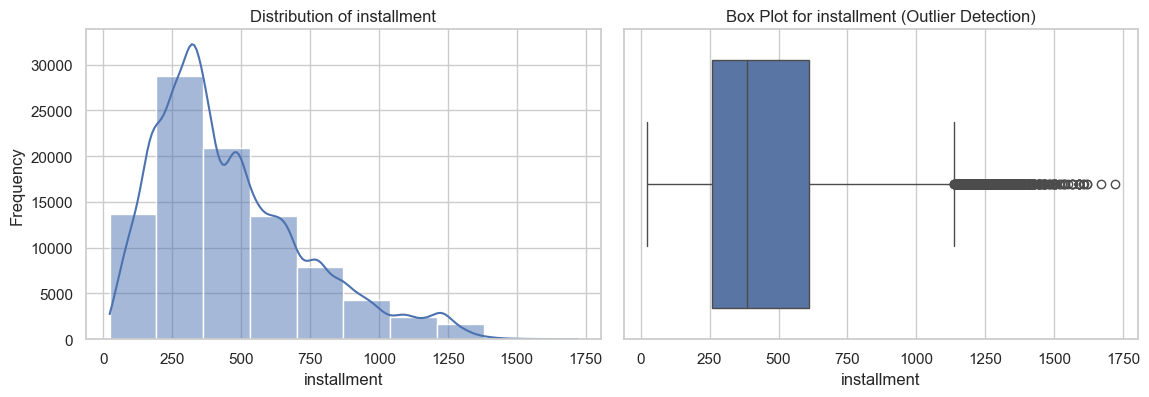


Summary Statistics for Numeric  'installment':
count    93050.000000
mean       457.478801
std        274.006032
min         22.510000
25%        258.230000
50%        387.145000
75%        610.170000
max       1719.830000
Name: installment, dtype: float64

Interquartile Range (IQR): 351.9400
Lower Bound for Outliers (IQR method): -269.6800
Upper Bound for Outliers (IQR method): 1138.0800
Number of Outliers (IQR method): 2708

Z-score Summary:
count    9.305000e+04
mean     2.714647e-17
std      1.000000e+00
min     -1.587442e+00
25%     -7.271694e-01
50%     -2.566871e-01
75%      5.572549e-01
max      4.607020e+00
Name: installment, dtype: float64

Number of Outliers (Z-score method): 616

Skewness: 0.9864

Normality Tests:
D'Agostino's K^2 Test: Statistic=11661.1727, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.9297, p-value=0.0000
Anderson-Darling Test: Statistic=1843.2761

Summary Statistics and Analysis for Numeric Column: max_bal_bc


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 93050.
  res = hypotest_fun_out(*samples, **kwds)


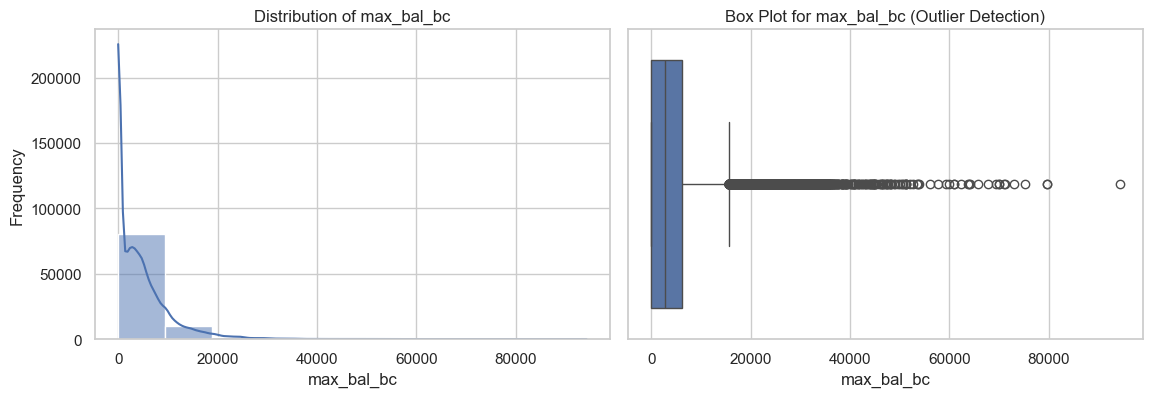


Summary Statistics for Numeric  'max_bal_bc':
count    93050.000000
mean      4263.779430
std       5441.166634
min          0.000000
25%          0.000000
50%       2714.000000
75%       6267.000000
max      94246.000000
Name: max_bal_bc, dtype: float64

Interquartile Range (IQR): 6267.0000
Lower Bound for Outliers (IQR method): -9400.5000
Upper Bound for Outliers (IQR method): 15667.5000
Number of Outliers (IQR method): 4173

Z-score Summary:
count    9.305000e+04
mean     3.588985e-18
std      1.000000e+00
min     -7.836149e-01
25%     -7.836149e-01
50%     -2.848248e-01
75%      3.681601e-01
max      1.653730e+01
Name: max_bal_bc, dtype: float64

Number of Outliers (Z-score method): 1710

Skewness: 2.4279

Normality Tests:
D'Agostino's K^2 Test: Statistic=51108.4271, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.7619, p-value=0.0000
Anderson-Darling Test: Statistic=5542.5948

Summary Statistics and Analysis for Numeric Column: annual_inc


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 93050.
  res = hypotest_fun_out(*samples, **kwds)


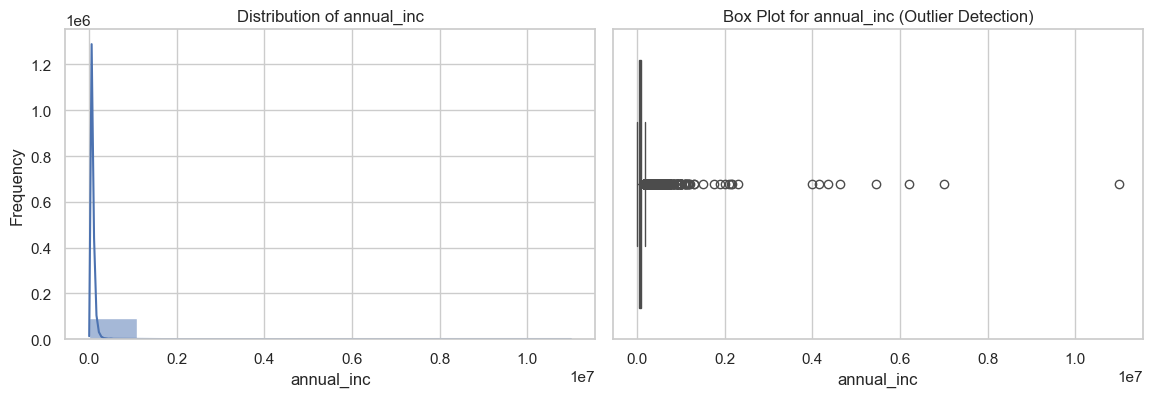


Summary Statistics for Numeric  'annual_inc':
count    9.305000e+04
mean     8.206829e+04
std      8.247255e+04
min      0.000000e+00
25%      4.999900e+04
50%      6.900000e+04
75%      9.800000e+04
max      1.099920e+07
Name: annual_inc, dtype: float64

Interquartile Range (IQR): 48001.0000
Lower Bound for Outliers (IQR method): -22002.5000
Upper Bound for Outliers (IQR method): 170001.5000
Number of Outliers (IQR method): 4787

Z-score Summary:
count    9.305000e+04
mean     2.552189e-16
std      1.000000e+00
min     -9.950983e-01
25%     -3.888481e-01
50%     -1.584563e-01
75%      1.931759e-01
max      1.323729e+02
Name: annual_inc, dtype: float64

Number of Outliers (Z-score method): 600

Skewness: 47.0301

Normality Tests:
D'Agostino's K^2 Test: Statistic=287219.0839, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.3625, p-value=0.0000
Anderson-Darling Test: Statistic=9396.7221

Summary Statistics and Analysis for Numeric Column: dti


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 93050.
  res = hypotest_fun_out(*samples, **kwds)


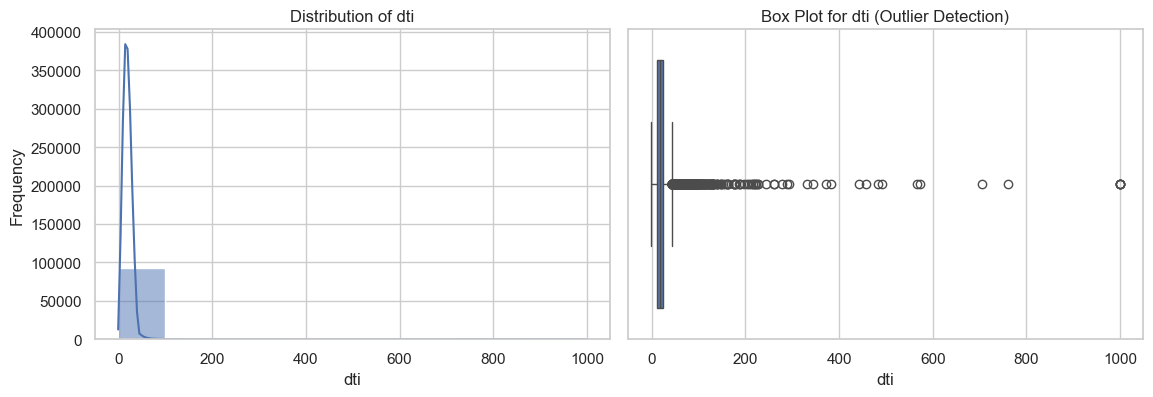


Summary Statistics for Numeric  'dti':
count    93050.000000
mean        19.018695
std         13.829245
min         -1.000000
25%         12.040000
50%         17.990000
75%         24.700000
max        999.000000
Name: dti, dtype: float64

Interquartile Range (IQR): 12.6600
Lower Bound for Outliers (IQR method): -6.9500
Upper Bound for Outliers (IQR method): 43.6900
Number of Outliers (IQR method): 1072

Z-score Summary:
count    9.305000e+04
mean    -1.406577e-16
std      1.000000e+00
min     -1.447562e+00
25%     -5.046331e-01
50%     -7.438548e-02
75%      4.108181e-01
max      7.086296e+01
Name: dti, dtype: float64

Number of Outliers (Z-score method): 370

Skewness: 27.0441

Normality Tests:
D'Agostino's K^2 Test: Statistic=232927.9641, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.5275, p-value=0.0000
Anderson-Darling Test: Statistic=3469.6988

Summary Statistics and Analysis for Numeric Column: total_rev_hi_lim


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 93050.
  res = hypotest_fun_out(*samples, **kwds)


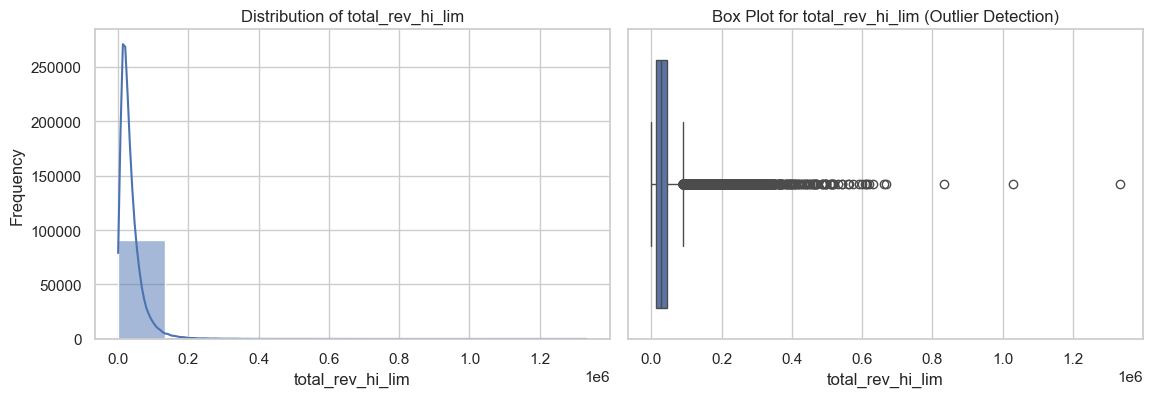


Summary Statistics for Numeric  'total_rev_hi_lim':
count    9.305000e+04
mean     3.572610e+04
std      3.601368e+04
min      0.000000e+00
25%      1.470000e+04
50%      2.630000e+04
75%      4.530000e+04
max      1.333000e+06
Name: total_rev_hi_lim, dtype: float64

Interquartile Range (IQR): 30600.0000
Lower Bound for Outliers (IQR method): -31200.0000
Upper Bound for Outliers (IQR method): 91200.0000
Number of Outliers (IQR method): 5275

Z-score Summary:
count    9.305000e+04
mean    -6.994703e-17
std      1.000000e+00
min     -9.920147e-01
25%     -5.838364e-01
50%     -2.617366e-01
75%      2.658408e-01
max      3.602170e+01
Name: total_rev_hi_lim, dtype: float64

Number of Outliers (Z-score method): 1499

Skewness: 4.7046

Normality Tests:
D'Agostino's K^2 Test: Statistic=94091.8875, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.6909, p-value=0.0000
Anderson-Darling Test: Statistic=5512.0327

Summary Statistics and Analysis for Numeric Column: tot_coll_amt


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 93050.
  res = hypotest_fun_out(*samples, **kwds)


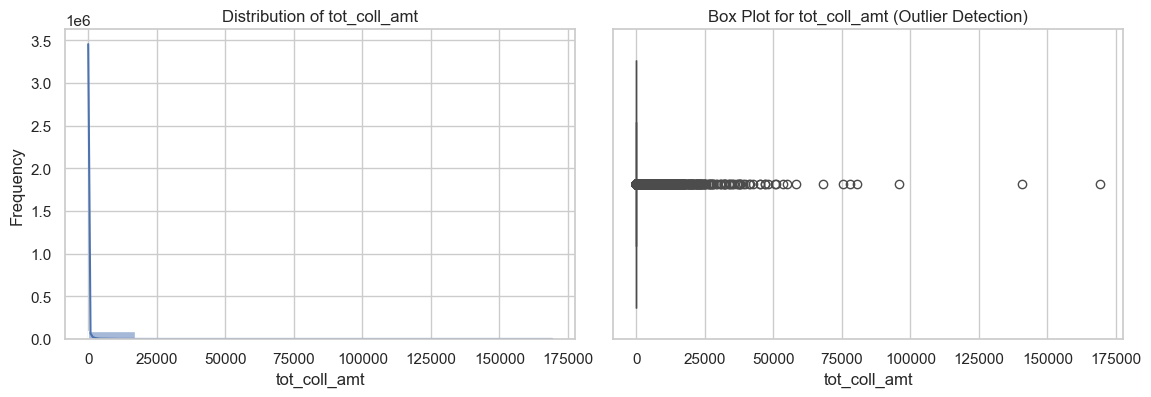


Summary Statistics for Numeric  'tot_coll_amt':
count     93050.000000
mean        200.349683
std        1611.139473
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      169257.000000
Name: tot_coll_amt, dtype: float64

Interquartile Range (IQR): 0.0000
Lower Bound for Outliers (IQR method): 0.0000
Upper Bound for Outliers (IQR method): 0.0000
Number of Outliers (IQR method): 13480

Z-score Summary:
count    9.305000e+04
mean    -4.428961e-18
std      1.000000e+00
min     -1.243528e-01
25%     -1.243528e-01
50%     -1.243528e-01
75%     -1.243528e-01
max      1.049299e+02
Name: tot_coll_amt, dtype: float64

Number of Outliers (Z-score method): 763

Skewness: 36.0347

Normality Tests:
D'Agostino's K^2 Test: Statistic=260022.1316, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.0925, p-value=0.0000
Anderson-Darling Test: Statistic=29777.5403

Summary Statistics and Analysis for Numeric Column: dti_joint


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 93050.
  res = hypotest_fun_out(*samples, **kwds)


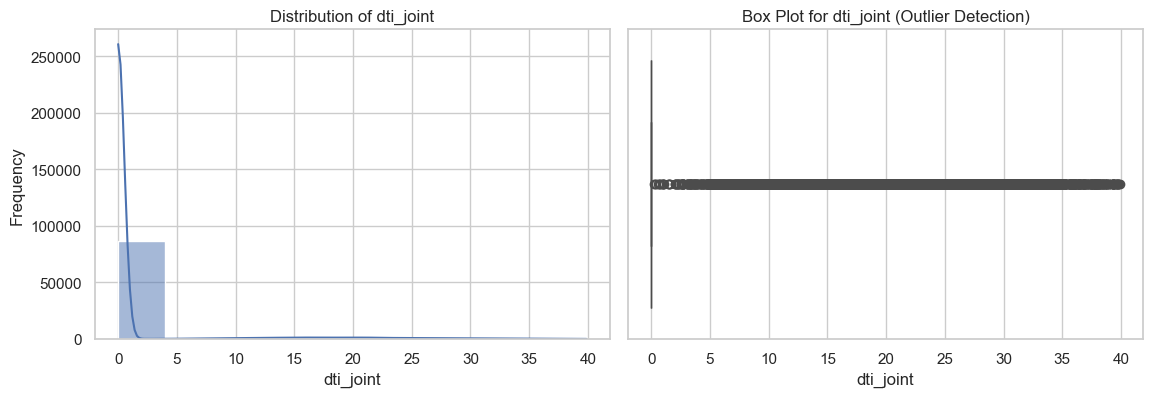


Summary Statistics for Numeric  'dti_joint':
count    93050.000000
mean         1.290135
std          5.227951
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         39.880000
Name: dti_joint, dtype: float64

Interquartile Range (IQR): 0.0000
Lower Bound for Outliers (IQR method): 0.0000
Upper Bound for Outliers (IQR method): 0.0000
Number of Outliers (IQR method): 6192

Z-score Summary:
count    9.305000e+04
mean     4.123515e-18
std      1.000000e+00
min     -2.467764e-01
25%     -2.467764e-01
50%     -2.467764e-01
75%     -2.467764e-01
max      7.381451e+00
Name: dti_joint, dtype: float64

Number of Outliers (Z-score method): 3673

Skewness: 4.3118

Normality Tests:
D'Agostino's K^2 Test: Statistic=79795.8516, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.2653, p-value=0.0000
Anderson-Darling Test: Statistic=31188.6585

Summary Statistics and Analysis for Numeric Column: total_bc_limit


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 93050.
  res = hypotest_fun_out(*samples, **kwds)


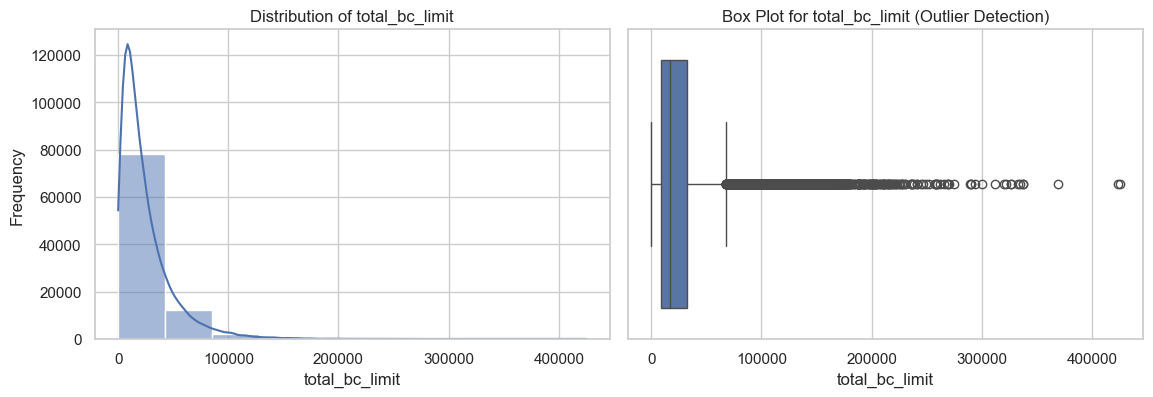


Summary Statistics for Numeric  'total_bc_limit':
count     93050.000000
mean      24598.052284
std       24555.398542
min           0.000000
25%        8600.000000
50%       17300.000000
75%       32400.000000
max      425150.000000
Name: total_bc_limit, dtype: float64

Interquartile Range (IQR): 23800.0000
Lower Bound for Outliers (IQR method): -27100.0000
Upper Bound for Outliers (IQR method): 68100.0000
Number of Outliers (IQR method): 5370

Z-score Summary:
count    9.305000e+04
mean    -5.719468e-17
std      1.000000e+00
min     -1.001737e+00
25%     -6.515086e-01
50%     -2.972076e-01
75%      3.177284e-01
max      1.631217e+01
Name: total_bc_limit, dtype: float64

Number of Outliers (Z-score method): 1795

Skewness: 2.6612

Normality Tests:
D'Agostino's K^2 Test: Statistic=56113.2340, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.7762, p-value=0.0000
Anderson-Darling Test: Statistic=4844.2906

Summary Statistics and Analysis for Numeric Column: total_rec_late_fee


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 93050.
  res = hypotest_fun_out(*samples, **kwds)


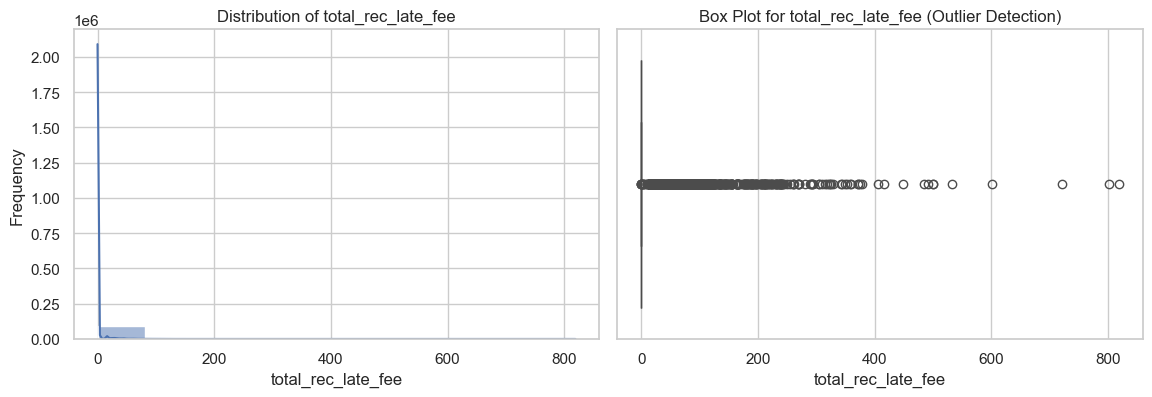


Summary Statistics for Numeric  'total_rec_late_fee':
count    93050.000000
mean         1.791005
std         13.733103
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        819.200000
Name: total_rec_late_fee, dtype: float64

Interquartile Range (IQR): 0.0000
Lower Bound for Outliers (IQR method): 0.0000
Upper Bound for Outliers (IQR method): 0.0000
Number of Outliers (IQR method): 3935

Z-score Summary:
count    9.305000e+04
mean     1.038515e-17
std      1.000000e+00
min     -1.304152e-01
25%     -1.304152e-01
50%     -1.304152e-01
75%     -1.304152e-01
max      5.952107e+01
Name: total_rec_late_fee, dtype: float64

Number of Outliers (Z-score method): 1095

Skewness: 19.7199

Normality Tests:
D'Agostino's K^2 Test: Statistic=202931.8201, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.1084, p-value=0.0000
Anderson-Darling Test: Statistic=31789.1838

Summary Statistics and Analysis for Numeric Column: annual_inc_joint


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 93050.
  res = hypotest_fun_out(*samples, **kwds)


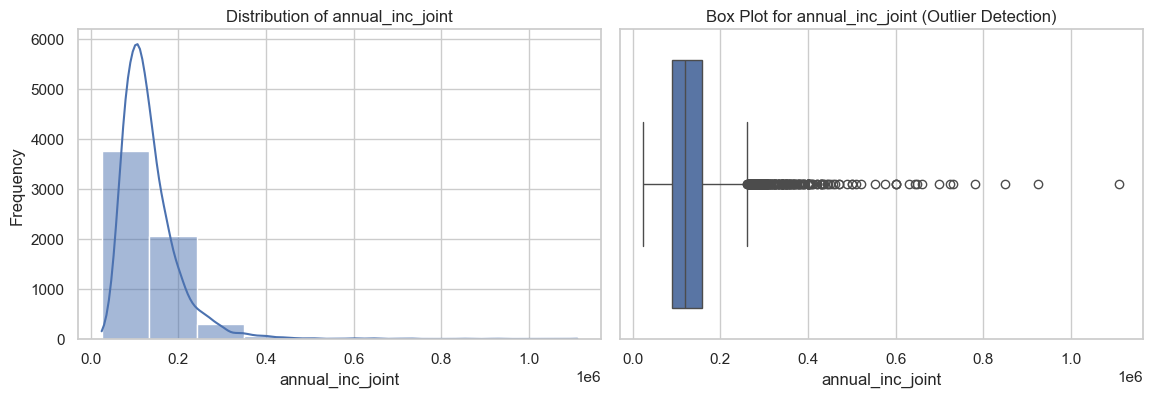


Summary Statistics for Numeric  'annual_inc_joint':
count    6.192000e+03
mean     1.337834e+05
std      6.771813e+04
min      2.500000e+04
25%      9.100000e+04
50%      1.200000e+05
75%      1.590000e+05
max      1.110000e+06
Name: annual_inc_joint, dtype: float64

Interquartile Range (IQR): 68000.0000
Lower Bound for Outliers (IQR method): -11000.0000
Upper Bound for Outliers (IQR method): 261000.0000
Number of Outliers (IQR method): 272

Z-score Summary:
count    6.192000e+03
mean    -4.016311e-16
std      1.000000e+00
min     -1.606414e+00
25%     -6.317862e-01
50%     -2.035405e-01
75%      3.723762e-01
max      1.441588e+01
Name: annual_inc_joint, dtype: float64

Number of Outliers (Z-score method): 96

Skewness: 3.0584

Normality Tests:
D'Agostino's K^2 Test: Statistic=4414.9197, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.7994, p-value=0.0000
Anderson-Darling Test: Statistic=212.5749

Summary Statistics and Analysis for Numeric Column: funded_amnt_inv


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6192.
  res = hypotest_fun_out(*samples, **kwds)


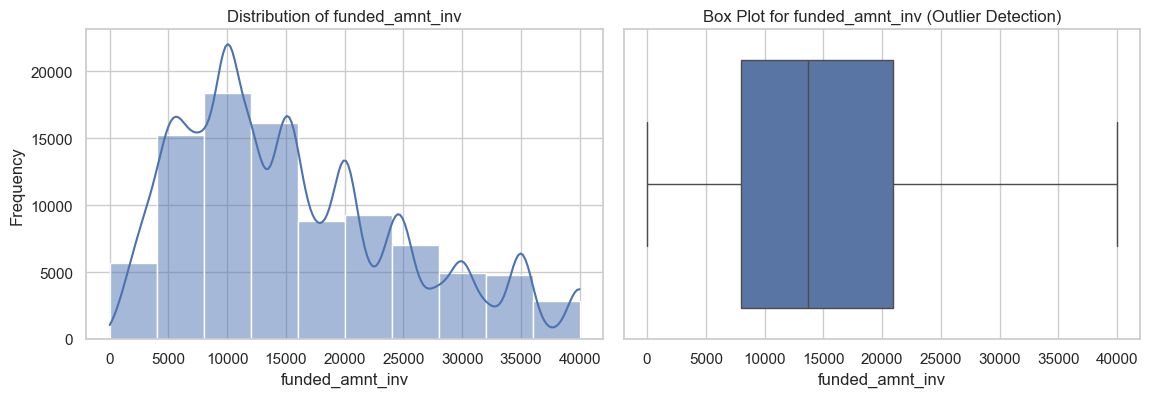


Summary Statistics for Numeric  'funded_amnt_inv':
count    93050.000000
mean     15529.122342
std       9499.752275
min          0.000000
25%       8000.000000
50%      13675.000000
75%      20900.000000
max      40000.000000
Name: funded_amnt_inv, dtype: float64

Interquartile Range (IQR): 12900.0000
Lower Bound for Outliers (IQR method): -11350.0000
Upper Bound for Outliers (IQR method): 40250.0000
Number of Outliers (IQR method): 0

Z-score Summary:
count    9.305000e+04
mean     3.913521e-18
std      1.000000e+00
min     -1.634687e+00
25%     -7.925599e-01
50%     -1.951759e-01
75%      5.653703e-01
max      2.575949e+00
Name: funded_amnt_inv, dtype: float64

Number of Outliers (Z-score method): 0

Skewness: 0.7651

Normality Tests:
D'Agostino's K^2 Test: Statistic=7368.1862, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.9361, p-value=0.0000
Anderson-Darling Test: Statistic=1746.5979

Summary Statistics and Analysis for Numeric Column: funded_amnt


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 93050.
  res = hypotest_fun_out(*samples, **kwds)


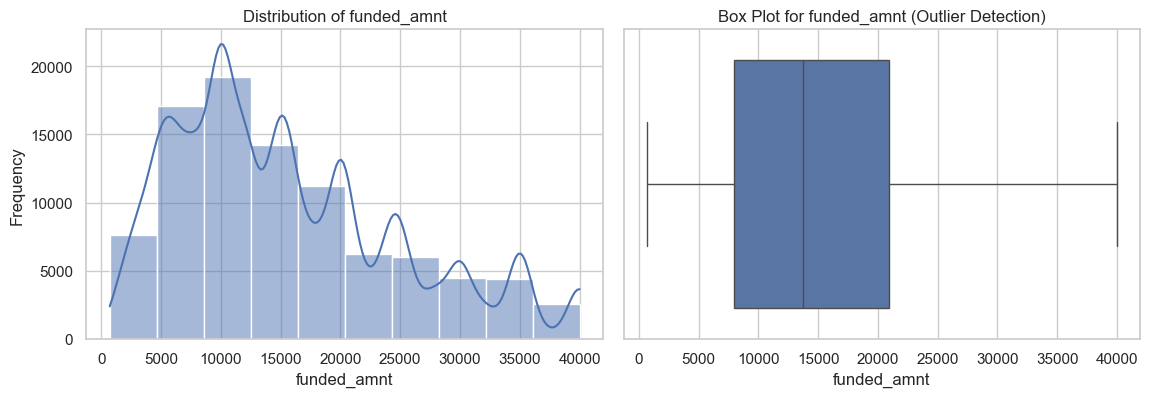


Summary Statistics for Numeric  'funded_amnt':
count    93050.000000
mean     15544.827781
std       9495.670703
min        700.000000
25%       8000.000000
50%      13750.000000
75%      20950.000000
max      40000.000000
Name: funded_amnt, dtype: float64

Interquartile Range (IQR): 12950.0000
Lower Bound for Outliers (IQR method): -11425.0000
Upper Bound for Outliers (IQR method): 40375.0000
Number of Outliers (IQR method): 0

Z-score Summary:
count    9.305000e+04
mean    -3.420990e-17
std      1.000000e+00
min     -1.563326e+00
25%     -7.945545e-01
50%     -1.890154e-01
75%      5.692249e-01
max      2.575402e+00
Name: funded_amnt, dtype: float64

Number of Outliers (Z-score method): 0

Skewness: 0.7656

Normality Tests:
D'Agostino's K^2 Test: Statistic=7376.4780, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.9358, p-value=0.0000
Anderson-Darling Test: Statistic=1752.3501

Summary Statistics and Analysis for Numeric Column: loan_amnt


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 93050.
  res = hypotest_fun_out(*samples, **kwds)


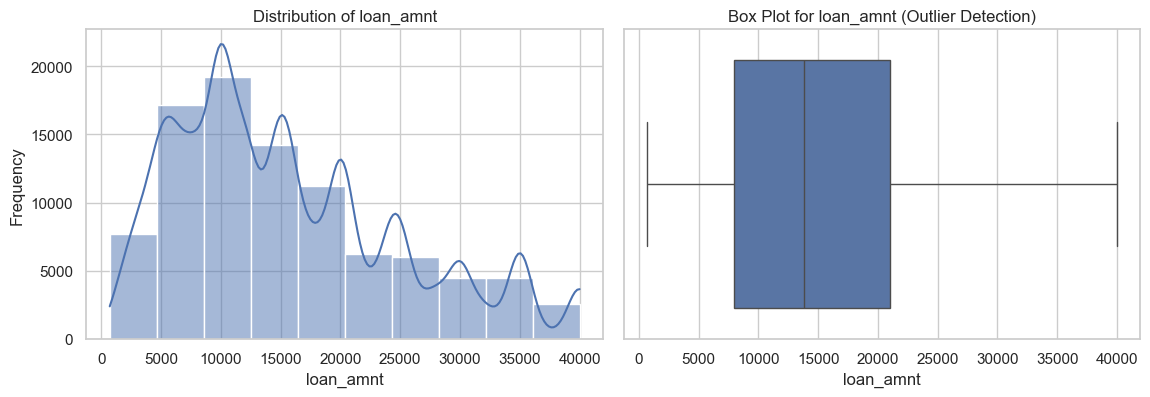


Summary Statistics for Numeric  'loan_amnt':
count    93050.000000
mean     15549.261956
std       9496.430341
min        700.000000
25%       8000.000000
50%      13800.000000
75%      20975.000000
max      40000.000000
Name: loan_amnt, dtype: float64

Interquartile Range (IQR): 12975.0000
Lower Bound for Outliers (IQR method): -11462.5000
Upper Bound for Outliers (IQR method): 40437.5000
Number of Outliers (IQR method): 0

Z-score Summary:
count    9.305000e+04
mean     7.403237e-17
std      1.000000e+00
min     -1.563668e+00
25%     -7.949579e-01
50%     -1.842021e-01
75%      5.713450e-01
max      2.574729e+00
Name: loan_amnt, dtype: float64

Number of Outliers (Z-score method): 0

Skewness: 0.7648

Normality Tests:
D'Agostino's K^2 Test: Statistic=7366.7836, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.9359, p-value=0.0000
Anderson-Darling Test: Statistic=1749.8012


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 93050.
  res = hypotest_fun_out(*samples, **kwds)


In [118]:
numerical_list_stripped = [
    'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'tot_cur_bal', 
    'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_il_high_credit_limit', 
    'total_rec_prncp', 'total_bal_il', 'revol_bal', 'avg_cur_bal', 
    'bc_open_to_buy', 'out_prncp_inv', 'out_prncp', 'installment', 
    'max_bal_bc', 'annual_inc', 'dti', 'total_rev_hi_lim', 
    'tot_coll_amt', 'dti_joint', 'total_bc_limit', 'total_rec_late_fee', 
    'annual_inc_joint', 'funded_amnt_inv', 'funded_amnt', 'loan_amnt'
]

analyze_numeric_columns(numerical_list_stripped, df)

Now that we've finised our EDA let's check some of the categorical points with our target variable

In [119]:
# Create a cross-tabulation of purpose and loan_status
comparison_loan_status_purpose = pd.crosstab(df['loan_status_grouped_kn'], df['purpose'])

# Display the result
comparison_loan_status_purpose

purpose                 car  credit_card  debt_consolidation  educational  \
loan_status_grouped_kn                                                      
Defaulted Loan           85         2430                7335            2   
Good Loan               833        19891               44617           14   

purpose                 home_improvement  house  major_purchase  medical  \
loan_status_grouped_kn                                                     
Defaulted Loan                       716     95             245      151   
Good Loan                           5376    551            1836      895   

purpose                 moving  other  renewable_energy  small_business  \
loan_status_grouped_kn                                                    
Defaulted Loan              91    764                19             208   
Good Loan                  499   4833                35             819   

purpose                 vacation  wedding  
loan_status_grouped_kn                     
Defaulted Loan                70        8  
Good Loan                    556       76

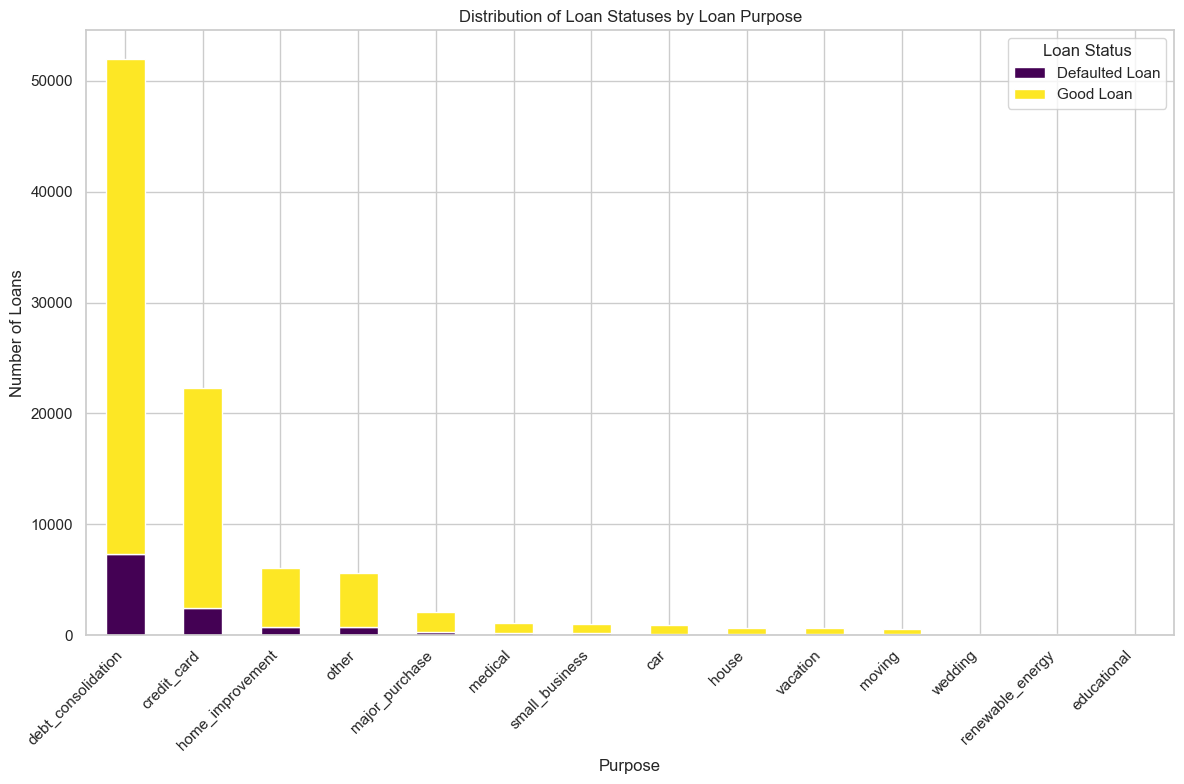

In [120]:
import matplotlib.pyplot as plt

# Sort data by total loan counts across all statuses for each purpose (descending order)
sorted_data = comparison_loan_status_purpose.sum(axis=0).sort_values(ascending=False)
sorted_columns = sorted_data.index
comparison_loan_status_purpose_sorted = comparison_loan_status_purpose[sorted_columns]

# Plot a stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each loan status as a stacked segment
comparison_loan_status_purpose_sorted.T.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')

# Set labels and title
ax.set_xlabel('Purpose')
ax.set_ylabel('Number of Loans')
ax.set_title('Distribution of Loan Statuses by Loan Purpose')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Loan Status')

# Display the plot
plt.show()


In [121]:
# Create a cross-tabulation of purpose and loan_status
comparison_loan_status_ver_status = pd.crosstab(df['loan_status_grouped_kn'], df['verification_status'])

# Display the result
comparison_loan_status_ver_status

verification_status     Not Verified  Source Verified  Verified
loan_status_grouped_kn                                         
Defaulted Loan                  3047             5243      3929
Good Loan                      30622            32458     17751

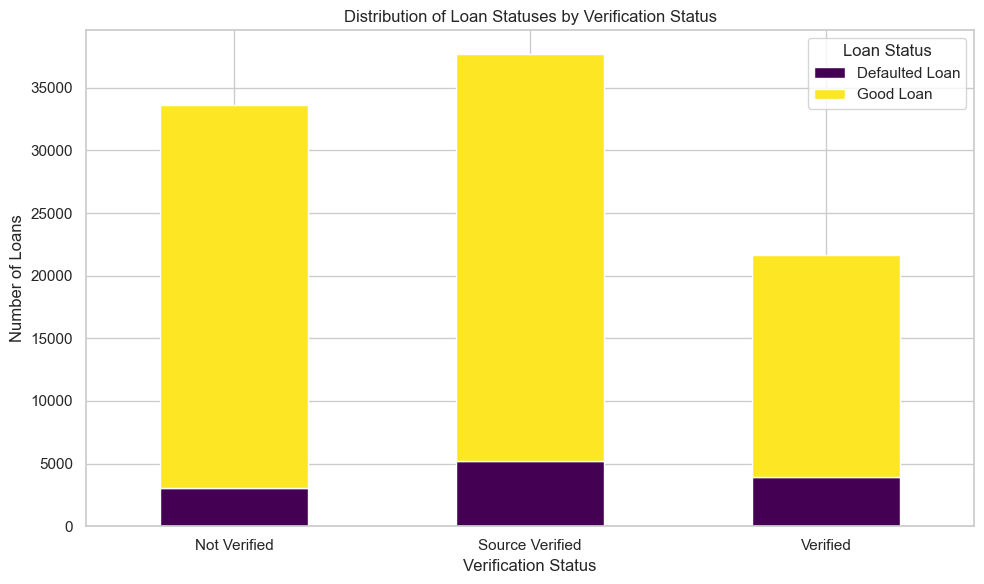

In [122]:
import matplotlib.pyplot as plt

# Plot a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Transpose the DataFrame for easier plotting and plot each loan status as a stacked segment
comparison_loan_status_ver_status.T.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')

# Set labels and title
ax.set_xlabel('Verification Status')
ax.set_ylabel('Number of Loans')
ax.set_title('Distribution of Loan Statuses by Verification Status')

# Rotate x-axis labels for readability
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title='Loan Status')

# Display the plot
plt.show()

This is an interesting view, as the the Not Verified, and Source Verified represent both roughly 15-20% of the charged off loans for each status but Verified accounts for roughly 23% of the total. I was expecting a lot of the Charged Off in the Not Verified `verification_status`.

In [123]:
# Create a cross-tabulation of purpose and loan_status
comparison_loan_status_addr_state = pd.crosstab(df['loan_status_grouped_kn'], df['addr_state'])

# Display the result
comparison_loan_status_addr_state

addr_state               AK   AL   AR    AZ     CA    CO    CT   DC   DE  \
loan_status_grouped_kn                                                     
Defaulted Loan           30  167  127   269   1721   202   168   21   31   
Good Loan               196  927  535  1945  11153  1808  1280  200  246   

addr_state                FL    GA   HI  IA   ID    IL    IN   KS   KY   LA  \
loan_status_grouped_kn                                                        
Defaulted Loan          1025   362   68   0   14   437   203   84  119  150   
Good Loan               5636  2739  406   1  173  3197  1316  683  799  834   

addr_state                MA    MD   ME    MI    MN    MO   MS   MT    NC  \
loan_status_grouped_kn                                                      
Defaulted Loan           269   321   11   314   210   198   95   40   341   
Good Loan               1831  1939  216  1991  1401  1365  391  215  2232   

addr_state               ND   NE   NH    NJ   NM    NV    NY    OH   OK    OR  \
loan_status_grouped_kn                                                          
Defaulted Loan           20   49   36   442   64   198  1101   425  142    86   
Good Loan               158  298  410  2978  401  1170  6326  2632  694  1041   

addr_state                PA   RI    SC   SD    TN    TX   UT    VA   VT  \
loan_status_grouped_kn                                                     
Defaulted Loan           418   53   113   27   179  1023   85   350   15   
Good Loan               2804  375  1039  176  1303  6868  562  2325  212   

addr_state                WA    WI   WV   WY  
loan_status_grouped_kn                        
Defaulted Loan           184   157   36   19  
Good Loan               1801  1054  362  187

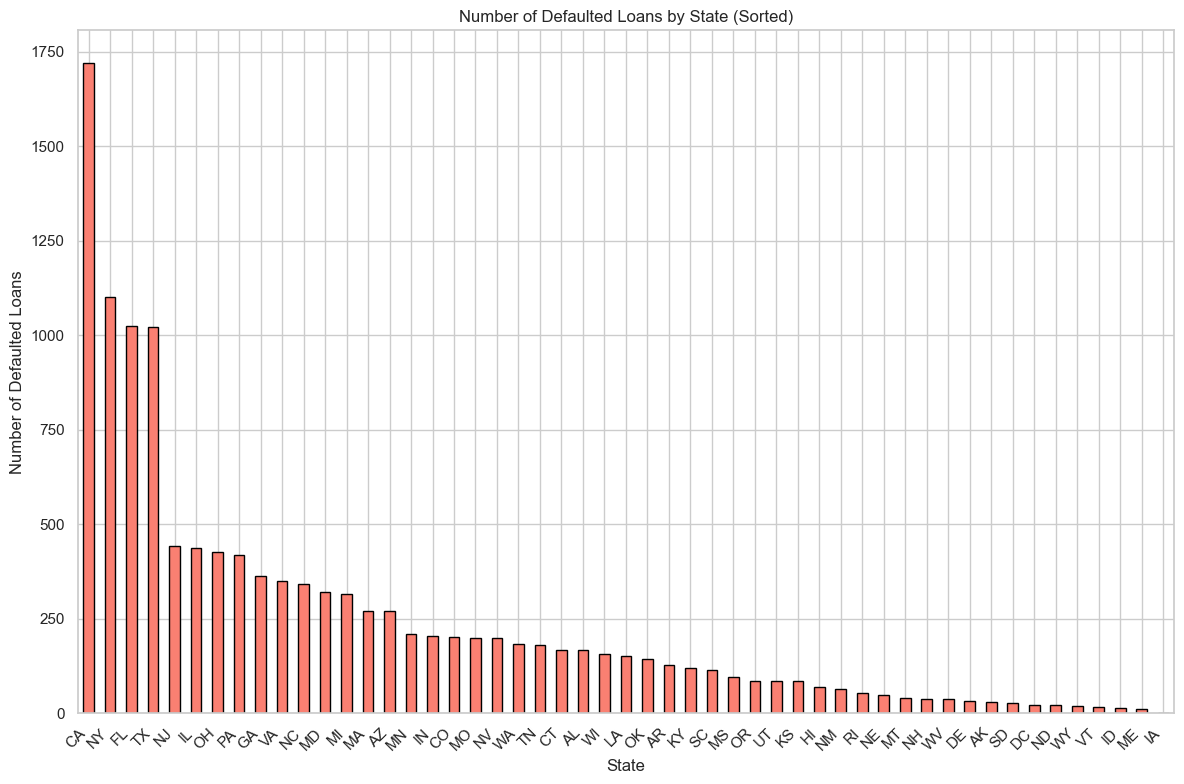

In [124]:
# Filter data to only include the 'Defaulted' loan status
defaulted_by_state = comparison_loan_status_addr_state.loc['Defaulted Loan']

# Sort the data by the number of defaulted loans in descending order
defaulted_by_state_sorted = defaulted_by_state.sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(12, 8))
defaulted_by_state_sorted.plot(kind='bar', color='salmon', edgecolor='black')

# Set labels and title
plt.xlabel("State")
plt.ylabel("Number of Defaulted Loans")
plt.title("Number of Defaulted Loans by State (Sorted)")

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


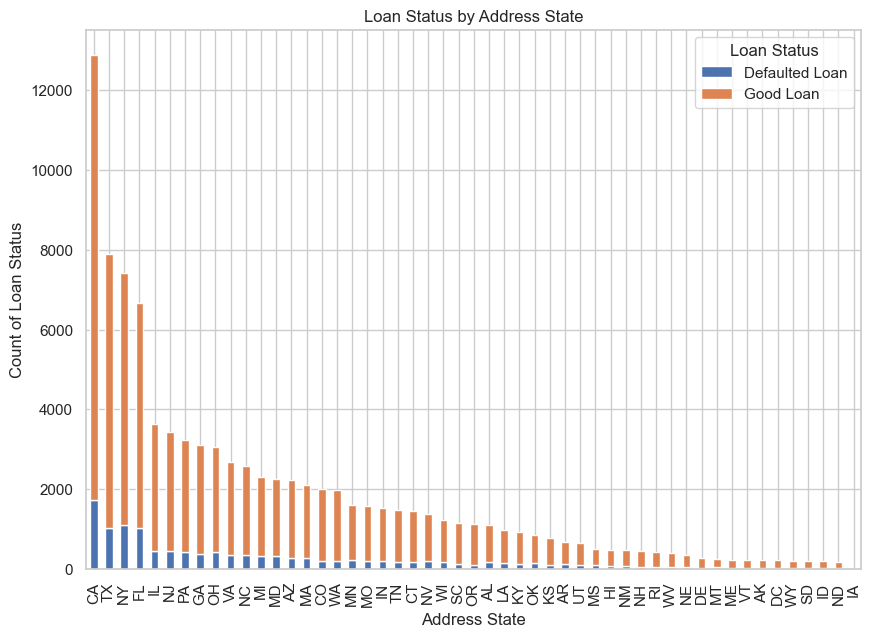

In [125]:
import matplotlib.pyplot as plt

# Group data by 'loan_status' and 'addr_state' and count occurrences
grouped_data = df.groupby(['addr_state', 'loan_status_grouped_kn']).size().unstack()

# Sort the data by the total count of loan statuses in descending order
grouped_data = grouped_data.loc[grouped_data.sum(axis=1).sort_values(ascending=False).index]

# Plot the bar chart
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 7))

# Adding labels and title
plt.title('Loan Status by Address State')
plt.xlabel('Address State')
plt.ylabel('Count of Loan Status')
plt.legend(title='Loan Status')

# Display the plot
plt.show()


In [126]:
# Calculate the total number of loans for each state
total_loans_by_state = comparison_loan_status_addr_state.sum(axis=0)

# Extract the number of defaulted loans for each state
defaulted_loans_by_state = comparison_loan_status_addr_state.loc['Defaulted Loan']

# Calculate the percentage of defaulted loans
defaulted_percentage_by_state = (defaulted_loans_by_state / total_loans_by_state) * 100

# Combine into a DataFrame for easy viewing
defaulted_percentage_df = pd.DataFrame({
    'Total Loans': total_loans_by_state,
    'Defaulted Loans': defaulted_loans_by_state,
    '% Defaulted': defaulted_percentage_by_state
})

# Display the result
defaulted_percentage_df = defaulted_percentage_df.sort_values(by='% Defaulted', ascending=False)
defaulted_percentage_df


Total Loans  Defaulted Loans  % Defaulted
addr_state                                           
MS                  486               95    19.547325
AR                  662              127    19.184290
OK                  836              142    16.985646
MT                  255               40    15.686275
FL                 6661             1025    15.388080
AL                 1094              167    15.265082
LA                  984              150    15.243902
NY                 7427             1101    14.824290
NV                 1368              198    14.473684
HI                  474               68    14.345992
MD                 2260              321    14.203540
NE                  347               49    14.121037
OH                 3057              425    13.902519
NM                  465               64    13.763441
MI                 2305              314    13.622560
CA                12874             1721    13.368029
IN                 1519              203    13.364055
SD                  203               27    13.300493
AK                  226               30    13.274336
NC                 2573              341    13.253012
UT                  647               85    13.137558
VA                 2675              350    13.084112
MN                 1611              210    13.035382
PA                 3222              418    12.973309
WI                 1211              157    12.964492
TX                 7891             1023    12.964136
KY                  918              119    12.962963
NJ                 3420              442    12.923977
MA                 2100              269    12.809524
MO                 1563              198    12.667946
RI                  428               53    12.383178
AZ                 2214              269    12.149955
TN                 1482              179    12.078273
IL                 3634              437    12.025316
GA                 3101              362    11.673654
CT                 1448              168    11.602210
ND                  178               20    11.235955
DE                  277               31    11.191336
KS                  767               84    10.951760
CO                 2010              202    10.049751
SC                 1152              113     9.809028
DC                  221               21     9.502262
WA                 1985              184     9.269521
WY                  206               19     9.223301
WV                  398               36     9.045226
NH                  446               36     8.071749
OR                 1127               86     7.630878
ID                  187               14     7.486631
VT                  227               15     6.607930
ME                  227               11     4.845815
IA                    1                0     0.000000

#### Key Observations
- **Top States**: The states with the highest loan counts include **CA (California)**, **TX (Texas)**, **NY (New York)**, and **FL (Florida)**. These states exhibit a high volume of loans, likely due to their larger populations and economic activities.
- **Completed Loans**: The **Completed** loan status (blue segment) constitutes a significant portion in most states, suggesting a high rate of loan completion across regions.
- **In Progress Loans**: The **In Progress** loan status (green segment) appears prominently in states with higher loan volumes, indicating ongoing loan activities.
- **Defaulted and Late Loans**: **Defaulted** (orange) and **Late** (red) loans make up smaller portions of the overall loan distribution. However, states with higher loan counts (e.g., CA, TX, NY) also show relatively higher counts in these categories.


## Post EDA Analysis data transformation


Let's call our list function with the new_features selected. Then sense check the results for duplicates or missing data.

In [127]:
# this calls the split_data_frame function above create three lists to capture the sorting outputs in. 
# These will later be used to pull some graphs to evaluate the data and what possible transformations we've missed.
# Our function parameters are list and the latest version of our data frame in this caes new_features and df_dropped accordingly.
boolean_list, numerical_list, categorical_list = split_data_frame(features, df)

Summary of column counts:
boolean_list contains 16 value(s)
numerical_list contains 72 value(s)
categorical_list contains 15 value(s)
The feature list we'll be working with contains (93050, 103) rows and columns.


In [128]:
# Filter columns by datetime dtype
datetime_headers = df[features].select_dtypes(include=['datetime64']).columns.tolist()

# Print the list of datetime headers
print("Datetime headers in data frame:", datetime_headers)

Datetime headers in data frame: []


After running into issues, let's check our lists for duplicated values.

In [129]:
def check_for_duplicates(**named_lists):
    """
    Checks for duplicate headers in each named list and prints the duplicates if any are found.
    
    Parameters:
    ----------
    **named_lists : dict
        Named lists of headers to check for duplicates.
    
    Returns:
    --------
    None
    """
    for list_name, header_list in named_lists.items():
        duplicates = [item for item in set(header_list) if header_list.count(item) > 1]
        list_length = len(header_list)
        print(f"\nChecking list '{list_name}' (Length: {list_length})")
        
        if duplicates:
            print(f"  Duplicates found in '{list_name}': {duplicates}")
            print(f"  Total duplicates found in '{list_name}': {len(duplicates)}")
        else:
            print(f"  No duplicates found in '{list_name}'.")

# Example usage
check_for_duplicates(
    boolean_list=boolean_list, 
    numerical_list=numerical_list, 
    categorical_list=categorical_list
)


Checking list 'boolean_list' (Length: 16)
  No duplicates found in 'boolean_list'.

Checking list 'numerical_list' (Length: 72)
  No duplicates found in 'numerical_list'.

Checking list 'categorical_list' (Length: 15)
  No duplicates found in 'categorical_list'.


### Remove Duplicate Records
Remove any duplicate records to prevent bias.

In [130]:
# Record the initial number of rows
initial_row_count = len(df)

# Remove duplicate records
df.drop_duplicates(inplace=True)

# Calculate the number of rows removed
rows_removed = initial_row_count - len(df)

# Print a summary of the duplicate removal process
if rows_removed > 0:
    print(f"Duplicates removed: {rows_removed}")
    print(f"Total rows remaining: {len(df)}")
else:
    print("No duplicates were found and removed.")

No duplicates were found and removed.


In [131]:
def check_lists_against_dataframe(dataframe, *lists):
    """
    Checks each provided list for missing and duplicate columns in the DataFrame.

    Parameters:
    ----------
    dataframe : pd.DataFrame
        The DataFrame to check against.
    *lists : list
        Lists of column names to check.

    Returns:
    --------
    None
    """
    # Iterate over each list and check for missing columns and duplicates
    for i, header_list in enumerate(lists, start=1):
        # Convert list to a set to check for missing items and duplicates
        list_set = set(header_list)
        
        # Find columns in the list that are not in the DataFrame
        missing_in_df = list_set - set(dataframe.columns)
        
        # Display results with enhanced descriptive print statements
        print(f"\n### Checking List {i}")
        print(f"Total columns in provided list: {len(header_list)}")
        
        if missing_in_df:
            print(f"Columns missing in DataFrame (Total: {len(missing_in_df)}): {missing_in_df}")
        else:
            print("All columns from the list are present in the DataFrame.")

        # Check for duplicate columns within the list
        duplicates = [item for item in header_list if header_list.count(item) > 1]
        if duplicates:
            unique_duplicates = set(duplicates)
            print(f"Duplicate columns in list (Total Unique Duplicates: {len(unique_duplicates)}): {unique_duplicates}")
        else:
            print("No duplicates found in the list.")


In [132]:
check_lists_against_dataframe(df, boolean_list, numerical_list, categorical_list)


### Checking List 1
Total columns in provided list: 16
All columns from the list are present in the DataFrame.
No duplicates found in the list.

### Checking List 2
Total columns in provided list: 72
All columns from the list are present in the DataFrame.
No duplicates found in the list.

### Checking List 3
Total columns in provided list: 15
All columns from the list are present in the DataFrame.
No duplicates found in the list.


### Handle Outliers
Handle outliers using capping (Winsorization) or transformation.

# Feature Selection

In [133]:
df_clean = df[features].copy()

Let's run RFE to reduce our feature selection.

In [134]:
def check_infinity(df):
    infinite_list = df.isin([-np.inf, np.inf]).sum()

    if infinite_list.sum() == 0:
        print("No columns have infinite values.")
    else:
        print("Columns with infinite values (sorted high to low):")
        sorted_infinite_list = infinite_list[infinite_list > 0].sort_values(ascending=False)
        print(sorted_infinite_list)
        print("\nConsider replacing infinite values with NaN or a predefined value for further processing.")

check_infinity(df_clean)

No columns have infinite values.


In [135]:
def check_nan_values(df, threshold=0):
    """
    Checks for NaN values in the DataFrame.

    Parameters:
    ----------
    df : pd.DataFrame
        The DataFrame to check for NaN values.
    threshold : int, optional
        Minimum count of NaN values in columns to display in output.

    Returns:
    --------
    None
    """
    nan_list = df.isna().sum()

    if nan_list.sum() == 0:
        print("No columns have NaN values.")
    else:
        print("Columns with NaN values (sorted high to low):")
        print(nan_list[nan_list > threshold].sort_values(ascending=False))

check_nan_values(df_clean, threshold=10)  # Display columns with >10 NaNs

Columns with NaN values (sorted high to low):
hardship_status_clean_kn      88379
hardship_reason_grouped_kn    88379
title                           678
dtype: int64


Let's drop these columns `hardship_reason_grouped_kn` will be useful for post analysis, `hardship_status_clean_kn` is too close to our target variable.

We'll remove them directly from our data frame (df_clean)

In [136]:
# Remove the columns with high NaN values
df_clean = df_clean.drop(columns=['hardship_status_clean_kn', 'hardship_reason_grouped_kn', 'title'])

# Verify the columns have been removed by checking for remaining NaNs
nan_list = df_clean.isna().sum()
nan_list_filtered = nan_list[nan_list > 0].sort_values(ascending=False)

# Display any remaining columns with NaNs, if any
print("Columns with NaN values (sorted high to low):")
print(nan_list_filtered)


Columns with NaN values (sorted high to low):
Series([], dtype: int64)


# Encoding categorical Values


Now that we have our final list of features let's encode and run our baseline model.

### Convert Category

In [137]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from category_encoders import (
    TargetEncoder,
    LeaveOneOutEncoder,
    BinaryEncoder,
    HashingEncoder,
    HelmertEncoder
)
from tqdm import tqdm

def process_categorical_features(
    df,
    cat_features,
    Y,
    encoding_type_features='target',
    encoding_type_Y='label',
    encode_y=True,
    multi_column=False
):
    """
    Processes categorical features in the DataFrame and optionally encodes the target variable.

    Parameters:
    ----------
    df : pd.DataFrame
        The DataFrame containing the data.
    cat_features : list
        A list of column names representing categorical features.
    Y : pd.Series or array-like
        The target variable to encode if needed.
    encoding_type_features : str
        The encoding method to use for categorical features. Options are 'target', 'one_hot', 'ordinal',
        'leave_one_out', 'binary', 'hashing', 'frequency', 'helmert'.
    encoding_type_Y : str
        The encoding method to use for the target variable Y. Options are 'label', 'one_hot'.
    encode_y : bool, default=True
        If True, applies encoding to Y based on `encoding_type_Y`.
    multi_column : bool, default=False
        If True, encodes Y into multiple columns (one-hot encoding). If False, encodes Y into a single column
        (label encoding).

    Returns:
    --------
    df : pd.DataFrame
        The DataFrame with categorical features processed.
    Y : pd.Series or pd.DataFrame
        The encoded target variable. Returns a single-column Series if `multi_column=False`,
        or a multi-column DataFrame if `multi_column=True`.
    """
    # Ensure Y is a pandas Series with the same index as df
    if not isinstance(Y, pd.Series):
        Y = pd.Series(Y, index=df.index)

    # Check for NaN values in Y and handle if needed BEFORE encoding
    if Y.isna().any():
        print("Warning: NaN values found in target variable Y. Filling NaNs.")
        # For categorical Y, fill NaNs with the mode instead of median
        if Y.dtype == 'object' or Y.nunique() <= 2:
            mode_value = Y.mode()
            if not mode_value.empty:
                Y = Y.fillna(mode_value[0])
            else:
                Y = Y.fillna('Unknown')  # Fallback if mode cannot be determined
        else:
            Y = Y.fillna(Y.median())

    # Encode Y if requested
    if encode_y:
        if encoding_type_Y == 'one_hot':
            if Y.dtype == 'object' or Y.nunique() > 2:
                print("Encoding target variable Y using One-Hot Encoding.")
                Y = pd.get_dummies(Y, prefix='Y')
        elif encoding_type_Y == 'label':
            if Y.dtype == 'object' or Y.nunique() > 2:
                print("Encoding target variable Y using Label Encoding.")
                label_encoder = LabelEncoder()
                Y = pd.Series(label_encoder.fit_transform(Y), index=Y.index, name=Y.name)
        else:
            print(f"Warning: Encoding type '{encoding_type_Y}' for Y is not recognized. Skipping encoding of Y.")

    # After encoding, handle NaNs accordingly
    if encode_y and isinstance(Y, pd.DataFrame):
        if Y.isna().any().any():
            print("Warning: NaN values found in one-hot encoded target variable Y. Filling NaNs with 0.")
            Y = Y.fillna(0)
    elif encode_y and isinstance(Y, pd.Series):
        if Y.isna().any():
            print("Warning: NaN values found in target variable Y after encoding. Filling NaNs with the median value.")
            Y = Y.fillna(Y.median())

    # Process each categorical feature based on the specified encoding_type_features
    for feature in tqdm(cat_features, desc="Processing categorical features"):
        if feature in df.columns:
            if encoding_type_features == 'target':
                encoder = TargetEncoder(smoothing=10)
                # Determine the target for encoding
                target = Y if isinstance(Y, pd.Series) else Y.idxmax(axis=1)
                # Fit and transform the feature
                encoded_feature = encoder.fit_transform(df[[feature]], target)
                df[feature + '_encoded'] = encoded_feature[feature]
                df.drop(columns=[feature], inplace=True)
            elif encoding_type_features == 'one_hot':
                # One-Hot Encoding
                encoded_feature = pd.get_dummies(df[feature], prefix=feature)
                df.drop(columns=[feature], inplace=True)
                df = pd.concat([df, encoded_feature], axis=1)
            elif encoding_type_features == 'ordinal':
                # Ordinal Encoding
                encoder = OrdinalEncoder()
                df[feature + '_encoded'] = encoder.fit_transform(df[[feature]])
                df.drop(columns=[feature], inplace=True)
            elif encoding_type_features == 'leave_one_out':
                # Leave-One-Out Encoding
                encoder = LeaveOneOutEncoder()
                target = Y if isinstance(Y, pd.Series) else Y.idxmax(axis=1)
                encoded_feature = encoder.fit_transform(df[[feature]], target)
                df[feature + '_encoded'] = encoded_feature[feature]
                df.drop(columns=[feature], inplace=True)
            elif encoding_type_features == 'binary':
                # Binary Encoding
                encoder = BinaryEncoder()
                encoded_feature = encoder.fit_transform(df[[feature]])
                df.drop(columns=[feature], inplace=True)
                df = pd.concat([df, encoded_feature], axis=1)
            elif encoding_type_features == 'hashing':
                # Hashing Encoding
                encoder = HashingEncoder()
                encoded_feature = encoder.fit_transform(df[[feature]])
                df.drop(columns=[feature], inplace=True)
                df = pd.concat([df, encoded_feature], axis=1)
            elif encoding_type_features == 'frequency':
                # Frequency Encoding
                print(f"Encoding feature '{feature}' using Frequency Encoding.")
                freq = df[feature].value_counts(normalize=True)
                df[feature + '_frequency'] = df[feature].map(freq)
                df.drop(columns=[feature], inplace=True)
            elif encoding_type_features == 'helmert':
                # Helmert Encoding
                encoder = HelmertEncoder(cols=[feature])
                print(f"Encoding feature '{feature}' using Helmert Encoding.")
                encoded_feature = encoder.fit_transform(df[[feature]])
                df = pd.concat([df, encoded_feature], axis=1)
                df.drop(columns=[feature], inplace=True)
            else:
                print(f"Warning: Encoding type '{encoding_type_features}' is not recognized. Skipping feature '{feature}'.")
        else:
            print(f"Warning: Categorical feature '{feature}' not found in DataFrame. Skipping...")

    return df, Y  # Return the modified DataFrame and encoded target variable if applicable


In [138]:
df_clean['loan_status_grouped_kn'].value_counts()

loan_status_grouped_kn
Good Loan         80831
Defaulted Loan    12219
Name: count, dtype: int64

## Encoding Selection Table

| **Encoding Type** | **Best For**                                    | **Pros**                              | **Cons**                          | **Output Columns**                             |
|-------------------|-------------------------------------------------|---------------------------------------|-----------------------------------|------------------------------------------------|
| **Target**        | High cardinality, strong target relationship    | Reduces dimensionality, captures target relationship | Overfitting risk, requires careful handling | Single column                                 |
| **One-Hot**       | Low to medium cardinality, nominal features     | No ordinal assumptions, interpretable | High dimensionality, sparse data  | Multiple columns (one per category)           |
| **Ordinal**       | Ordinal features, low cardinality               | Simple, preserves order               | Implies order where none exists, can mislead models | Single column                                 |
| **Leave-One-Out** | High cardinality, prevent overfitting           | Reduces overfitting, captures target relationship | Complex, computationally intensive | Single column                                 |
| **Binary**        | High cardinality, dimensionality control        | More compact than One-Hot, handles high cardinality | Less interpretable, possible information loss | Multiple columns (binary digits)             |
| **Hashing**       | Very high cardinality, memory-efficient needs   | Fixed dimensionality, memory efficient | Hash collisions, less interpretable | Fixed number of columns (user-defined)        |
| **Frequency**     | Low to medium cardinality, predictive frequency | Simple, captures category prevalence  | Ignores category relationships, may be less effective | Single column                                 |
| **Helmert**       | Ordinal features, regression/classification     | Captures order, reduces multicollinearity | Complex, less commonly supported | Multiple columns (one less than number of categories) |


In [139]:
# Available encoding options for features:
# Uncomment the encoding type you want to use for categorical features.

# encoding_type_features = 'target'        # Target Encoding
# encoding_type_features = 'one_hot'       # One-Hot Encoding
# encoding_type_features = 'ordinal'       # Ordinal Encoding
# encoding_type_features = 'leave_one_out' # Leave-One-Out Encoding
# encoding_type_features = 'binary'        # Binary Encoding
# encoding_type_features = 'hashing'       # Hashing Encoding
# encoding_type_features = 'frequency'     # Frequency Encoding
# encoding_type_features = 'helmert'       # Helmert Encoding

# Available encoding options for Y:

# encoding_type_Y = 'label'       # Label Encoding (Single Column)
# encoding_type_Y = 'one_hot'     # One-Hot Encoding (Multiple Columns)


# Process categorical features and encode Y
df_encoded, y_encoded = process_categorical_features(
    df = df_clean, 
    cat_features = categorical_list,
    Y = df_clean['loan_status_grouped_kn'], 
    encoding_type_features = 'binary',
    encoding_type_Y = 'label', 
    encode_y = True, 
    multi_column = False
)

Encoding target variable Y using Label Encoding.


Processing categorical features:  67%|██████▋   | 10/15 [00:01<00:00, 11.01it/s]

Processing categorical features: 100%|██████████| 15/15 [00:01<00:00,  9.20it/s]

we removed the values earlier but obviously didn't remove them from our data frame.

### Convert Boolean to Int

In [147]:
### Convert Boolean to Int
# Select and convert boolean columns to integers
boolean_columns = df_encoded.select_dtypes(include=['bool']).columns

if not boolean_columns.empty:
    df_encoded[boolean_columns] = df_encoded[boolean_columns].astype(int)
    print(f"Converted boolean columns to integers: {list(boolean_columns)}")
else:
    print("No boolean columns found for conversion.")

Converted boolean columns to integers: ['policy_code', 'mo_sin_old_il_acct_missing_clean_kn', 'mo_sin_old_rev_tl_op_missing_clean_kn', 'num_accts_ever_120_pd_missing_clean_kn', 'num_tl_120dpd_2m_missing_clean_kn', 'pub_rec_bankruptcies_missing_clean_kn', 'emp_length_missing_clean_kn', 'emp_title_missing_clean_kn', 'annual_inc_joint_missing_clean_kn', 'inq_fi_missing_clean_kn', 'inq_last_12m_missing_clean_kn', 'num_tl_op_past_12m_missing_clean_kn']


### Lets split our data

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define X and y separately, selecting only numerical columns and excluding datetime types
X = df_encoded.select_dtypes(include=[np.number], exclude=['datetime', 'timedelta'])
y = y_encoded

print("X and y defined with shapes.")

X and y defined with shapes.


Pre RFE checks

### Missing Values Check

Ensure no NaNs in X (feature set) or y (target variable), as RFE cannot handle missing values.

Handle missing values by imputing them, dropping columns with too many missing values, or dropping rows with NaNs.

In [149]:
if X.isna().any().any():
    print("Warning: There are missing values in X. Please impute or drop them.")
if y.isna().any().any():
    print("Warning: There are missing values in y. Please impute or drop them.")

### Data Type Check

Ensure X contains only numerical columns for RFE (excluding datetime or categorical types).

Convert or encode any categorical variables before running RFE.

In [150]:
# Check if X contains only numerical columns
if not all(pd.api.types.is_numeric_dtype(dtype) for dtype in X.dtypes):
    print("Warning: X contains non-numerical columns. Please ensure all features are numerical.")
else:
    print("All columns in X are numerical.")

All columns in X are numerical.


### Infinites Check

Check for infinity values in X, which can also cause issues.

Replace infinities with suitable values or remove affected columns/rows.

In [151]:
import numpy as np
import pandas as pd

def preprocess_data(X, y, fill_value=0):
    """
    Preprocesses the feature set X and target y by:
    - Selecting numeric columns in X.
    - Handling NaN and infinite values in X by replacing them with the specified fill_value.
    
    Parameters:
    X (pd.DataFrame): Feature DataFrame to preprocess.
    y (pd.Series or pd.DataFrame): Target variable.
    fill_value (int or float, optional): Value to fill NaNs after processing. Default is 0.
    
    Returns:
    pd.DataFrame: Preprocessed features DataFrame (X_numeric).
    pd.Series or pd.DataFrame: Target variable (y).
    """
    # Select numeric columns in X and convert to float64
    X_numeric = X.select_dtypes(include=[np.number]).astype(np.float64)
    
    # Replace infinite values with NaN
    X_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # Handle NaN values
    if X_numeric.isna().any().any():
        print("Warning: NaN or infinite values found in X. Filling with", fill_value)
        X_numeric.fillna(fill_value, inplace=True)
    else:
        print("No NaN or infinite values found in X.")
    
    return X_numeric, y

In [152]:
# Call function
X_processed, y_processed = preprocess_data(X, y)

No NaN or infinite values found in X.


### Multicollinearity Check & Elimination

Check for highly correlated features using Variance Inflation Factor (VIF) or a correlation matrix. RFE can struggle with highly collinear features, as they can lead to unstable feature selection.

In [153]:
from tqdm import tqdm
import pandas as pd

def remove_near_zero_variance_columns(X, variance_threshold=0.01):
    """
    Removes columns with near-zero variance from the DataFrame.
    
    Parameters:
    ----------
    X : pd.DataFrame
        The input DataFrame containing features.
    variance_threshold : float, default=0.01
        The threshold for variance below which columns are removed.

    Returns:
    --------
    pd.DataFrame
        DataFrame with near-zero variance columns removed.
    """
    low_variance_cols = X.columns[X.var() < variance_threshold]
    
    # Progress bar setup for removing columns
    print(f"Identifying near-zero variance columns with threshold: {variance_threshold}")
    with tqdm(total=len(low_variance_cols), desc="Removing near-zero variance columns") as pbar:
        for col in low_variance_cols:
            print(f"Removing column: {col} (Variance: {X[col].var()})")
            X = X.drop(columns=[col])
            pbar.update(1)

    print(f"Removed {len(low_variance_cols)} near-zero variance columns.")
    return X

Before running VIF let's save ourselves some compute time and remove all features with little varience.

In [154]:
X_processed = remove_near_zero_variance_columns(X_processed, variance_threshold=0.01)

Identifying near-zero variance columns with threshold: 0.01


Removing near-zero variance columns:  13%|█▎        | 2/15 [00:00<00:00, 13.29it/s]

Removing column: acc_now_delinq (Variance: 0.004221288964082523)
Removing column: num_tl_30dpd (Variance: 0.0026704700473606574)
Removing column: policy_code (Variance: 0.0)


Removing near-zero variance columns:  27%|██▋       | 4/15 [00:00<00:00, 12.49it/s]

Removing column: pub_rec_bankruptcies_missing_clean_kn (Variance: 0.0004833822771520038)
Removing column: emp_length_missing_clean_kn (Variance: 0.0)
Removing column: int_rate_kn (Variance: 0.002352829644713665)


Removing near-zero variance columns:  53%|█████▎    | 8/15 [00:00<00:00, 14.21it/s]

Removing column: issue_d_year_kn (Variance: 0.0)
Removing column: issue_d_month_kn (Variance: 0.0)
Removing column: earliest_cr_line_year_kn (Variance: 0.0)
Removing column: earliest_cr_line_month_kn (Variance: 0.0)
Removing column: loan_status_0 (Variance: 0.001663014169748458)


Removing near-zero variance columns:  80%|████████  | 12/15 [00:00<00:00, 19.04it/s]

Removing column: loan_status_1 (Variance: 0.008998768792778514)
Removing column: pymnt_plan_0 (Variance: 0.0)
Removing column: sub_grade_0 (Variance: 0.0034165480947102736)


Removing near-zero variance columns: 100%|██████████| 15/15 [00:00<00:00, 15.93it/s]

Removing column: home_ownership_grouped_kn_0 (Variance: 0.001191496816931357)
Removed 15 near-zero variance columns.


In [155]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np
from tqdm import tqdm

def calculate_and_reduce_vif_with_infinite_handling(X, threshold=5):
    """
    Calculate VIF and iteratively remove features with VIF > threshold.
    Immediately removes features with infinite VIF values.

    Parameters:
    ----------
    X : pd.DataFrame
        The input DataFrame containing features.
    threshold : float, default=5
        The VIF threshold above which features are removed.

    Returns:
    --------
    pd.DataFrame
        DataFrame with selected features after VIF reduction.
    """
    # Ensure X only contains numeric types and convert to float64
    X = X.select_dtypes(include=[np.number]).astype(np.float64)

    # Replace any remaining infinite values with NaN and handle NaN values
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    X.fillna(0, inplace=True)
    
    # Initialize progress bar for the VIF reduction loop
    removed_features_count = 0
    print(f"Starting VIF calculation with threshold: {threshold}")
    with tqdm(total=len(X.columns), desc="VIF Reduction Process") as pbar:
        while True:
            vif_data = pd.DataFrame()
            vif_data["Feature"] = X.columns
            vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
            
            # Display current VIF status
            max_vif = vif_data["VIF"].max()
            print(f"Max VIF in current iteration: {max_vif}")
            
            # Remove features with infinite VIF immediately
            infinite_vif_features = vif_data[vif_data["VIF"] == np.inf]["Feature"]
            if not infinite_vif_features.empty:
                print(f"Removing features with infinite VIF: {list(infinite_vif_features)}")
                X = X.drop(columns=infinite_vif_features)
                removed_features_count += len(infinite_vif_features)
                pbar.update(len(infinite_vif_features))
                continue  # Skip to next iteration after removing infinite VIF columns
            
            # Check for high VIF features and remove the one with the highest VIF
            if max_vif > threshold:
                max_vif_feature = vif_data.loc[vif_data["VIF"].idxmax(), "Feature"]
                print(f"Removing feature '{max_vif_feature}' with VIF: {max_vif}")
                X = X.drop(columns=[max_vif_feature])
                removed_features_count += 1
                pbar.update(1)
            else:
                print("VIF reduction complete.")
                break

    print(f"Total features removed: {removed_features_count}")
    return X


In [156]:
X_processed = calculate_and_reduce_vif_with_infinite_handling(X_processed, threshold=6)

Starting VIF calculation with threshold: 6


VIF Reduction Process:   0%|          | 0/118 [00:00<?, ?it/s]c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
VIF Reduction Process:  10%|█         | 12/118 [07:27<1:05:50, 37.26s/it]

Max VIF in current iteration: inf
Removing features with infinite VIF: ['mo_sin_old_rev_tl_op_missing_clean_kn', 'num_accts_ever_120_pd_missing_clean_kn', 'annual_inc_joint_missing_clean_kn', 'inq_fi_missing_clean_kn', 'inq_last_12m_missing_clean_kn', 'num_tl_op_past_12m_missing_clean_kn', 'application_type_0', 'application_type_1', 'initial_list_status_0', 'initial_list_status_1', 'loan_status_grouped_kn_0', 'loan_status_grouped_kn_1']


VIF Reduction Process:  11%|█         | 13/118 [13:06<2:01:27, 69.41s/it]

Max VIF in current iteration: 351448.5057313763
Removing feature 'out_prncp' with VIF: 351448.5057313763


VIF Reduction Process:  12%|█▏        | 14/118 [18:24<2:57:13, 102.24s/it]

Max VIF in current iteration: 34695.35229600917
Removing feature 'funded_amnt' with VIF: 34695.35229600917


VIF Reduction Process:  13%|█▎        | 15/118 [23:29<3:50:32, 134.29s/it]

Max VIF in current iteration: 8593.108861111969
Removing feature 'total_pymnt' with VIF: 8593.108861111969


VIF Reduction Process:  14%|█▎        | 16/118 [28:45<4:45:23, 167.88s/it]

Max VIF in current iteration: 3147.515828362878
Removing feature 'funded_amnt_inv' with VIF: 3147.515828362878


VIF Reduction Process:  14%|█▍        | 17/118 [34:20<5:41:16, 202.74s/it]

Max VIF in current iteration: 596.2319116629911
Removing feature 'total_pymnt_inv' with VIF: 596.2319116629911


VIF Reduction Process:  15%|█▌        | 18/118 [39:24<6:16:36, 225.97s/it]

Max VIF in current iteration: 312.5777224843161
Removing feature 'open_acc' with VIF: 312.5777224843161


VIF Reduction Process:  16%|█▌        | 19/118 [44:02<6:34:11, 238.91s/it]

Max VIF in current iteration: 217.7081543374023
Removing feature 'num_actv_rev_tl' with VIF: 217.7081543374023


VIF Reduction Process:  17%|█▋        | 20/118 [48:34<6:44:26, 247.62s/it]

Max VIF in current iteration: 187.04732522306193
Removing feature 'tot_hi_cred_lim' with VIF: 187.04732522306193


VIF Reduction Process:  18%|█▊        | 21/118 [53:21<6:57:40, 258.36s/it]

Max VIF in current iteration: 167.30378301353215
Removing feature 'loan_amnt' with VIF: 167.30378301353215


VIF Reduction Process:  19%|█▊        | 22/118 [57:41<6:54:08, 258.83s/it]

Max VIF in current iteration: 132.0699531911424
Removing feature 'total_acc' with VIF: 132.0699531911424


VIF Reduction Process:  19%|█▉        | 23/118 [1:01:36<6:38:48, 251.88s/it]

Max VIF in current iteration: 85.04455856084101
Removing feature 'num_op_rev_tl' with VIF: 85.04455856084101


VIF Reduction Process:  20%|██        | 24/118 [1:05:30<6:26:18, 246.58s/it]

Max VIF in current iteration: 55.38435796694265
Removing feature 'pct_tl_nvr_dlq' with VIF: 55.38435796694265


VIF Reduction Process:  21%|██        | 25/118 [1:09:12<6:11:09, 239.46s/it]

Max VIF in current iteration: 47.41124925522772
Removing feature 'num_sats' with VIF: 47.41124925522772


VIF Reduction Process:  22%|██▏       | 26/118 [1:12:59<6:01:28, 235.75s/it]

Max VIF in current iteration: 34.39197511867216
Removing feature 'total_bal_ex_mort' with VIF: 34.39197511867216


VIF Reduction Process:  23%|██▎       | 27/118 [1:16:26<5:44:36, 227.21s/it]

Max VIF in current iteration: 33.18699955371243
Removing feature 'term_kn' with VIF: 33.18699955371243


VIF Reduction Process:  24%|██▎       | 28/118 [1:19:46<5:28:51, 219.23s/it]

Max VIF in current iteration: 32.477380440683206
Removing feature 'total_rev_hi_lim' with VIF: 32.477380440683206


VIF Reduction Process:  25%|██▍       | 29/118 [1:22:39<5:04:45, 205.46s/it]

Max VIF in current iteration: 31.342718380049394
Removing feature 'num_actv_bc_tl' with VIF: 31.342718380049394


VIF Reduction Process:  25%|██▌       | 30/118 [1:25:31<4:46:41, 195.47s/it]

Max VIF in current iteration: 27.83741173878099
Removing feature 'bc_util' with VIF: 27.83741173878099


VIF Reduction Process:  26%|██▋       | 31/118 [1:28:22<4:32:52, 188.19s/it]

Max VIF in current iteration: 26.542761312419795
Removing feature 'total_bc_limit' with VIF: 26.542761312419795


VIF Reduction Process:  27%|██▋       | 32/118 [1:31:24<4:26:59, 186.27s/it]

Max VIF in current iteration: 24.484404775638357
Removing feature 'num_bc_tl' with VIF: 24.484404775638357


VIF Reduction Process:  28%|██▊       | 33/118 [1:34:15<4:17:29, 181.76s/it]

Max VIF in current iteration: 19.868329701263473
Removing feature 'installment' with VIF: 19.868329701263473


VIF Reduction Process:  29%|██▉       | 34/118 [1:37:20<4:15:36, 182.58s/it]

Max VIF in current iteration: 16.383960866555284
Removing feature 'all_util' with VIF: 16.383960866555284


VIF Reduction Process:  30%|██▉       | 35/118 [1:40:19<4:11:04, 181.50s/it]

Max VIF in current iteration: 13.746334521282737
Removing feature 'revol_util_kn' with VIF: 13.746334521282737


VIF Reduction Process:  31%|███       | 36/118 [1:43:07<4:02:44, 177.61s/it]

Max VIF in current iteration: 11.846607628957054
Removing feature 'tot_cur_bal' with VIF: 11.846607628957054


VIF Reduction Process:  31%|███▏      | 37/118 [1:45:40<3:49:35, 170.06s/it]

Max VIF in current iteration: 10.916511172941703
Removing feature 'acc_open_past_24mths' with VIF: 10.916511172941703


VIF Reduction Process:  32%|███▏      | 38/118 [1:48:10<3:38:44, 164.06s/it]

Max VIF in current iteration: 10.867504537445013
Removing feature 'num_bc_sats' with VIF: 10.867504537445013


VIF Reduction Process:  33%|███▎      | 39/118 [1:50:34<3:28:07, 158.07s/it]

Max VIF in current iteration: 10.059865494265544
Removing feature 'purpose_2' with VIF: 10.059865494265544


VIF Reduction Process:  34%|███▍      | 40/118 [1:52:43<3:14:10, 149.37s/it]

Max VIF in current iteration: 9.10885403744605
Removing feature 'loan_status_2' with VIF: 9.10885403744605


VIF Reduction Process:  35%|███▍      | 41/118 [1:55:00<3:06:57, 145.68s/it]

Max VIF in current iteration: 8.37772597171969
Removing feature 'total_il_high_credit_limit' with VIF: 8.37772597171969


VIF Reduction Process:  36%|███▌      | 42/118 [1:57:08<2:57:49, 140.39s/it]

Max VIF in current iteration: 8.159972884648752
Removing feature 'num_rev_accts' with VIF: 8.159972884648752


VIF Reduction Process:  36%|███▋      | 43/118 [1:59:16<2:50:43, 136.57s/it]

Max VIF in current iteration: 6.671565341500749
Removing feature 'home_ownership_grouped_kn_2' with VIF: 6.671565341500749


VIF Reduction Process:  36%|███▋      | 43/118 [2:01:15<3:31:29, 169.19s/it]

Max VIF in current iteration: 5.964807634812374
VIF reduction complete.
Total features removed: 43


### Baseline Model Performance

Running a baseline model (e.g., Logistic Regression, Decision Tree) before RFE can give you an idea of the initial feature set's performance.

This helps compare whether RFE improves the model.

In [162]:
X_processed.shape

(93050, 75)

In [157]:
y_processed.shape

(93050,)

Let's split our data set for analysis.

In [158]:
from sklearn.model_selection import train_test_split

# Assuming X_processed and y_processed are your feature matrix and target variable respectively
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, 
    y_processed, 
    test_size=0.5, 
    random_state=50
)

Let's define our models

In [ ]:
# Example usage with a dictionary of models
models = {
    # Logistic Regression
    # Pros: Simple and interpretable, naturally extends to multiclass.
    # Cons: Assumes linear relationships, may struggle with complex patterns in data.
    # Parameters: max_iter=8000 (number of iterations), solver='saga' (solver for large datasets).
    "Logistic Regression": LogisticRegression(max_iter=8000, solver='saga', random_state=42),

    # Random Forest
    # Pros: Robust to overfitting, handles multiclass classification naturally, no need for feature scaling.
    # Cons: Can be slow to train on large datasets, needs hyperparameter tuning for optimal performance.
    # Parameters: n_estimators=250 (number of trees), random_state=42 (for reproducibility).
    "Random Forest": RandomForestClassifier(n_estimators=250, random_state=42),

    # XGBoost
    # Pros: Often achieves high performance, strong for complex patterns and imbalanced data, provides feature importance.
    # Cons: Requires careful tuning, training can be time-intensive for large datasets.
    # Parameters: eval_metric='mlogloss' (loss function for multiclass), random_state=42.
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42),

    # Gradient Boosting
    # Pros: High accuracy, handles complex patterns well, less prone to overfitting than single decision trees.
    # Cons: Slower to train compared to Random Forest, requires tuning to prevent overfitting.
    # Parameters: n_estimators=100 (number of boosting stages), learning_rate=0.1 (step size), random_state=42.
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),

    # Support Vector Machine (SVM)
    # Pros: Effective in high-dimensional spaces, works well for smaller datasets with clear class separation.
    # Cons: Slow to train on larger datasets, sensitive to kernel and regularization parameter.
    # Parameters: kernel='rbf' (radial basis function kernel), decision_function_shape='ovr' (one-vs-rest for multiclass classification).
    # "Support Vector Machine": SVC(kernel='rbf', decision_function_shape='ovr', random_state=42),

    # Neural Network (MLP)
    # Pros: Highly flexible, can learn complex relationships, suitable for multiclass classification.
    # Cons: Often requires a large dataset, tuning, and computational resources; may need data scaling.
    # Parameters: hidden_layer_sizes=(100,) (single hidden layer with 100 units), max_iter=300 (max number of iterations), random_state=42.
    # "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42),

    # K-Nearest Neighbors (KNN)
    # Pros: Simple and interpretable, no training phase, can perform well on smaller datasets.
    # Cons: Computationally intensive during prediction, sensitive to feature scaling, struggles with high-dimensional data.
    # Parameters: n_neighbors=5 (number of neighbors considered for classification).
    # "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

In [160]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score
)
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
import numpy as np

def evaluate_model(name, model, X_train, y_train, X_test, y_test, cv_folds=5):
    """
    Evaluates a machine learning model using cross-validation on the training set
    and calculates additional performance metrics on the test set.

    Parameters:
    ----------
    name : str
        Name of the model for display.
    model : estimator object
        The machine learning model to evaluate.
    X_train : pd.DataFrame
        Training feature matrix.
    y_train : pd.Series
        Training target variable.
    X_test : pd.DataFrame
        Testing feature matrix.
    y_test : pd.Series
        Testing target variable.
    cv_folds : int, default=5
        Number of cross-validation folds.

    Returns:
    --------
    None
        Prints the evaluation metrics.
    """
    
    # Run cross-validation on the training set and calculate mean accuracy and standard deviation
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='accuracy')
    cv_mean_accuracy = cv_scores.mean()
    cv_std_dev = cv_scores.std()
    
    # Fit the model on the entire training set
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics on the test set
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0, average='weighted')
    recall = recall_score(y_test, y_pred, zero_division=0, average='weighted')
    f1 = f1_score(y_test, y_pred, zero_division=0, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate ROC-AUC if the model supports predict_proba or decision_function
    try:
        if hasattr(model, "predict_proba"):
            y_probs = model.predict_proba(X_test)
            if y_probs.shape[1] == 2:
                roc_auc = roc_auc_score(y_test, y_probs[:, 1])
            else:
                roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovr', average='weighted')
        elif hasattr(model, "decision_function"):
            y_scores = model.decision_function(X_test)
            if y_scores.ndim == 1:
                roc_auc = roc_auc_score(y_test, y_scores)
            else:
                roc_auc = roc_auc_score(y_test, y_scores, multi_class='ovr', average='weighted')
        else:
            roc_auc = None
    except Exception as e:
        print(f"ROC-AUC could not be calculated for model '{name}': {e}")
        roc_auc = None
    
    # Print all metrics
    print(f"Model: {name}")
    print(f"Cross-Validation Mean Accuracy: {cv_mean_accuracy:.4f} ± {cv_std_dev:.4f}")
    print(f"Test Set Accuracy: {accuracy:.4f}")
    print(f"Test Set Precision: {precision:.4f}")
    print(f"Test Set Recall: {recall:.4f}")
    print(f"Test Set F1-Score: {f1:.4f}")
    print(f"Test Set ROC-AUC: {roc_auc:.4f}" if roc_auc is not None else "Test Set ROC-AUC: N/A")
    print("Confusion Matrix:")
    print(cm)
    print("-" * 40)


In [161]:
# Loop through and evaluate each model
for name, model in models.items():
    print("\nEvaluating:", name)
    evaluate_model(
        name, 
        model, 
        X_train, 
        y_train, 
        X_test, 
        y_test,
        cv_folds=5
    )



Evaluating: Logistic Regression
Model: Logistic Regression
Cross-Validation Mean Accuracy: 0.9316 ± 0.0023
Test Set Accuracy: 0.9307
Test Set Precision: 0.9288
Test Set Recall: 0.9307
Test Set F1-Score: 0.9231
Test Set ROC-AUC: 0.9165
Confusion Matrix:
[[ 3329  2839]
 [  384 39973]]
----------------------------------------

Evaluating: Random Forest
Model: Random Forest
Cross-Validation Mean Accuracy: 0.9918 ± 0.0006
Test Set Accuracy: 0.9920
Test Set Precision: 0.9920
Test Set Recall: 0.9920
Test Set F1-Score: 0.9920
Test Set ROC-AUC: 0.9940
Confusion Matrix:
[[ 5897   271]
 [  101 40256]]
----------------------------------------

Evaluating: XGBoost


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

Model: XGBoost
Cross-Validation Mean Accuracy: 0.9924 ± 0.0003
Test Set Accuracy: 0.9924
Test Set Precision: 0.9924
Test Set Recall: 0.9924
Test Set F1-Score: 0.9924
Test Set ROC-AUC: 0.9951
Confusion Matrix:
[[ 5941   227]
 [  125 40232]]
----------------------------------------


Now that we have our base results lets check how our model is influenced once we fine tune or feature selection using RFE.

# All working until here

## RFE Feature reduction

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from tqdm import tqdm
import pandas as pd

# Assume X and y are already defined and preprocessed

def run_rfe_with_progress(X, y, estimator=None, step=3, cv_folds=5, scoring='accuracy'):
    """
    Runs Recursive Feature Elimination with Cross-Validation (RFECV) with progress tracking.
    
    Parameters:
    ----------
    X : pd.DataFrame or np.ndarray
        The feature matrix.
    y : pd.Series
        The target variable.
    estimator : estimator object, default=None
        The model used for RFE. Defaults to Logistic Regression if not provided.
    step : int, default=1
        Number of features to remove at each iteration.
    cv_folds : int, default=5
        Number of cross-validation folds.
    scoring : str, default='accuracy'
        The scoring metric for RFECV.

    Returns:
    --------
    Tuple[pd.DataFrame or np.ndarray, RFECV]
        Returns the reduced feature DataFrame or array and the fitted RFECV object.
    """
    # Fetch the chosen model from the models dictionary
    if model_name not in models:
        raise ValueError(f"Model '{model_name}' not found. Choose from: {list(models.keys())}")
    
    estimator = models[model_name]
        
    cv = StratifiedKFold(n_splits=cv_folds)

    # Initialize RFECV with the estimator, step size, cross-validation, and scoring
    rfecv = RFECV(
        estimator=estimator,
        step=step,
        cv=cv,
        scoring=scoring,
        verbose=2
    )

    # Fit RFECV with a progress indicator
    print("Starting RFE with cross-validation...")
    with tqdm(total=X.shape[1], desc="RFE Feature Elimination") as pbar:
        rfecv.fit(X, y)
        # Update progress bar after each step
        pbar.update(step)
    
    # Extract the selected features
    if isinstance(X, pd.DataFrame):
        selected_features = X.columns[rfecv.support_]
        X_reduced = X.loc[:, selected_features]
        print(f"Selected Features after RFE: {selected_features.tolist()}")
    else:
        X_reduced = X[:, rfecv.support_]
        print(f"Selected Features after RFE: {rfecv.support_.sum()} features selected")

    print("Selected Features Mask:", rfecv_model.support_)
    print("Number of Selected Features:", rfecv_model.support_.sum())

    return X_reduced, rfecv


Due to lbfgs errors we've scaled our X data.

In [196]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_processed)

In [ ]:
X_reduced, rfecv_model = run_rfe_with_progress(
    X=X_scaled, 
    y=y_processed,
    model_name="Gradient Boosting",  # Select the model here
    step=1,
    cv_folds=5,
    scoring='accuracy'
)

Starting RFE with cross-validation...


RFE Feature Elimination:   0%|          | 0/75 [00:00<?, ?it/s]

Fitting estimator with 75 features.
Fitting estimator with 72 features.
Fitting estimator with 69 features.
Fitting estimator with 66 features.
Fitting estimator with 63 features.
Fitting estimator with 60 features.
Fitting estimator with 57 features.
Fitting estimator with 54 features.
Fitting estimator with 51 features.
Fitting estimator with 48 features.
Fitting estimator with 45 features.
Fitting estimator with 42 features.
Fitting estimator with 39 features.
Fitting estimator with 36 features.


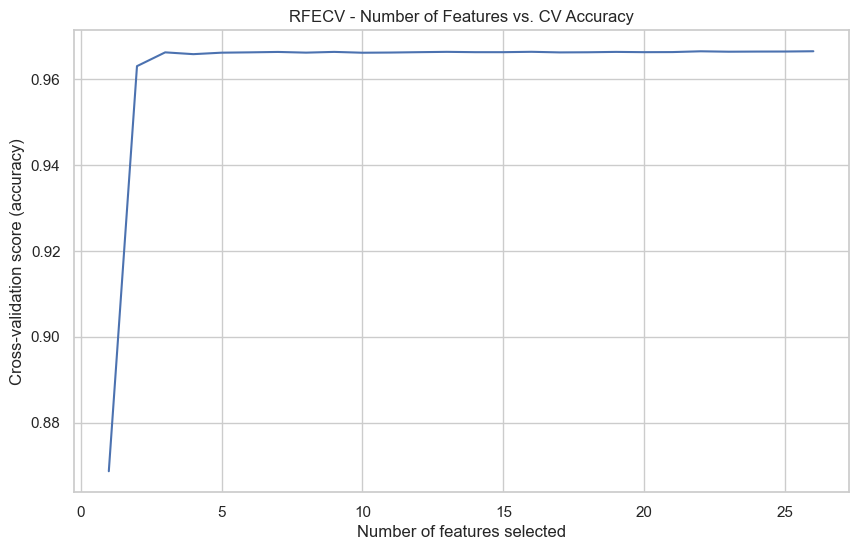

In [ ]:
import matplotlib.pyplot as plt

# Plot number of features vs. cross-validation scores
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")
plt.plot(range(1, len(rfecv_model.cv_results_['mean_test_score']) + 1), rfecv_model.cv_results_['mean_test_score'])
plt.title("RFECV - Number of Features vs. CV Accuracy")
plt.show()


**Key Insights**

Optimal Number of Features: Based on this plot, the optimal number of features seems to be around 3. This is the point where the accuracy score stabilizes, indicating that these 3 features likely contain most of the predictive information for the model.

Dimensionality Reduction: This result suggests that eliminating features beyond the optimal point could simplify the model without losing predictive power, which can be beneficial for reducing computational cost and improving model interpretability.

In [186]:
# Define the save path as a constant for the ML results (*.pkl)
SAVE_PATH = "c:\\Users\\kiera\\OneDrive\\Documents\\GitHub\\dsif-git-main-project\\elvtr_main_project\\"


## Let's run our models against the RFE feature selection

Our new data frame containing the RFE selected features is X_reduced.

In [187]:
# Function to wrap model in appropriate multi-class strategy
def get_wrapped_model(model, strategy):
    """
    Wraps the provided model in a multi-class strategy if specified.

    Parameters:
    ----------
    model : estimator object
        The machine learning model to be wrapped in a multi-class strategy.
    strategy : str or None
        Multi-class strategy, either 'ovo' (one-vs-one) or 'ovr' (one-vs-rest).
        If None or unsupported, returns the model unwrapped.

    Returns:
    -------
    estimator object
        Model wrapped in the specified multi-class strategy, or the original model.
    """
    if strategy == 'ovo':
        return OneVsOneClassifier(model)
    elif strategy == 'ovr':
        return OneVsRestClassifier(model)
    elif strategy is None:
        return model  # No wrapping needed for single classification
    else:
        print(f"Warning: Unsupported strategy '{strategy}'. Returning base model.")
        return model  # Fallback to base model for unsupported strategies


In [188]:
# Function to evaluate binary classification models
def evaluate_model_single(name, model, X_train, X_test, y_train, y_test, save_path=SAVE_PATH):
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Check if model provides probability estimates
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        
        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f'ROC Curve - {name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()

        # Precision-Recall Curve
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        avg_precision = average_precision_score(y_test, y_pred_proba)
        plt.figure()
        plt.plot(recall, precision, label=f'Average Precision = {avg_precision:.2f}')
        plt.title(f'Precision-Recall Curve - {name}')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend(loc='lower left')
        plt.grid(True)
        plt.show()
    else:
        roc_auc = None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision_val = precision_score(y_test, y_pred, zero_division=0, average='weighted')
    recall_val = recall_score(y_test, y_pred, zero_division=0, average='weighted')
    f1 = f1_score(y_test, y_pred, zero_division=0, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    # Cross-Validation Mean Accuracy
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_mean_accuracy = cv_scores.mean()

    # Print metrics in desired format
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision_val:.4f}")
    print(f"Recall: {recall_val:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}" if roc_auc is not None else "ROC-AUC: N/A")
    print(f"Cross-Validation Mean Accuracy: {cv_mean_accuracy:.4f}")
    print("Confusion Matrix:")
    print(cm)

    # Display Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # Save model and results
    results = {
        'Model': name, 
        'Accuracy': accuracy, 
        'Precision': precision_val,
        'Recall': recall_val, 
        'F1-Score': f1, 
        'ROC-AUC': roc_auc,
        'Cross-Validation Mean Accuracy': cv_mean_accuracy
    }
    if save_path:
        joblib.dump(model, os.path.join(save_path, f"{name.replace(' ', '_')}_model.pkl"))
        joblib.dump(results, os.path.join(save_path, f"{name.replace(' ', '_')}_results.pkl"))

    return results

In [189]:
# Multi-class classification evaluation function
def evaluate_model_multi(name, model, X_train, X_test, y_train, y_test, save_path=SAVE_PATH, multi_class_strategy='ovr'):
    print(f"\nTraining {name}...")
    model = get_wrapped_model(model, multi_class_strategy)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # ROC and PR Curves for each class
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)
        classes = np.unique(y_train)
        y_test_binarized = label_binarize(y_test, classes=classes)
        n_classes = y_test_binarized.shape[1]

        # ROC Curves for each class
        plt.figure(figsize=(10, 8))
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
            roc_auc = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])
            plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f'Multi-Class ROC Curve - {name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()

        # PR Curves for each class
        plt.figure(figsize=(10, 8))
        for i in range(n_classes):
            precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_pred_proba[:, i])
            avg_precision = average_precision_score(y_test_binarized[:, i], y_pred_proba[:, i])
            plt.plot(recall, precision, label=f'Class {classes[i]} (AP = {avg_precision:.2f})')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Multi-Class Precision-Recall Curve - {name}')
        plt.legend(loc='lower left')
        plt.grid(True)
        plt.show()
    else:
        roc_auc = None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision_val = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall_val = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    # Cross-Validation Mean Accuracy
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_mean_accuracy = cv_scores.mean()

    # Print metrics in desired format
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision_val:.4f}")
    print(f"Recall: {recall_val:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}" if roc_auc is not None else "ROC-AUC: N/A")
    print(f"Cross-Validation Mean Accuracy: {cv_mean_accuracy:.4f}")
    print("Confusion Matrix:")
    print(cm)

    # Display Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # Save model and results
    results = {
        'Model': name, 
        'Accuracy': accuracy, 
        'Precision': precision_val,
        'Recall': recall_val, 
        'F1-Score': f1, 
        'ROC-AUC': roc_auc,
        'Cross-Validation Mean Accuracy': cv_mean_accuracy
    }
    if save_path:
        joblib.dump(model, os.path.join(save_path, f"{name.replace(' ', '_')}_model.pkl"))
        joblib.dump(results, os.path.join(save_path, f"{name.replace(' ', '_')}_results.pkl"))

    return results

Evaluating models:   0%|          | 0/3 [00:00<?, ?it/s]


Training Logistic Regression...


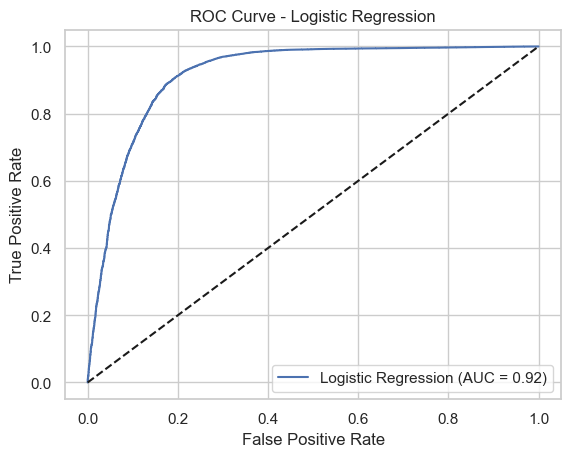

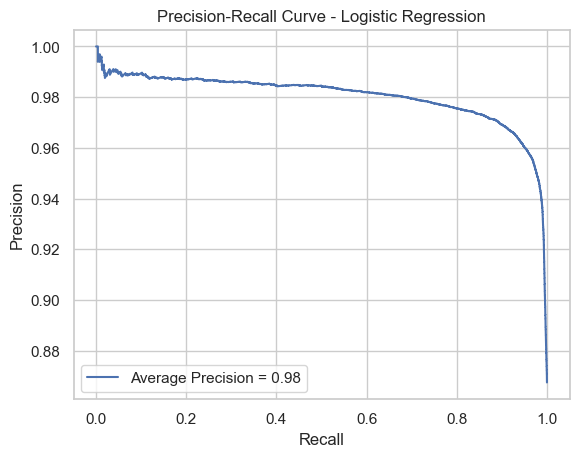

Model: Logistic Regression
Accuracy: 0.9307
Precision: 0.9288
Recall: 0.9307
F1-Score: 0.9231
ROC-AUC: 0.9165
Cross-Validation Mean Accuracy: 0.9316
Confusion Matrix:
[[ 3329  2839]
 [  384 39973]]


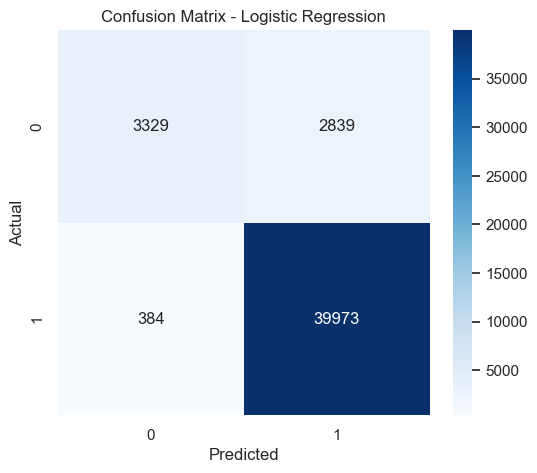

Evaluating models:   0%|          | 0/3 [01:32<?, ?it/s]


NameError: name 'os' is not defined

In [ ]:
# Initialize a list to store metrics for each model
results = []

# Define multi_class_strategy based on your classification task
# Options: 'ovo' (one-vs-one), 'ovr' (one-vs-rest), or None for binary classification
multi_class_strategy = 'ovr'  # Change as needed

# Evaluating models based on user selection with progress bar
if models is not None:
    for name, model in tqdm(models.items(), desc="Evaluating models"):
        # Determine if the task is multi-class based on the number of unique classes
        if len(np.unique(y_train)) > 2:
            result = evaluate_model_multi(
                name=name, 
                model=model, 
                X_train=X_train, 
                X_test=X_test, 
                y_train=y_train, 
                y_test=y_test,
                save_path=SAVE_PATH,
                multi_class_strategy=multi_class_strategy  # Pass strategy to evaluation function
            )
        else:
            result = evaluate_model_single(
                name=name, 
                model=model, 
                X_train=X_train, 
                X_test=X_test, 
                y_train=y_train, 
                y_test=y_test,
                save_path=SAVE_PATH
            )
        results.append(result)
else:
    print("Model evaluation was not performed due to invalid selection.")

# Save all results to a consolidated CSV
metrics_df = pd.DataFrame(results)

# Optional: Convert the Confusion Matrix list back to a string for better CSV representation
# Note: 'Confusion Matrix' is not included in the results dictionary in both evaluation functions
# If you wish to include it, adjust the evaluation functions accordingly
# For this example, we'll exclude it from the CSV
metrics_df.drop(columns=['Confusion Matrix'], inplace=True, errors='ignore')

# Save the metrics DataFrame to the specified SAVE_PATH
metrics_csv_path = os.path.join(SAVE_PATH, 'model_evaluation_metrics.csv')
metrics_df.to_csv(metrics_csv_path, index=False)

print(f"\nModel evaluation metrics have been saved to {metrics_csv_path}")


Split data into training.

### Data Scaling (Optional)

If your model or features are sensitive to feature scaling, apply standardization or normalization to X.

Scaling isn’t always required for RFE itself but is helpful for many machine learning algorithms.

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from tqdm import tqdm

# Define the estimator and cross-validation strategy
estimator = LogisticRegression(max_iter=1000, random_state=42)
cv = StratifiedKFold(n_splits=5)  # Adjust `n_splits` based on your preference

# Initialize RFECV with a progress indicator
rfecv = RFECV(
    estimator=estimator,
    step=1,  # Number of features to remove at each iteration
    cv=cv,
    scoring='accuracy',  # or any other scoring metric
    verbose=2  # Increases output verbosity for monitoring
)

# Wrap RFECV fitting with tqdm progress bar
with tqdm(total=X_train.shape[1]) as pbar:
    rfecv.fit(X_train, y_train_encoded)
    pbar.update(1)

# Get the selected features
selected_features = X_train.columns[rfecv.support_]
print("Selected Features after RFECV:", selected_features)

# Reduce X_train and X_test to only the selected features
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Create a pipeline with an imputer and SelectKBest
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),  # Impute missing values with the median
    ('feature_selection', SelectKBest(mutual_info_classif, k=10))  # Select top 10 features
])

# Fit the pipeline to the data
X_new = pipeline.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[pipeline.named_steps['feature_selection'].get_support()]
print("Selected Features:", selected_features)

# Update X to include only the selected features
X = X[selected_features]

In [ ]:
def process_numerical_features(df, num_features):
    """
    Processes numerical features in the DataFrame by imputing missing values,
    handling skewness, and scaling the features.

    Parameters:
    ----------
    df : pd.DataFrame
        The DataFrame containing the data.
    num_features : list
        A list of column names representing numerical features.

    Returns:
    --------
    df : pd.DataFrame
        The DataFrame with numerical features processed.
    """
    # Helper function to handle skewness and log transformation
    def handle_skewness(series):
        skewness = series.skew()
        if skewness > 1 or skewness < -1:
            feature_min = series.min()
            if feature_min <= 0:
                return np.log1p(series - feature_min + 1)
            else:
                return np.log1p(series)
        return series

    num_features_to_scale = []
    imputer = SimpleImputer(strategy='median')

    for feature in tqdm(num_features, desc="Processing numerical features"):
        if feature in df.columns:
            # Apply imputation and get the NumPy array
            imputed_values = imputer.fit_transform(df[[feature]])
            # Flatten the array and convert it to a pandas Series
            imputed_series = pd.Series(imputed_values.flatten(), index=df.index, name=feature)
            # Assign the Series back to the DataFrame
            df[feature] = imputed_series
            # Handle skewness
            df[feature] = handle_skewness(df[feature])
            num_features_to_scale.append(feature)
        else:
            print(f"Warning: Numerical feature '{feature}' not found in DataFrame. Skipping...")

    # Scale all numerical features in a single step
    if num_features_to_scale:
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(df[num_features_to_scale])
        df[num_features_to_scale] = pd.DataFrame(
            scaled_features, index=df.index, columns=num_features_to_scale
        )

    return df

In [ ]:
def transform_features(dataframe, bool_features, num_features, cat_features, Y, encoding_type='target'):
    """
    Transforms features in the dataframe by processing boolean, numerical, and categorical features.

    Parameters:
    ----------
    dataframe : pd.DataFrame
        The DataFrame containing the data to be transformed.
    bool_features : list
        A list of column names representing boolean features.
    num_features : list
        A list of column names representing numerical features.
    cat_features : list
        A list of column names representing categorical features.
    Y : pd.Series
        The target variable used for encoding categorical features.
    encoding_type : str
        The encoding method to use for categorical features.

    Returns:
    --------
    df_transformed : pd.DataFrame
        The DataFrame with transformed features.
    """
    df_transformed = dataframe.copy()

    # Process boolean features
    df_transformed = process_boolean_features(df_transformed, bool_features)

    # Process numerical features
    df_transformed = process_numerical_features(df_transformed, num_features)

    # Process categorical features
    df_transformed = process_categorical_features(df_transformed, cat_features, Y, encoding_type=encoding_type)

    print("Transformation complete")
    return df_transformed

In [ ]:
# Example usage
df_transformed = transform_features(df_dropped, boolean_list, numerical_list, categorical_list, df_dropped['loan_status_grouped2_kn'], encoding_type='binary')

In [ ]:
# Class distribution before resampling
print("Before Resampling:")
print(y.value_counts())


In [ ]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample dataset
X_resampled, y_resampled = smote.fit_resample(X, y)


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)


In [ ]:
# Initialize Logistic Regression model
baseline_model = LogisticRegression(max_iter=1000, random_state=42)

# Train model
baseline_model.fit(X_train, y_train)

# Predict on test set
y_pred_baseline = baseline_model.predict(X_test)

# Evaluate model using cross-validation
cv_scores = cross_val_score(baseline_model, X_resampled, y_resampled, cv=5, scoring='f1')
print(f"Logistic Regression CV F1 Score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


In [ ]:
# Initialize Random Forest model
challenger_model = RandomForestClassifier(random_state=42)

# Train model
challenger_model.fit(X_train, y_train)

# Predict on test set
y_pred_challenger = challenger_model.predict(X_test)

# Evaluate model using cross-validation
cv_scores_rf = cross_val_score(challenger_model, X_resampled, y_resampled, cv=5, scoring='f1')
print(f"Random Forest CV F1 Score: {cv_scores_rf.mean():.4f} ± {cv_scores_rf.std():.4f}")


In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    """
    Evaluate the model using accuracy, precision, recall, and F1 score.

    Parameters:
    y_true (array): True labels
    y_pred (array): Predicted labels
    model_name (str): Name of the model

    Returns:
    None
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    
    print(f"{model_name} Evaluation Metrics:")
    print(f"Accuracy     : {accuracy:.4f}")
    print(f"Precision    : {precision:.4f}")
    print(f"Recall       : {recall:.4f}")
    print(f"F1 Score     : {f1:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [ ]:
evaluate_model(y_test, y_pred_baseline, 'Logistic Regression')


In [ ]:
evaluate_model(y_test, y_pred_challenger, 'Random Forest')

# Hyper tunning

In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 4, 6]
}

# Initialize RandomizedSearchCV
randomized_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=10,
    cv=5,
    scoring='f1',
    random_state=42,
    n_jobs=-1
)

# Fit randomized search
randomized_search.fit(X_train, y_train)

# Best parameters
best_params = randomized_search.best_params_
print("Best Parameters:", best_params)


In [ ]:
# Train Random Forest with best parameters
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Predict on test set
y_pred_best = best_model.predict(X_test)

# Evaluate best model
evaluate_model(y_test, y_pred_best, 'Best Random Forest')


# Model evaluation

In [ ]:
# Feature importance from Random Forest
importances = best_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print("Feature Importances:")
print(feature_importance_df)


In [ ]:
# Initialize SHAP explainer
explainer = shap.TreeExplainer(best_model)

# Sample test data for SHAP analysis
X_test_sample = X_test.sample(n=1000, random_state=42)

# Compute SHAP values
shap_values = explainer.shap_values(X_test_sample)


In [ ]:
# SHAP summary plot for the positive class
shap.summary_plot(shap_values[1], X_test_sample)


# Save model

In [ ]:
import joblib

# Save the best model
joblib.dump(best_model, 'best_random_forest_model.joblib')

# Save the scaler and encoder
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(encoder, 'encoder.joblib')


# Conclusion